# EDA and Basic Modelling

By Ishan Sharma

----------

In [29]:
import pandas as pd

### Data processing

Fuller details on this process may be found under ``first_pass.ipynb``

##### Annual

I shall do this by a dictionary this time, rather than a compilation of separate variables.

In [30]:
annual_df = {}

In [31]:
annual_df['united_states'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_UNITED STATES_Y2017M01D24.CSV')
annual_df['united_states'].drop(['upper', 'lower', 'FIPS'], axis=1)

location_id  location_name  cause_id       cause_name  sex_id   sex  \
0             102  United States       410        Neoplasms       1  Male   
1             102  United States       410        Neoplasms       1  Male   
2             102  United States       410        Neoplasms       1  Male   
3             102  United States       410        Neoplasms       1  Male   
4             102  United States       410        Neoplasms       1  Male   
...           ...            ...       ...              ...     ...   ...   
3390          102  United States       488  Other neoplasms       3  Both   
3391          102  United States       488  Other neoplasms       3  Both   
3392          102  United States       488  Other neoplasms       3  Both   
3393          102  United States       488  Other neoplasms       3  Both   
3394          102  United States       488  Other neoplasms       3  Both   

      year_id          mx  
0        1980  318.333996  
1        1981  314.284167  
2        1982  309.425610  
3        1983  309.215150  
4        1984  309.424437  
...       ...         ...  
3390     2010    5.788080  
3391     2011    5.820354  
3392     2012    5.846857  
3393     2013    5.808207  
3394     2014    5.859176  

[3395 rows x 8 columns]

In [32]:
annual_df['tennessee'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TENNESSEE_Y2017M01D24.CSV')

In [33]:
annual_df['texas'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TEXAS_Y2017M01D24.CSV')

In [34]:
annual_df['utah'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_UTAH_Y2017M01D24.CSV')

In [35]:
annual_df['vermont'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_VERMONT_Y2017M01D24.CSV')

In [36]:
annual_df['virginia'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_VIRGINIA_Y2017M01D24.CSV')

In [37]:
annual_df['washington'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_WASHINGTON_Y2017M01D24.CSV')

In [38]:
annual_df['west_virginia'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_WEST VIRGINIA_Y2017M01D24.CSV')

In [39]:
annual_df['washington'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_WISCONSIN_Y2017M01D24.CSV')

In [40]:
annual_df['wyoming'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_WYOMING_Y2017M01D24.CSV')

##### Linking ids

In [41]:
linking_df = pd.read_csv('../data/capstone_project/linking_ids/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_CODEBOOK_Y2017M01D24.CSV').iloc[1:, 1:]

##### National

In [42]:
national_dfs = pd.read_excel('../data/capstone_project/national/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_NATIONAL_Y2017M01D24.XLSX', skiprows=1, sheet_name=None)

##### Percent difference

In [43]:
percent_difference_linking_df = pd.read_csv('../data/capstone_project/percent_difference/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_CODEBOOK_PCT_DIFF_Y2017M01D24.CSV', skiprows=1).iloc[1:, 1:]

In [44]:
percent_difference_df = pd.read_csv('../data/capstone_project/percent_difference/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_PCT_DIFF_Y2017M01D24.CSV')
percent_difference_df.drop('FIPS', axis=1)

location_id    location_name  cause_id       cause_name  sex_id  \
0               102    United States       410        Neoplasms       1   
1               102    United States       410        Neoplasms       2   
2               102    United States       410        Neoplasms       3   
3               523          Alabama       410        Neoplasms       1   
4               523          Alabama       410        Neoplasms       2   
...             ...              ...       ...              ...     ...   
309813         3700  Washakie County       488  Other neoplasms       2   
309814         3700  Washakie County       488  Other neoplasms       3   
309815         3699    Weston County       488  Other neoplasms       1   
309816         3699    Weston County       488  Other neoplasms       2   
309817         3699    Weston County       488  Other neoplasms       3   

           sex  pc_change_val      upper      lower  
0         Male     -27.413802 -25.187488 -29.220296  
1       Female     -13.630408 -11.505307 -15.299046  
2         Both     -20.063635 -18.217181 -21.421733  
3         Male     -18.368852 -15.299238 -20.807560  
4       Female       1.358138   4.729149  -1.454474  
...        ...            ...        ...        ...  
309813  Female      10.676856  44.333683 -15.029088  
309814    Both       0.242977  21.315584 -17.897009  
309815    Male     -10.884845  13.943731 -30.073494  
309816  Female      -2.420175  22.417314 -24.445990  
309817    Both      -5.813621  11.299271 -20.892956  

[309818 rows x 9 columns]

### State by state

Here, I shall likewise do what I did in first_pass, except here I shall not combine all the state dataframes into a single mega-dataframe.

In [45]:
import os 
import glob 

states_files = glob.glob(os.path.join('../data/capstone_project/state_by_state', "*")) 
states_data = {}

for state_file in states_files:
    states_data[state_file] = pd.read_excel(state_file, skiprows=1, sheet_name=None)

In [46]:
for state_data_key in states_data.keys():
    state_data_df = states_data[state_data_key]
    for sheet_key in state_data_df.keys():
        sheet = state_data_df[sheet_key]        
        states_data[state_data_key][sheet_key] = sheet.drop(sheet[sheet.isna()['Mortality Rate, 2014*']].index)

##### Top and bottom

In [47]:
top_ten_dfs = pd.read_excel('../data/capstone_project/top_and_bottom/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TOP_10_CAUSES_BY_COUNTY_Y2017M01D24.XLSX', skiprows=1, sheet_name=None)

Here, instead of doing some the for loop process I did with my first pass, I am instead writing a function which extracts the relevant snippet of information based on fed input.

In [48]:
bottom_ten_df = pd.read_excel('../data/capstone_project/top_and_bottom/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TOP_BOTTOM_10_COUNTIES_BY_CAUSE_Y2017M01D24.XLSX', skiprows=2, sheet_name='Top and Bottom 10')
bottom_ten_df = bottom_ten_df.drop(['Unnamed: 3', 'Unnamed: 7', 'Unnamed: 11'], axis=1)

In [49]:
bottom_sheets_list = ['neoplasms', 'lip oral', 'nesopharynx', 
                      'other pharynx', 'esophageal', 'stomach', 
                      'colon and rectum', 'liver', 'gallbladder',
                      'pancreatic', 'larynx', 'tracheal',
                      'malignant skin melanoma', 'non-melanoma skin', 'breast ',
                      'cervical', 'uterine', 'ovarian',
                      'prostate', 'testicular', 'kidney',
                      'brain and nervous', 'thyroid', 'mesothelioma',
                      'hodgkin lymphoma', 'non-hodgkin lymphoma', 'multiple mylenoma',
                      'leukemia', 'acute lymphoid leukemia', 'chronic lymphoid leukemia',
                      'acute myeloid leukemia', 'other neoplasms']
bottom_sheet_dict = {}
for index, elem in enumerate(bottom_sheets_list):
    bottom_sheet_dict[elem] = index

In [50]:
def get_bottom_ten(ky):
    iter_level = 15 * bottom_sheet_dict[ky]
    return bottom_ten_df[iter_level:iter_level+11]

### EDA

This is a lot of data which shall need to be sifted through. As such, I can only really hope to do a general EDA, lest I get swept up in a tidal wave of data. I'll focus on a few sets of data.

##### Neoplasms

In [53]:
national_dfs['Neoplasms'].head()

Location    FIPS    Mortality Rate, 1980*  \
0            United States     NaN  240.24 (235.83, 244.11)   
1                  Alabama     1.0  252.60 (247.84, 256.84)   
2  Autauga County, Alabama  1001.0  262.28 (246.93, 277.87)   
3  Baldwin County, Alabama  1003.0  233.78 (222.15, 245.84)   
4  Barbour County, Alabama  1005.0  260.64 (244.52, 278.22)   

     Mortality Rate, 1985*    Mortality Rate, 1990*    Mortality Rate, 1995*  \
0  236.81 (231.71, 240.33)  232.19 (226.38, 235.35)  231.17 (225.03, 234.65)   
1  252.43 (246.90, 256.52)  253.15 (246.95, 257.16)  257.15 (250.27, 261.47)   
2  262.79 (246.90, 277.06)  264.27 (249.27, 278.67)  264.91 (250.51, 279.03)   
3  228.16 (217.23, 239.30)  229.82 (218.42, 240.97)  233.49 (222.07, 244.64)   
4  266.48 (251.03, 281.48)  272.11 (256.97, 288.59)  278.99 (263.06, 294.28)   

     Mortality Rate, 2000*    Mortality Rate, 2005*    Mortality Rate, 2010*  \
0  217.78 (213.47, 220.99)  205.58 (202.48, 209.80)  192.95 (189.79, 197.76)   
1  248.60 (243.58, 252.77)  240.58 (236.52, 245.66)  229.62 (225.33, 235.35)   
2  252.92 (239.13, 266.49)  244.35 (231.02, 258.29)  229.79 (216.77, 242.74)   
3  217.76 (208.41, 228.06)  206.61 (196.72, 216.76)  201.58 (192.41, 210.89)   
4  271.62 (256.84, 287.13)  262.79 (247.20, 279.51)  256.72 (239.70, 275.05)   

     Mortality Rate, 2014* % Change in Mortality Rate, 1980-2014  
0  192.04 (188.60, 197.71)               -20.06 (-21.42, -18.22)  
1  230.98 (226.51, 238.32)                 -8.56 (-10.46, -6.08)  
2  233.32 (219.21, 249.01)                -11.04 (-18.82, -3.02)  
3  200.69 (191.51, 209.99)                -14.16 (-19.57, -7.63)  
4  260.26 (241.30, 279.76)                  -0.14 (-9.61, 10.42)

For EDA purposes, I will need to clean up this data a bit more.

In [59]:
national_dfs['Neoplasms'].drop(national_dfs['Neoplasms'].tail(2).index,inplace=True)

 I shall also need to add indices to represent whether this data is, in scope, either national, state, or county.

In [60]:
national_dfs['Neoplasms']['is_us'] = national_dfs['Neoplasms']['FIPS'].isna()

In [61]:
national_dfs['Neoplasms']['is_state'] = national_dfs['Neoplasms']['FIPS'] < 100

In [63]:
national_dfs['Neoplasms']['is_county'] = national_dfs['Neoplasms']['FIPS'] > 100

In [64]:
national_dfs['Neoplasms']['is_us'].sum()

1

In [62]:
national_dfs['Neoplasms']['is_state'].sum()

51

In [65]:
national_dfs['Neoplasms']['is_county'].sum()

3142

I shall additionally create separate indices for the mortality rates, which here are listed in ranges.

In [128]:
national_dfs['Neoplasms'][['1980_exact', '1980_min', '1980_max']] = national_dfs['Neoplasms']['Mortality Rate, 1980*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['1980_exact'] = national_dfs['Neoplasms']['1980_exact'].astype(float)
national_dfs['Neoplasms']['1980_min'] = national_dfs['Neoplasms']['1980_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['1980_max'] = national_dfs['Neoplasms']['1980_max'].str[:-1].astype(float)

In [129]:
national_dfs['Neoplasms'][['1985_exact', '1985_min', '1985_max']] = national_dfs['Neoplasms']['Mortality Rate, 1985*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['1985_exact'] = national_dfs['Neoplasms']['1985_exact'].astype(float)
national_dfs['Neoplasms']['1985_min'] = national_dfs['Neoplasms']['1985_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['1985_max'] = national_dfs['Neoplasms']['1985_max'].str[:-1].astype(float)

In [130]:
national_dfs['Neoplasms'][['1990_exact', '1990_min', '1990_max']] = national_dfs['Neoplasms']['Mortality Rate, 1990*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['1990_exact'] = national_dfs['Neoplasms']['1990_exact'].astype(float)
national_dfs['Neoplasms']['1990_min'] = national_dfs['Neoplasms']['1990_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['1990_max'] = national_dfs['Neoplasms']['1990_max'].str[:-1].astype(float)

In [131]:
national_dfs['Neoplasms'][['1995_exact', '1995_min', '1995_max']] = national_dfs['Neoplasms']['Mortality Rate, 1995*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['1995_exact'] = national_dfs['Neoplasms']['1995_exact'].astype(float)
national_dfs['Neoplasms']['1995_min'] = national_dfs['Neoplasms']['1995_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['1995_max'] = national_dfs['Neoplasms']['1995_max'].str[:-1].astype(float)

In [132]:
national_dfs['Neoplasms'][['2000_exact', '2000_min', '2000_max']] = national_dfs['Neoplasms']['Mortality Rate, 2000*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['2000_exact'] = national_dfs['Neoplasms']['2000_exact'].astype(float)
national_dfs['Neoplasms']['2000_min'] = national_dfs['Neoplasms']['2000_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['2000_max'] = national_dfs['Neoplasms']['2000_max'].str[:-1].astype(float)

In [133]:
national_dfs['Neoplasms'][['2005_exact', '2005_min', '2005_max']] = national_dfs['Neoplasms']['Mortality Rate, 2005*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['2005_exact'] = national_dfs['Neoplasms']['2005_exact'].astype(float)
national_dfs['Neoplasms']['2005_min'] = national_dfs['Neoplasms']['2005_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['2005_max'] = national_dfs['Neoplasms']['2005_max'].str[:-1].astype(float)

In [134]:
national_dfs['Neoplasms'][['2010_exact', '2010_min', '2010_max']] = national_dfs['Neoplasms']['Mortality Rate, 2010*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['2010_exact'] = national_dfs['Neoplasms']['2010_exact'].astype(float)
national_dfs['Neoplasms']['2010_min'] = national_dfs['Neoplasms']['2010_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['2010_max'] = national_dfs['Neoplasms']['2010_max'].str[:-1].astype(float)

In [135]:
national_dfs['Neoplasms'][['2014_exact', '2014_min', '2014_max']] = national_dfs['Neoplasms']['Mortality Rate, 2014*'].str.split(' ', expand=True)
national_dfs['Neoplasms']['2014_exact'] = national_dfs['Neoplasms']['2014_exact'].astype(float)
national_dfs['Neoplasms']['2014_min'] = national_dfs['Neoplasms']['2014_min'].str[1:-1].astype(float)
national_dfs['Neoplasms']['2014_max'] = national_dfs['Neoplasms']['2014_max'].str[:-1].astype(float)

Now I am ready to graph this.

In [143]:
import matplotlib.pyplot as plt

Below is a graph of mortality rates for neoplasm in the United States - that is, generally. 

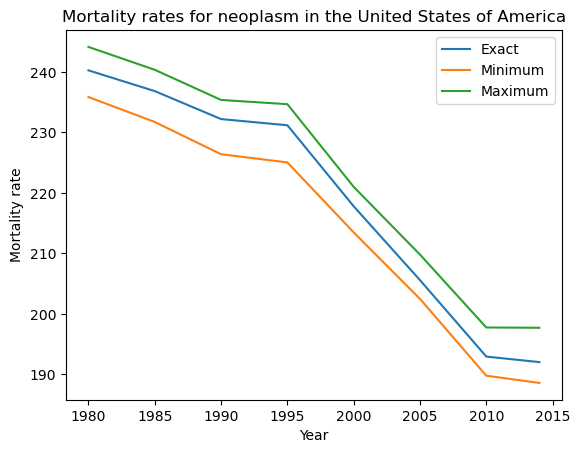

In [149]:
years = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2014]
neoplasms_vals = national_dfs['Neoplasms'].loc[national_dfs['Neoplasms']['is_us']][['1980_exact', '1985_exact', '1990_exact', '1995_exact', '2000_exact', '2005_exact', '2010_exact', '2014_exact']].T
neoplasms_min = national_dfs['Neoplasms'].loc[national_dfs['Neoplasms']['is_us']][['1980_min', '1985_min', '1990_min', '1995_min', '2000_min', '2005_min', '2010_min', '2014_min']].T
neoplasms_max = national_dfs['Neoplasms'].loc[national_dfs['Neoplasms']['is_us']][['1980_max', '1985_max', '1990_max', '1995_max', '2000_max', '2005_max', '2010_max', '2014_max']].T

plt.plot(years, neoplasms_vals, label="Exact")
plt.plot(years, neoplasms_min, label="Minimum")
plt.plot(years, neoplasms_max, label="Maximum")

plt.title('Mortality rates for neoplasm in the United States of America')
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.legend()
plt.show()

As can be seen, there is a general slope downwards overall, but with some more recent stagnation after a period from 1995 to 2010 of steady decrease.

As it is not feasible to examine a graph of every state, much less every county, I shall instead graph the states and counties with the highest and lowest mortality rates.

In [163]:
is_state = national_dfs['Neoplasms'].loc[national_dfs['Neoplasms']['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

min_state_1980['Location']

'Utah'

For Utah, the state with the minimum mortality rate in 1980, its data is as follows.

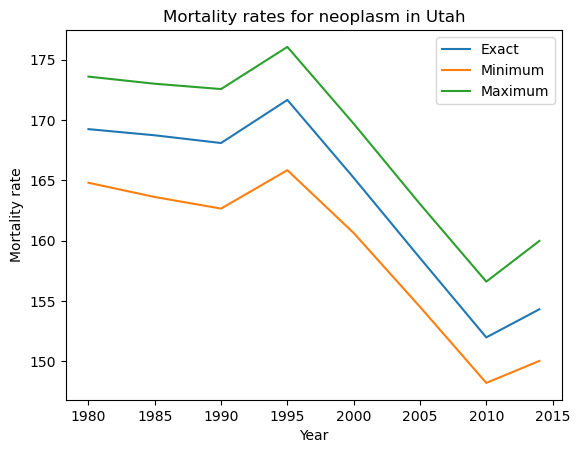

In [164]:
neoplasms_vals_1980_min = min_state_1980[['1980_exact', '1985_exact', '1990_exact', '1995_exact', '2000_exact', '2005_exact', '2010_exact', '2014_exact']].T
neoplasms_min_1980_min = min_state_1980[['1980_min', '1985_min', '1990_min', '1995_min', '2000_min', '2005_min', '2010_min', '2014_min']].T
neoplasms_max_1980_min = min_state_1980[['1980_max', '1985_max', '1990_max', '1995_max', '2000_max', '2005_max', '2010_max', '2014_max']].T

plt.plot(years, neoplasms_vals_1980_min, label="Exact")
plt.plot(years, neoplasms_min_1980_min, label="Minimum")
plt.plot(years, neoplasms_max_1980_min, label="Maximum")

plt.title('Mortality rates for neoplasm in Utah')
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.legend()
plt.show()

There is a distinct spike at 1995, and also there is an uptick in 2015. The latter uptick aligns with the plateau in US general. 

Next I shall graph the state with the maximum mortality rate.

In [165]:
max_state_1980['Location']

'District of Columbia'

It is the District of Columbia. Its graph is as follows:

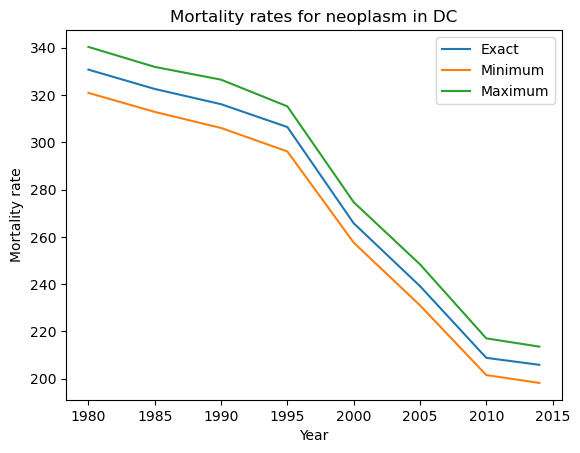

In [166]:
neoplasms_vals_1980_max = max_state_1980[['1980_exact', '1985_exact', '1990_exact', '1995_exact', '2000_exact', '2005_exact', '2010_exact', '2014_exact']].T
neoplasms_min_1980_max = max_state_1980[['1980_min', '1985_min', '1990_min', '1995_min', '2000_min', '2005_min', '2010_min', '2014_min']].T
neoplasms_max_1980_max = max_state_1980[['1980_max', '1985_max', '1990_max', '1995_max', '2000_max', '2005_max', '2010_max', '2014_max']].T

plt.plot(years, neoplasms_vals_1980_max, label="Exact")
plt.plot(years, neoplasms_min_1980_max, label="Minimum")
plt.plot(years, neoplasms_max_1980_max, label="Maximum")

plt.title('Mortality rates for neoplasm in DC')
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.legend()
plt.show()

There is a very extreme dropoff. 

To simplify the process of graphing, I may as well make a function for it.

In [167]:
def make_graph_national_stat(stat, title):
    exact_vals = stat[['1980_exact', '1985_exact', '1990_exact', '1995_exact', '2000_exact', '2005_exact', '2010_exact', '2014_exact']].T
    min_vals = stat[['1980_min', '1985_min', '1990_min', '1995_min', '2000_min', '2005_min', '2010_min', '2014_min']].T
    max_vals = stat[['1980_max', '1985_max', '1990_max', '1995_max', '2000_max', '2005_max', '2010_max', '2014_max']].T

    plt.plot(years, exact_vals, label="Exact")
    plt.plot(years, min_vals, label="Minimum")
    plt.plot(years, max_vals, label="Maximum")

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Mortality rate')
    plt.legend()
    plt.show()

To graph the counties:

In [168]:
is_county = national_dfs['Neoplasms'].loc[national_dfs['Neoplasms']['is_county']]

In [170]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

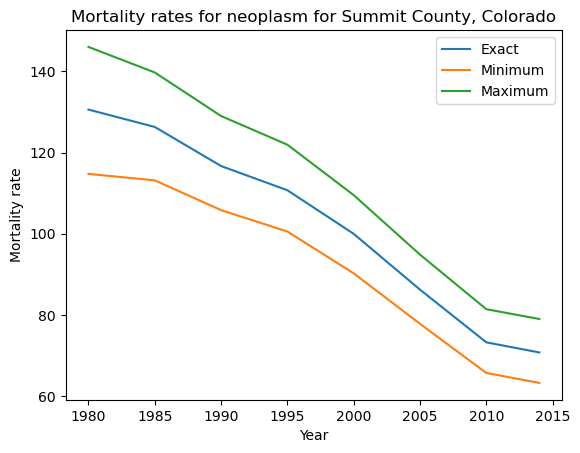

In [172]:
make_graph_national_stat(min_county_1980, 'Mortality rates for neoplasm for Summit County, Colorado')

There is a stark dropoff from a county already with very low mortality rates. This may, at a guess, have to do with significant demographic change.

To investigate the county with the highest neoplasm mortality rate:

In [171]:
max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'North Slope Borough, Alaska'

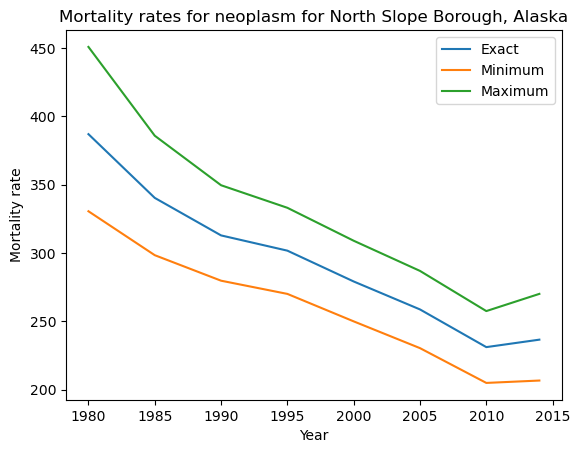

In [173]:
make_graph_national_stat(max_county_1980, 'Mortality rates for neoplasm for North Slope Borough, Alaska')

There is a dropoff, but a small one and there's a small increase at 2014. 

##### Lip oral

To go over the same process as above:

In [185]:
sheet = 'Lip & oral cavity cancer'

national_dfs[sheet].drop(national_dfs[sheet].tail(2).index,inplace=True)
national_dfs[sheet]['is_state'] = national_dfs[sheet]['FIPS'] < 100
national_dfs[sheet]['is_us'] = national_dfs[sheet]['FIPS'].isna()
national_dfs[sheet]['is_county'] = national_dfs[sheet]['FIPS'] > 100

national_dfs[sheet][['1980_exact', '1980_min', '1980_max']] = national_dfs[sheet]['Mortality Rate, 1980*'].str.split(' ', expand=True)
national_dfs[sheet]['1980_exact'] = national_dfs[sheet]['1980_exact'].astype(float)
national_dfs[sheet]['1980_min'] = national_dfs[sheet]['1980_min'].str[1:-1].astype(float)
national_dfs[sheet]['1980_max'] = national_dfs[sheet]['1980_max'].str[:-1].astype(float)

national_dfs[sheet][['1985_exact', '1985_min', '1985_max']] = national_dfs[sheet]['Mortality Rate, 1985*'].str.split(' ', expand=True)
national_dfs[sheet]['1985_exact'] = national_dfs[sheet]['1985_exact'].astype(float)
national_dfs[sheet]['1985_min'] = national_dfs[sheet]['1985_min'].str[1:-1].astype(float)
national_dfs[sheet]['1985_max'] = national_dfs[sheet]['1985_max'].str[:-1].astype(float)

national_dfs[sheet][['1990_exact', '1990_min', '1990_max']] = national_dfs[sheet]['Mortality Rate, 1990*'].str.split(' ', expand=True)
national_dfs[sheet]['1990_exact'] = national_dfs[sheet]['1990_exact'].astype(float)
national_dfs[sheet]['1990_min'] = national_dfs[sheet]['1990_min'].str[1:-1].astype(float)
national_dfs[sheet]['1990_max'] = national_dfs[sheet]['1990_max'].str[:-1].astype(float)

national_dfs[sheet][['1995_exact', '1995_min', '1995_max']] = national_dfs[sheet]['Mortality Rate, 1995*'].str.split(' ', expand=True)
national_dfs[sheet]['1995_exact'] = national_dfs[sheet]['1995_exact'].astype(float)
national_dfs[sheet]['1995_min'] = national_dfs[sheet]['1995_min'].str[1:-1].astype(float)
national_dfs[sheet]['1995_max'] = national_dfs[sheet]['1995_max'].str[:-1].astype(float)

national_dfs[sheet][['2000_exact', '2000_min', '2000_max']] = national_dfs[sheet]['Mortality Rate, 2000*'].str.split(' ', expand=True)
national_dfs[sheet]['2000_exact'] = national_dfs[sheet]['2000_exact'].astype(float)
national_dfs[sheet]['2000_min'] = national_dfs[sheet]['2000_min'].str[1:-1].astype(float)
national_dfs[sheet]['2000_max'] = national_dfs[sheet]['2000_max'].str[:-1].astype(float)

national_dfs[sheet][['2005_exact', '2005_min', '2005_max']] = national_dfs[sheet]['Mortality Rate, 2005*'].str.split(' ', expand=True)
national_dfs[sheet]['2005_exact'] = national_dfs[sheet]['2005_exact'].astype(float)
national_dfs[sheet]['2005_min'] = national_dfs[sheet]['2005_min'].str[1:-1].astype(float)
national_dfs[sheet]['2005_max'] = national_dfs[sheet]['2005_max'].str[:-1].astype(float)

national_dfs[sheet][['2010_exact', '2010_min', '2010_max']] = national_dfs[sheet]['Mortality Rate, 2010*'].str.split(' ', expand=True)
national_dfs[sheet]['2010_exact'] = national_dfs[sheet]['2010_exact'].astype(float)
national_dfs[sheet]['2010_min'] = national_dfs[sheet]['2010_min'].str[1:-1].astype(float)
national_dfs[sheet]['2010_max'] = national_dfs[sheet]['2010_max'].str[:-1].astype(float)

national_dfs[sheet][['2014_exact', '2014_min', '2014_max']] = national_dfs[sheet]['Mortality Rate, 2014*'].str.split(' ', expand=True)
national_dfs[sheet]['2014_exact'] = national_dfs[sheet]['2014_exact'].astype(float)
national_dfs[sheet]['2014_min'] = national_dfs[sheet]['2014_min'].str[1:-1].astype(float)
national_dfs[sheet]['2014_max'] = national_dfs[sheet]['2014_max'].str[:-1].astype(float)

To graph general stats for the US:

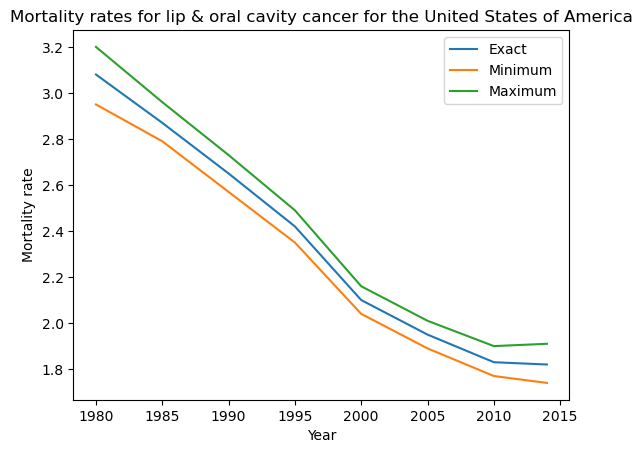

In [186]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for lip & oral cavity cancer for the United States of America')

There's a stark decline from 1980 to 2000, then a smaller decline from 2000 to 2010, and then a plateau from 2010 to 2014.

For the states:

In [187]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

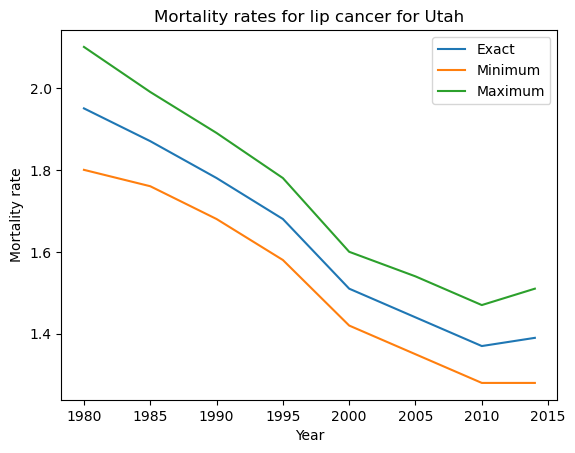

In [189]:
make_graph_national_stat(min_state_1980, 'Mortality rates for lip cancer for Utah')

Interestingly, the state with minimal mortality rates from lip cancer is also Utah, and the decline is by just over half.

In [182]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

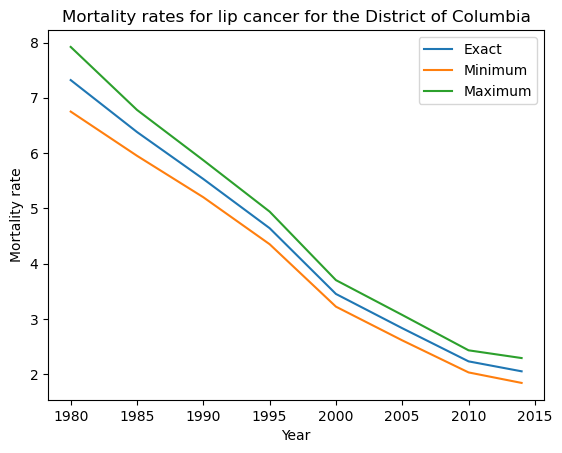

In [184]:
make_graph_national_stat(max_state_1980, 'Mortality rates for lip cancer for the District of Columbia')

The state with the highest mortality rates for lip cancer is also the District of Columbua, and it has had a very large decline since 1980.

For the county:

In [190]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'District of Columbia, District of Columbia'

The county with the maximum lip cancer rate is the District of Columbia - which I have already done.

In [191]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Billings County, North Dakota'

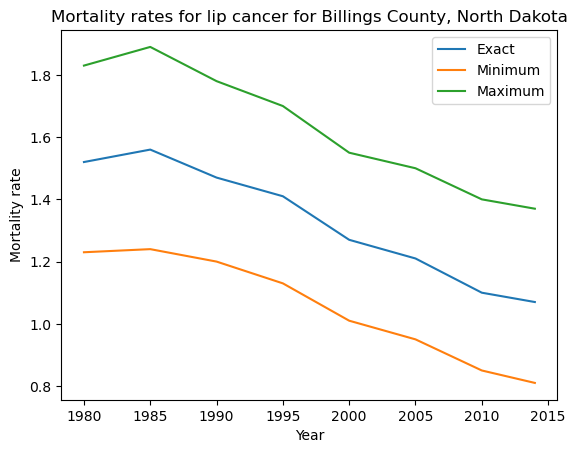

In [192]:
make_graph_national_stat(min_county_1980, 'Mortality rates for lip cancer for Billings County, North Dakota')

The county with the minimum lip cancer mortality rate is Billings County, North Dakota, and its rate has declined slightly but has remained generally stagnant.

##### Nasopharynx cancer

To go through the process again:

In [194]:
sheet = 'Nasopharynx cancer'

national_dfs[sheet].drop(national_dfs[sheet].tail(2).index,inplace=True)
national_dfs[sheet]['is_state'] = national_dfs[sheet]['FIPS'] < 100
national_dfs[sheet]['is_us'] = national_dfs[sheet]['FIPS'].isna()
national_dfs[sheet]['is_county'] = national_dfs[sheet]['FIPS'] > 100

national_dfs[sheet][['1980_exact', '1980_min', '1980_max']] = national_dfs[sheet]['Mortality Rate, 1980*'].str.split(' ', expand=True)
national_dfs[sheet]['1980_exact'] = national_dfs[sheet]['1980_exact'].astype(float)
national_dfs[sheet]['1980_min'] = national_dfs[sheet]['1980_min'].str[1:-1].astype(float)
national_dfs[sheet]['1980_max'] = national_dfs[sheet]['1980_max'].str[:-1].astype(float)

national_dfs[sheet][['1985_exact', '1985_min', '1985_max']] = national_dfs[sheet]['Mortality Rate, 1985*'].str.split(' ', expand=True)
national_dfs[sheet]['1985_exact'] = national_dfs[sheet]['1985_exact'].astype(float)
national_dfs[sheet]['1985_min'] = national_dfs[sheet]['1985_min'].str[1:-1].astype(float)
national_dfs[sheet]['1985_max'] = national_dfs[sheet]['1985_max'].str[:-1].astype(float)

national_dfs[sheet][['1990_exact', '1990_min', '1990_max']] = national_dfs[sheet]['Mortality Rate, 1990*'].str.split(' ', expand=True)
national_dfs[sheet]['1990_exact'] = national_dfs[sheet]['1990_exact'].astype(float)
national_dfs[sheet]['1990_min'] = national_dfs[sheet]['1990_min'].str[1:-1].astype(float)
national_dfs[sheet]['1990_max'] = national_dfs[sheet]['1990_max'].str[:-1].astype(float)

national_dfs[sheet][['1995_exact', '1995_min', '1995_max']] = national_dfs[sheet]['Mortality Rate, 1995*'].str.split(' ', expand=True)
national_dfs[sheet]['1995_exact'] = national_dfs[sheet]['1995_exact'].astype(float)
national_dfs[sheet]['1995_min'] = national_dfs[sheet]['1995_min'].str[1:-1].astype(float)
national_dfs[sheet]['1995_max'] = national_dfs[sheet]['1995_max'].str[:-1].astype(float)

national_dfs[sheet][['2000_exact', '2000_min', '2000_max']] = national_dfs[sheet]['Mortality Rate, 2000*'].str.split(' ', expand=True)
national_dfs[sheet]['2000_exact'] = national_dfs[sheet]['2000_exact'].astype(float)
national_dfs[sheet]['2000_min'] = national_dfs[sheet]['2000_min'].str[1:-1].astype(float)
national_dfs[sheet]['2000_max'] = national_dfs[sheet]['2000_max'].str[:-1].astype(float)

national_dfs[sheet][['2005_exact', '2005_min', '2005_max']] = national_dfs[sheet]['Mortality Rate, 2005*'].str.split(' ', expand=True)
national_dfs[sheet]['2005_exact'] = national_dfs[sheet]['2005_exact'].astype(float)
national_dfs[sheet]['2005_min'] = national_dfs[sheet]['2005_min'].str[1:-1].astype(float)
national_dfs[sheet]['2005_max'] = national_dfs[sheet]['2005_max'].str[:-1].astype(float)

national_dfs[sheet][['2010_exact', '2010_min', '2010_max']] = national_dfs[sheet]['Mortality Rate, 2010*'].str.split(' ', expand=True)
national_dfs[sheet]['2010_exact'] = national_dfs[sheet]['2010_exact'].astype(float)
national_dfs[sheet]['2010_min'] = national_dfs[sheet]['2010_min'].str[1:-1].astype(float)
national_dfs[sheet]['2010_max'] = national_dfs[sheet]['2010_max'].str[:-1].astype(float)

national_dfs[sheet][['2014_exact', '2014_min', '2014_max']] = national_dfs[sheet]['Mortality Rate, 2014*'].str.split(' ', expand=True)
national_dfs[sheet]['2014_exact'] = national_dfs[sheet]['2014_exact'].astype(float)
national_dfs[sheet]['2014_min'] = national_dfs[sheet]['2014_min'].str[1:-1].astype(float)
national_dfs[sheet]['2014_max'] = national_dfs[sheet]['2014_max'].str[:-1].astype(float)

To graph general stats for the US:

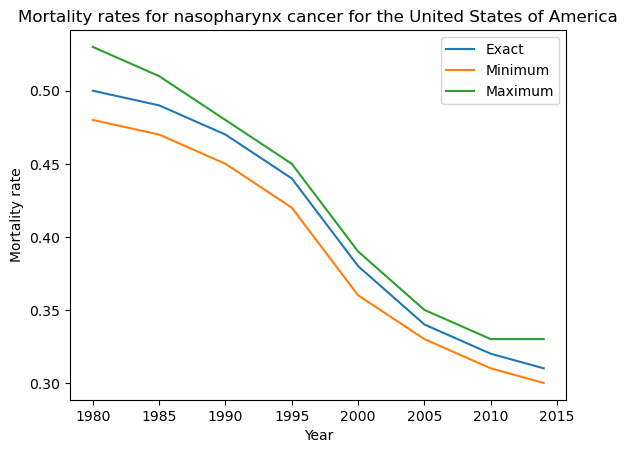

In [196]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for nasopharynx cancer for the United States of America')

This curve declines in general, but the decline intensifies from 1980 to 2000, before it hits an inflection point and the decline decreases. 

For the states:

In [197]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Wyoming'

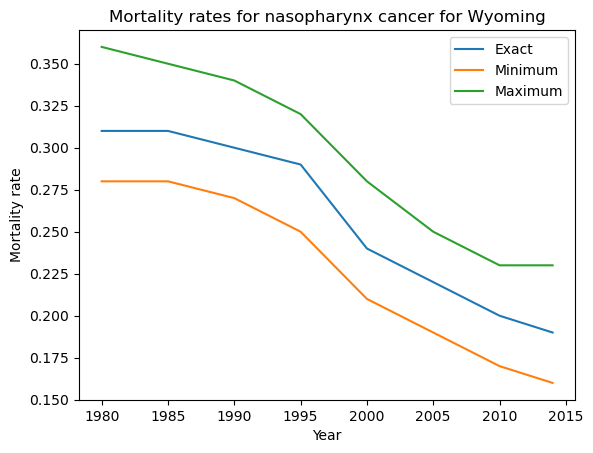

In [198]:
make_graph_national_stat(min_state_1980, 'Mortality rates for nasopharynx cancer for Wyoming')

This decline curve for the state with the minimal rate, Wyoming looks the same as the US overall, and in general it also decreases by half as with the US.

In [199]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Alaska'

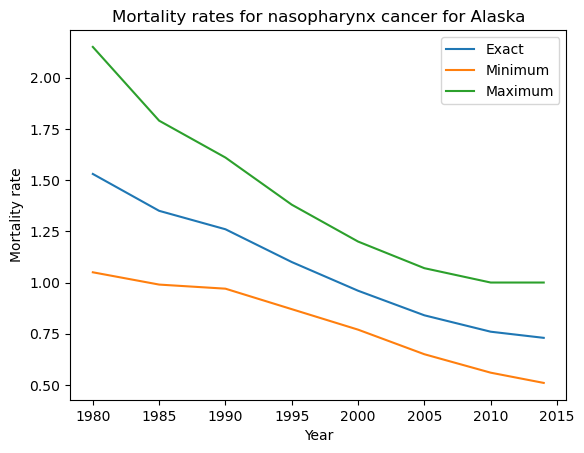

In [200]:
make_graph_national_stat(max_state_1980, 'Mortality rates for nasopharynx cancer for Alaska')

This decline curve for the state with the maximal rate, Alaska, is generally stagnant with a very slight decline which appears to be plateauing in recent years.

For the county:

In [201]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Kusilvak Census Area, Alaska'

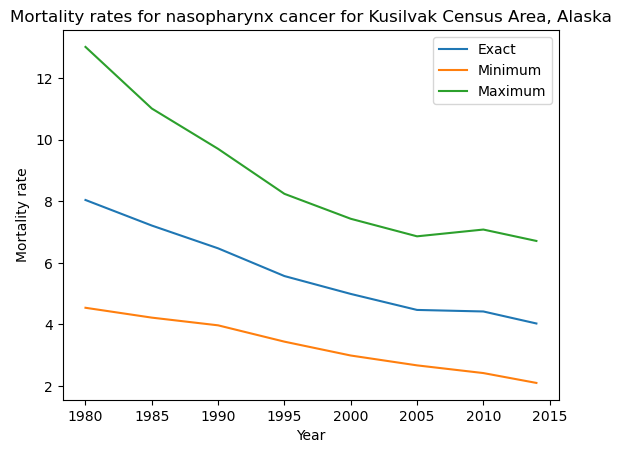

In [202]:
make_graph_national_stat(max_county_1980, 'Mortality rates for nasopharynx cancer for Kusilvak Census Area, Alaska')

This looks an awful lot like the Alaska curve, although it is much higher.

In [203]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

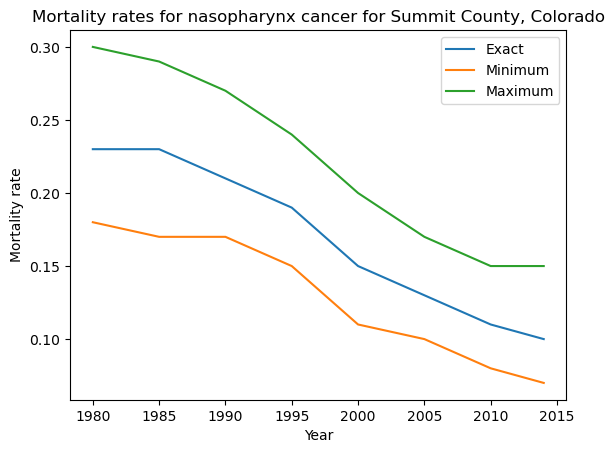

In [205]:
make_graph_national_stat(min_county_1980, 'Mortality rates for nasopharynx cancer for Summit County, Colorado')

This shows a steady decline since 1980 in Summit County. This is also the minimum county for neoplasm rates.

##### Other pharynx cancer

In [208]:
sheet = 'Other pharynx cancer'

national_dfs[sheet].drop(national_dfs[sheet].tail(2).index,inplace=True)
national_dfs[sheet]['is_state'] = national_dfs[sheet]['FIPS'] < 100
national_dfs[sheet]['is_us'] = national_dfs[sheet]['FIPS'].isna()
national_dfs[sheet]['is_county'] = national_dfs[sheet]['FIPS'] > 100

national_dfs[sheet][['1980_exact', '1980_min', '1980_max']] = national_dfs[sheet]['Mortality Rate, 1980*'].str.split(' ', expand=True)
national_dfs[sheet]['1980_exact'] = national_dfs[sheet]['1980_exact'].astype(float)
national_dfs[sheet]['1980_min'] = national_dfs[sheet]['1980_min'].str[1:-1].astype(float)
national_dfs[sheet]['1980_max'] = national_dfs[sheet]['1980_max'].str[:-1].astype(float)

national_dfs[sheet][['1985_exact', '1985_min', '1985_max']] = national_dfs[sheet]['Mortality Rate, 1985*'].str.split(' ', expand=True)
national_dfs[sheet]['1985_exact'] = national_dfs[sheet]['1985_exact'].astype(float)
national_dfs[sheet]['1985_min'] = national_dfs[sheet]['1985_min'].str[1:-1].astype(float)
national_dfs[sheet]['1985_max'] = national_dfs[sheet]['1985_max'].str[:-1].astype(float)

national_dfs[sheet][['1990_exact', '1990_min', '1990_max']] = national_dfs[sheet]['Mortality Rate, 1990*'].str.split(' ', expand=True)
national_dfs[sheet]['1990_exact'] = national_dfs[sheet]['1990_exact'].astype(float)
national_dfs[sheet]['1990_min'] = national_dfs[sheet]['1990_min'].str[1:-1].astype(float)
national_dfs[sheet]['1990_max'] = national_dfs[sheet]['1990_max'].str[:-1].astype(float)

national_dfs[sheet][['1995_exact', '1995_min', '1995_max']] = national_dfs[sheet]['Mortality Rate, 1995*'].str.split(' ', expand=True)
national_dfs[sheet]['1995_exact'] = national_dfs[sheet]['1995_exact'].astype(float)
national_dfs[sheet]['1995_min'] = national_dfs[sheet]['1995_min'].str[1:-1].astype(float)
national_dfs[sheet]['1995_max'] = national_dfs[sheet]['1995_max'].str[:-1].astype(float)

national_dfs[sheet][['2000_exact', '2000_min', '2000_max']] = national_dfs[sheet]['Mortality Rate, 2000*'].str.split(' ', expand=True)
national_dfs[sheet]['2000_exact'] = national_dfs[sheet]['2000_exact'].astype(float)
national_dfs[sheet]['2000_min'] = national_dfs[sheet]['2000_min'].str[1:-1].astype(float)
national_dfs[sheet]['2000_max'] = national_dfs[sheet]['2000_max'].str[:-1].astype(float)

national_dfs[sheet][['2005_exact', '2005_min', '2005_max']] = national_dfs[sheet]['Mortality Rate, 2005*'].str.split(' ', expand=True)
national_dfs[sheet]['2005_exact'] = national_dfs[sheet]['2005_exact'].astype(float)
national_dfs[sheet]['2005_min'] = national_dfs[sheet]['2005_min'].str[1:-1].astype(float)
national_dfs[sheet]['2005_max'] = national_dfs[sheet]['2005_max'].str[:-1].astype(float)

national_dfs[sheet][['2010_exact', '2010_min', '2010_max']] = national_dfs[sheet]['Mortality Rate, 2010*'].str.split(' ', expand=True)
national_dfs[sheet]['2010_exact'] = national_dfs[sheet]['2010_exact'].astype(float)
national_dfs[sheet]['2010_min'] = national_dfs[sheet]['2010_min'].str[1:-1].astype(float)
national_dfs[sheet]['2010_max'] = national_dfs[sheet]['2010_max'].str[:-1].astype(float)

national_dfs[sheet][['2014_exact', '2014_min', '2014_max']] = national_dfs[sheet]['Mortality Rate, 2014*'].str.split(' ', expand=True)
national_dfs[sheet]['2014_exact'] = national_dfs[sheet]['2014_exact'].astype(float)
national_dfs[sheet]['2014_min'] = national_dfs[sheet]['2014_min'].str[1:-1].astype(float)
national_dfs[sheet]['2014_max'] = national_dfs[sheet]['2014_max'].str[:-1].astype(float)

To graph general stats for the US:

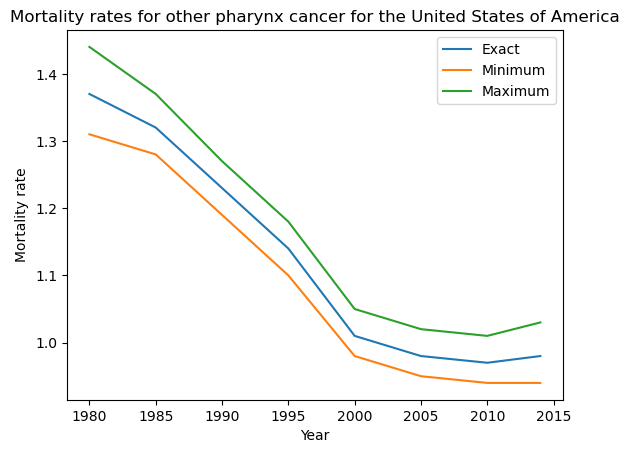

In [209]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for other pharynx cancer for the United States of America')

This shows that there's been a decline, but not as dramatic as some other cancers in here. Additionally, the decline curve has an inflection point around 2000. 

For the states:

In [210]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Wyoming'

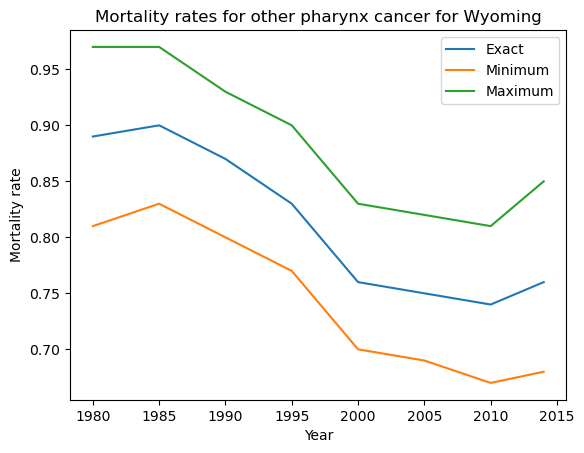

In [212]:
make_graph_national_stat(min_state_1980, 'Mortality rates for other pharynx cancer for Wyoming')

The state with the minimum rate is, as with nasopharynx cancer, Wyoming. It has declined a little but has, in recent years, increased.

In [213]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

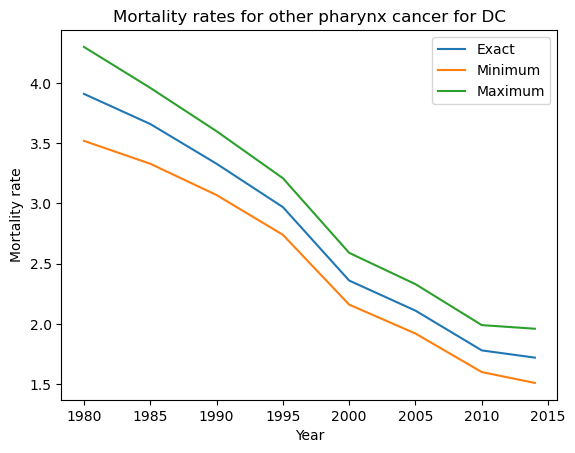

In [214]:
make_graph_national_stat(max_state_1980, 'Mortality rates for other pharynx cancer for DC')

The state with the maximum mortality rate, DC has decreased a lot since 1980, with a general slope downwards.

For counties:

In [215]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'District of Columbia, District of Columbia'

The county with maximum mortality is DC, covered above.

In [216]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Northwest Arctic Borough, Alaska'

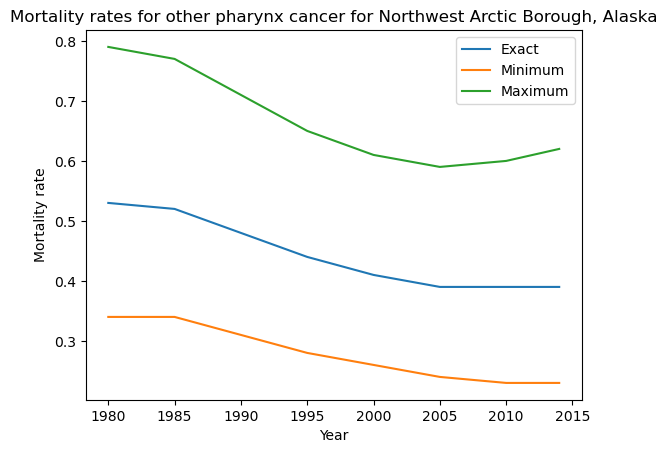

In [218]:
make_graph_national_stat(min_county_1980, 'Mortality rates for other pharynx cancer for Northwest Arctic Borough, Alaska')

The rate for the Northwest Arctic Borough, the county with the minimum rate, has been quite stagnant, with virtually no change since 2005.

##### Cleaning step

For the sake of making this less convoluted, I may as well clean the data for all the sheets.

In [220]:
for sheet in ['Esophageal cancer', 'Stomach cancer', 'Colon & rectum cancer', 'Liver cancer', 'Gallbladder & biliary tract ', 'Pancreatic cancer', 'Larynx cancer', 'Tracheal, bronchus, & lung ', 'Malignant skin melanoma', 'Non-melanoma skin cancer', 'Breast cancer', 'Cervical cancer', 'Uterine cancer', 'Ovarian cancer', 'Prostate cancer', 'Testicular cancer', 'Kidney cancer', 'Bladder cancer', 'Brain & nervous system cancer', 'Thyroid cancer', 'Mesothelioma', 'Hodgkin lymphoma', 'Non-Hodgkin lymphoma', 'Multiple myeloma', 'Leukemia', 'Acute lymphoid leukemia', 'Chronic lymphoid leukemia', 'Acute myeloid leukemia', 'Chronic myeloid leukemia', 'Other neoplasms']:
    national_dfs[sheet].drop(national_dfs[sheet].tail(2).index,inplace=True)
    national_dfs[sheet]['is_state'] = national_dfs[sheet]['FIPS'] < 100
    national_dfs[sheet]['is_us'] = national_dfs[sheet]['FIPS'].isna()
    national_dfs[sheet]['is_county'] = national_dfs[sheet]['FIPS'] > 100

    national_dfs[sheet][['1980_exact', '1980_min', '1980_max']] = national_dfs[sheet]['Mortality Rate, 1980*'].str.split(' ', expand=True)
    national_dfs[sheet]['1980_exact'] = national_dfs[sheet]['1980_exact'].astype(float)
    national_dfs[sheet]['1980_min'] = national_dfs[sheet]['1980_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1980_max'] = national_dfs[sheet]['1980_max'].str[:-1].astype(float)

    national_dfs[sheet][['1985_exact', '1985_min', '1985_max']] = national_dfs[sheet]['Mortality Rate, 1985*'].str.split(' ', expand=True)
    national_dfs[sheet]['1985_exact'] = national_dfs[sheet]['1985_exact'].astype(float)
    national_dfs[sheet]['1985_min'] = national_dfs[sheet]['1985_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1985_max'] = national_dfs[sheet]['1985_max'].str[:-1].astype(float)

    national_dfs[sheet][['1990_exact', '1990_min', '1990_max']] = national_dfs[sheet]['Mortality Rate, 1990*'].str.split(' ', expand=True)
    national_dfs[sheet]['1990_exact'] = national_dfs[sheet]['1990_exact'].astype(float)
    national_dfs[sheet]['1990_min'] = national_dfs[sheet]['1990_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1990_max'] = national_dfs[sheet]['1990_max'].str[:-1].astype(float)

    national_dfs[sheet][['1995_exact', '1995_min', '1995_max']] = national_dfs[sheet]['Mortality Rate, 1995*'].str.split(' ', expand=True)
    national_dfs[sheet]['1995_exact'] = national_dfs[sheet]['1995_exact'].astype(float)
    national_dfs[sheet]['1995_min'] = national_dfs[sheet]['1995_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1995_max'] = national_dfs[sheet]['1995_max'].str[:-1].astype(float)

    national_dfs[sheet][['2000_exact', '2000_min', '2000_max']] = national_dfs[sheet]['Mortality Rate, 2000*'].str.split(' ', expand=True)
    national_dfs[sheet]['2000_exact'] = national_dfs[sheet]['2000_exact'].astype(float)
    national_dfs[sheet]['2000_min'] = national_dfs[sheet]['2000_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2000_max'] = national_dfs[sheet]['2000_max'].str[:-1].astype(float)

    national_dfs[sheet][['2005_exact', '2005_min', '2005_max']] = national_dfs[sheet]['Mortality Rate, 2005*'].str.split(' ', expand=True)
    national_dfs[sheet]['2005_exact'] = national_dfs[sheet]['2005_exact'].astype(float)
    national_dfs[sheet]['2005_min'] = national_dfs[sheet]['2005_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2005_max'] = national_dfs[sheet]['2005_max'].str[:-1].astype(float)

    national_dfs[sheet][['2010_exact', '2010_min', '2010_max']] = national_dfs[sheet]['Mortality Rate, 2010*'].str.split(' ', expand=True)
    national_dfs[sheet]['2010_exact'] = national_dfs[sheet]['2010_exact'].astype(float)
    national_dfs[sheet]['2010_min'] = national_dfs[sheet]['2010_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2010_max'] = national_dfs[sheet]['2010_max'].str[:-1].astype(float)

    national_dfs[sheet][['2014_exact', '2014_min', '2014_max']] = national_dfs[sheet]['Mortality Rate, 2014*'].str.split(' ', expand=True)
    national_dfs[sheet]['2014_exact'] = national_dfs[sheet]['2014_exact'].astype(float)
    national_dfs[sheet]['2014_min'] = national_dfs[sheet]['2014_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2014_max'] = national_dfs[sheet]['2014_max'].str[:-1].astype(float)

##### Esophageal cancer

In [221]:
sheet = 'Esophageal cancer'

To graph general data for the US:

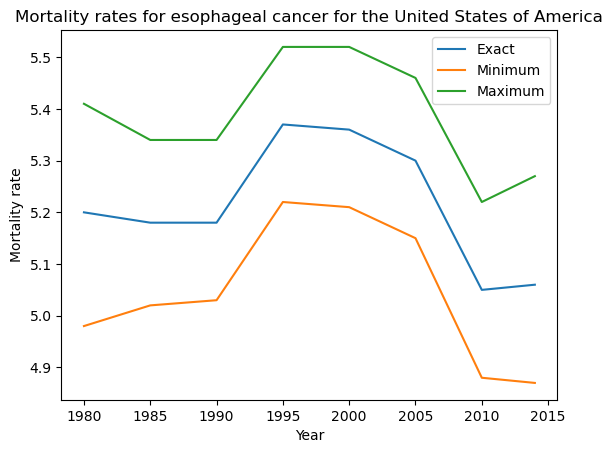

In [223]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for esophageal cancer for the United States of America')

This is generally stagnant, except for a peak around 2005.

For the states:

In [224]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

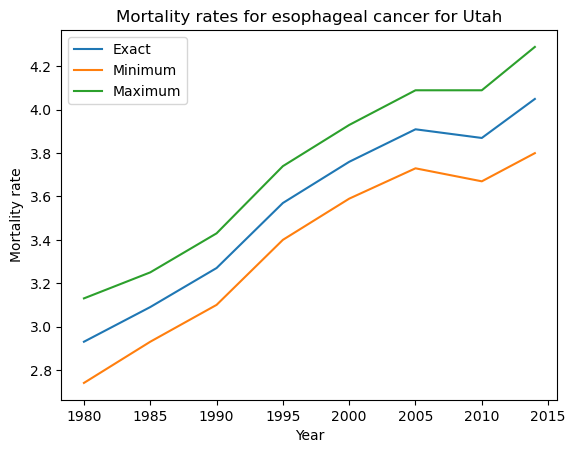

In [225]:
make_graph_national_stat(min_state_1980, 'Mortality rates for esophageal cancer for Utah')

Utah, the state with minimum mortality rate, has had unusually an increase in its esophageal cancer.

In [226]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

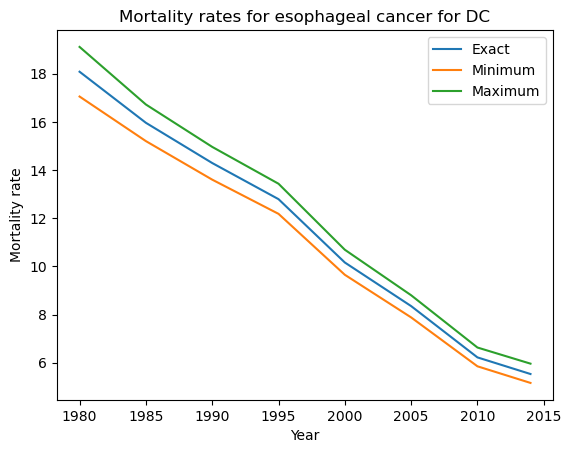

In [227]:
make_graph_national_stat(max_state_1980, 'Mortality rates for esophageal cancer for DC')

DC, the state with the maximum mortality rate for esophageal cancer, has had a pretty stark decrease, meanwhile.

In [228]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'District of Columbia, District of Columbia'

The county with the maximum esophageal mortality rate is DC, which has been covered above.

In [229]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Cache County, Utah'

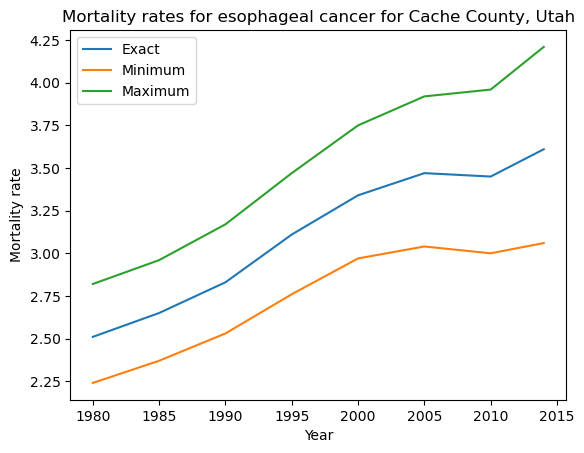

In [230]:
make_graph_national_stat(min_county_1980, 'Mortality rates for esophageal cancer for Cache County, Utah')

This is quite similar to the Utah graph above, which is not surprising as this is a Utah county. 

##### Stomach cancer

In [231]:
sheet = 'Stomach cancer'

To graph general data for the US:

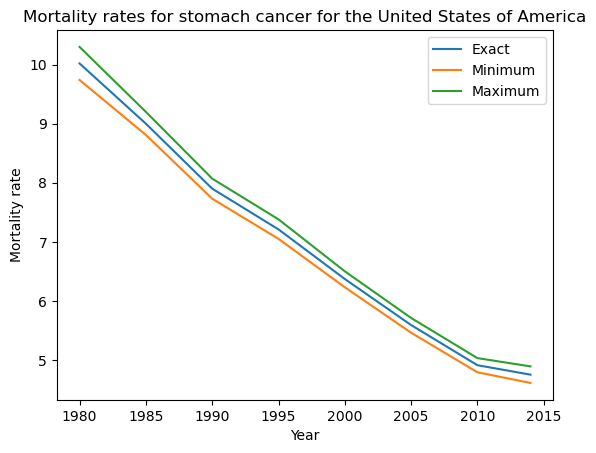

In [235]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for stomach cancer for the United States of America')

There is a very small error bar. Additionally, there has been a decrease in stark terms since 1980, although it has tapered off since 2010.

For the states:

In [233]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Kansas'

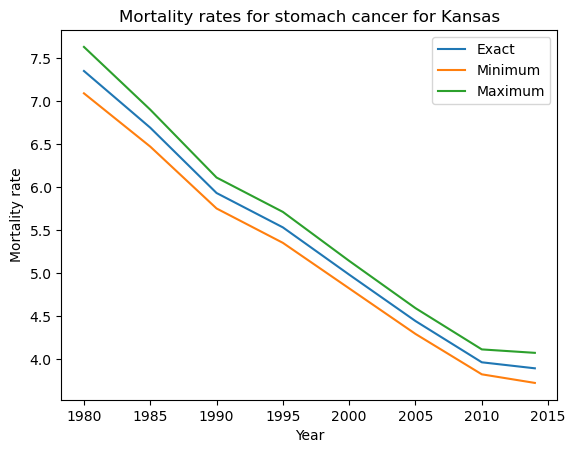

In [236]:
make_graph_national_stat(min_state_1980, 'Mortality rates for stomach cancer for Kansas')

The state with the least mortality rate, Kansas, has a similar pattern to the United States generally, except that it has decreased by a proportionately smaller amount from 1980-2014. 

In [237]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Hawaii'

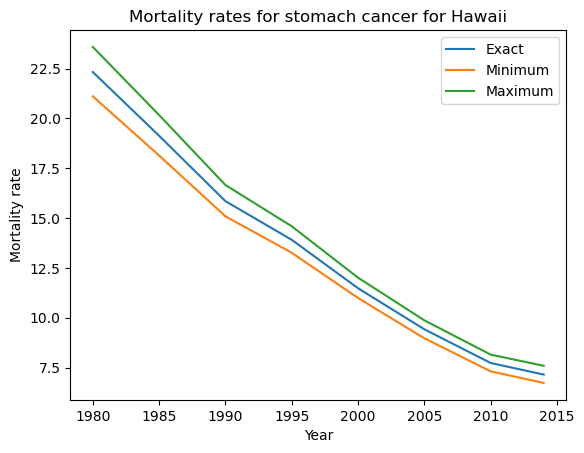

In [239]:
make_graph_national_stat(max_state_1980, 'Mortality rates for stomach cancer for Hawaii')

The state with the highest mortality rate, Hawaii, also has a similar curve to the US, but it has decreased by a much higer proportion, from 22.5 to about 7.5. 

For the counties:

In [240]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'North Slope Borough, Alaska'

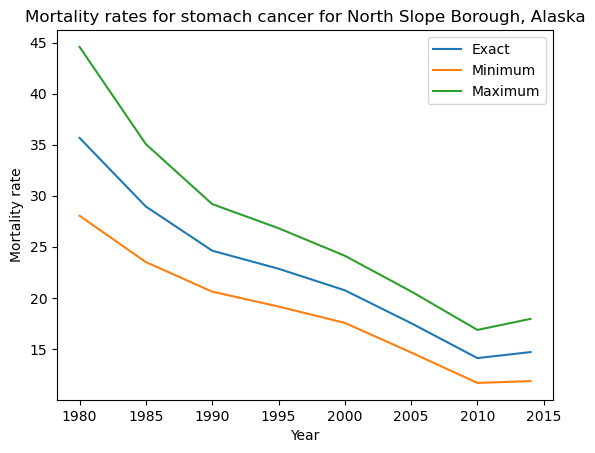

In [241]:
make_graph_national_stat(max_county_1980, 'Mortality rates for stomach cancer for North Slope Borough, Alaska')

This is a different graph to the ones seen for stomach cancer. The mortality rate for North Slope Borough, Alaska, the county with the highest rate, decreases by almost half, but this decrease stagnates from 2010 onwards.

In [242]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

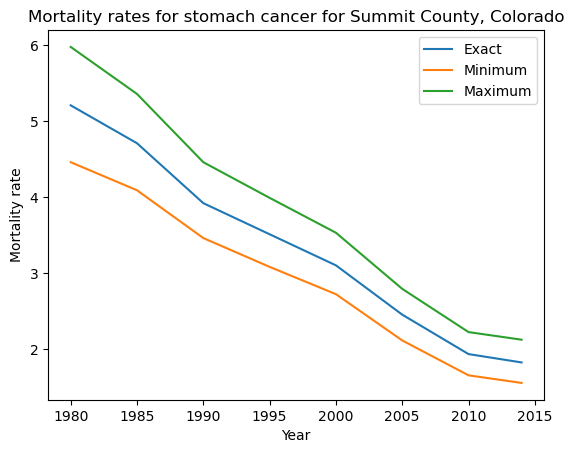

In [243]:
make_graph_national_stat(min_county_1980, 'Mortality rates for stomach cancer for Summit County, Colorado')

The county with the lowest mortality rate is Summit County, which has appeared a few times. It decreases by over half at about a steady rate.

##### Colon & rectum cancer

In [245]:
sheet = 'Colon & rectum cancer'

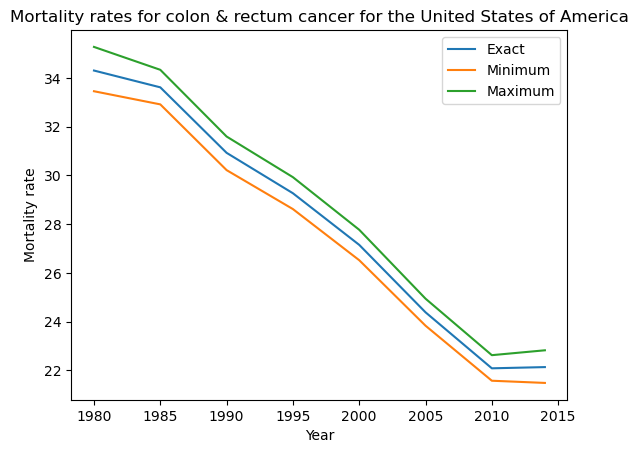

In [247]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for colon & rectum cancer for the United States of America')

For the US in general, the mortality rate has decreased steadily 

For the states: 

In [248]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

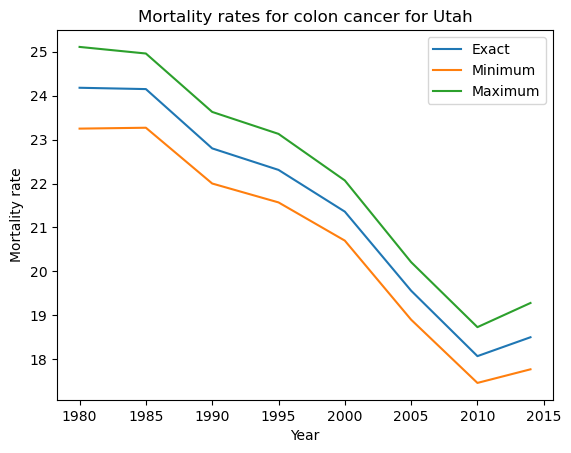

In [250]:
make_graph_national_stat(min_state_1980, 'Mortality rates for colon cancer for Utah')

The state with the lowest mortality rate, Utah, has a flat rate from 1980 to 1985, a stark decrease from 1985 to 2010, and a slight increase from 2010 to 2014. Additionally, this is another time Utah has appeared. 

In [251]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

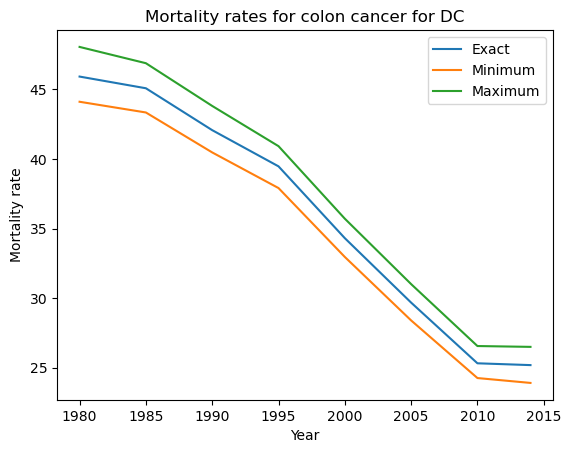

In [253]:
make_graph_national_stat(max_state_1980, 'Mortality rates for colon cancer for DC')

This shows a similar pattern to the US in general, and the rate of mortality in DC - the state with the highest mortality rate has decreased by almost half. 

For the counties:

In [254]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'North Slope Borough, Alaska'

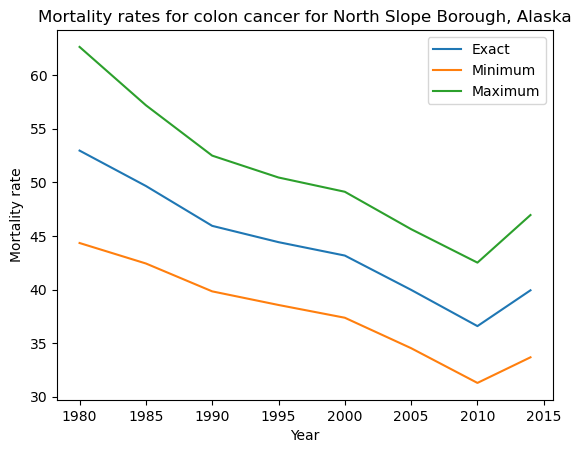

In [255]:
make_graph_national_stat(max_county_1980, 'Mortality rates for colon cancer for North Slope Borough, Alaska')

The county with the lowest mortality rate, North Slope Borough, Alaska, has generally decreased but has gone up since 2010.

In [256]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Starr County, Texas'

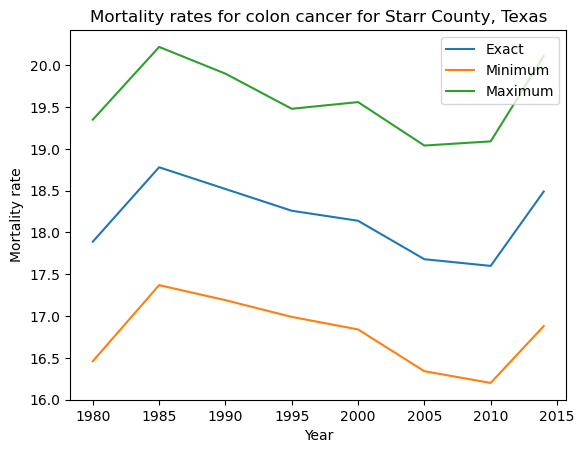

In [259]:
make_graph_national_stat(min_county_1980, 'Mortality rates for colon cancer for Starr County, Texas')

The mortality rate of the county with the minimal rate, Starr County, Texas, has been generally stagnant since 1980.

##### Liver cancer

In [271]:
sheet = 'Liver cancer'

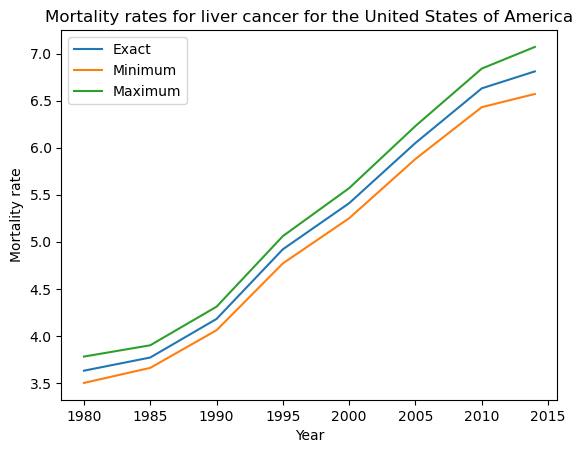

In [272]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for liver cancer for the United States of America')

For the US in general, mortality rates for liver cancer have been steadily increasing.

For the states:

In [273]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Oregon'

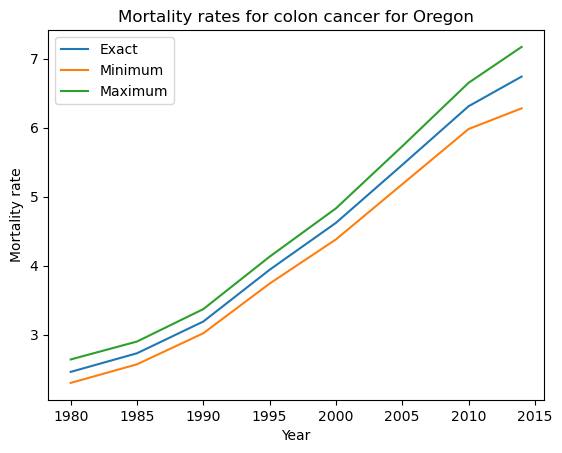

In [274]:
make_graph_national_stat(min_state_1980, 'Mortality rates for colon cancer for Oregon')

Oregon, the state with the lowest mortality rate, has a mortality rate similar to the US overall. 

In [275]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Hawaii'

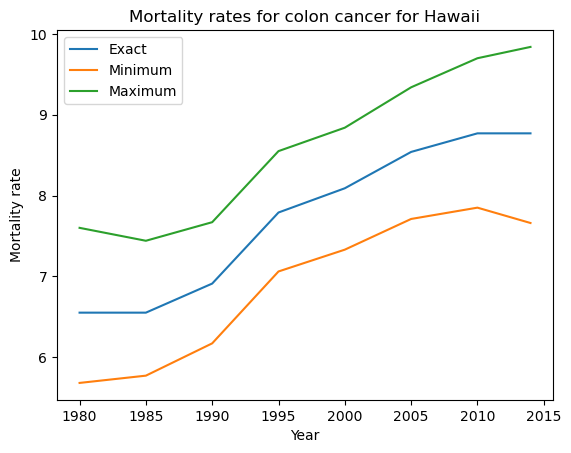

In [276]:
make_graph_national_stat(max_state_1980, 'Mortality rates for colon cancer for Hawaii')

Hawaii on the other hand, the state with the highest mortality rate, has a very different pattern and an overall increase with several periods (from 1980 to 1985, and from 2010 to 2014) of plateaus. 

As for counties:

In [277]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Kusilvak Census Area, Alaska'

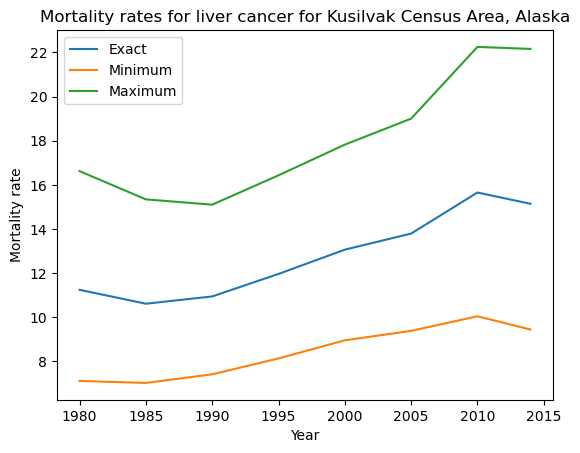

In [286]:
make_graph_national_stat(max_county_1980, 'Mortality rates for liver cancer for Kusilvak Census Area, Alaska')

For Kusilvak Census Area, Alaska, the county with the highest mortality rate, the rate has been generally stagnant. 

In [279]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

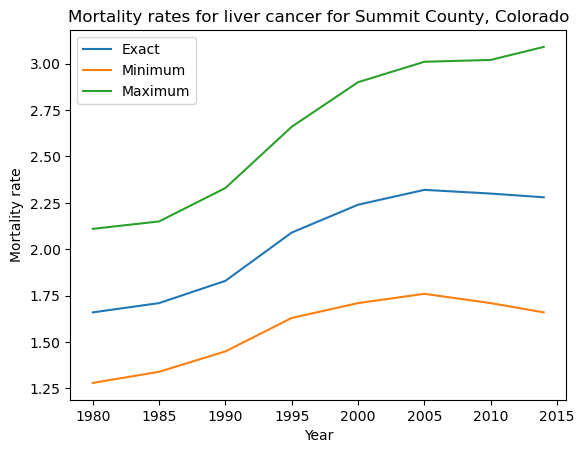

In [287]:
make_graph_national_stat(min_county_1980, 'Mortality rates for liver cancer for Summit County, Colorado')

For Summit County, Colorado, the county with the lowest mortality rate, the cancer rate has slightly increased, with most of this increase being from 1990 to 2005.

##### Gallbladder & biliary tract

In [288]:
sheet = "Gallbladder & biliary tract "

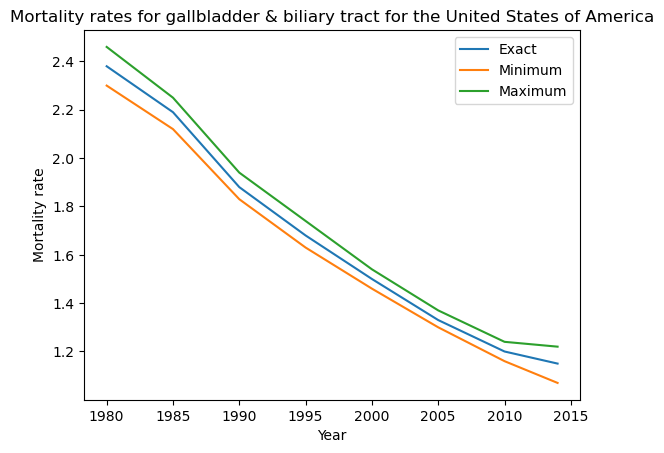

In [290]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for gallbladder & biliary tract for the United States of America')

For the US in general, there has been a huge decrease in the gallbladder cancer since 1980. 

In [291]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Mississippi'

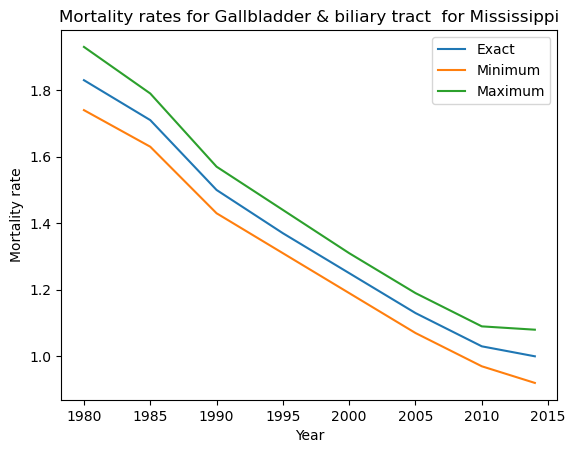

In [292]:
make_graph_national_stat(min_state_1980, 'Mortality rates for ' + sheet + ' for Mississippi')

For the state with the lowest mortality rate, Mississippi, there has been a steep decrease along the same lines as the US in general.

In [293]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Hawaii'

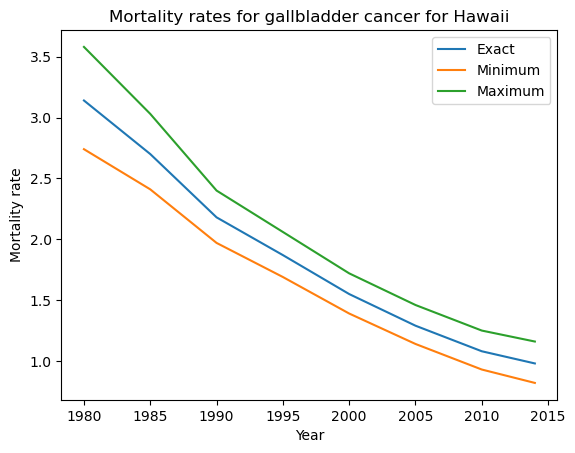

In [294]:
make_graph_national_stat(max_state_1980, 'Mortality rates for gallbladder cancer for Hawaii')

For Hawaii, the state with the highest mortality rate, there has been a steep decrease since 1980, along the same lines but greater than the US in general.

In [295]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Oglala Lakota County, South Dakota'

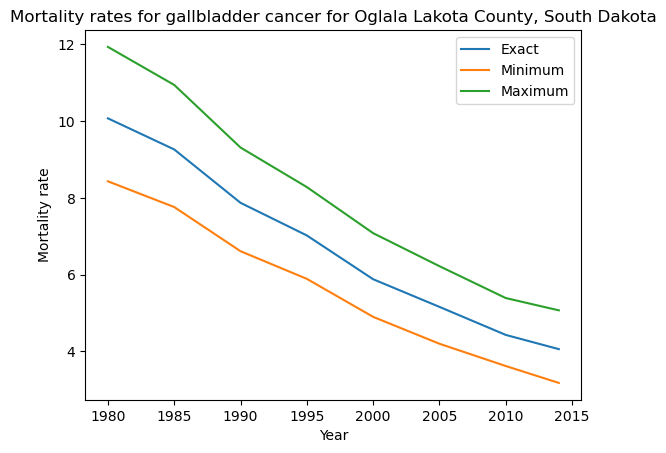

In [296]:
make_graph_national_stat(max_county_1980, 'Mortality rates for gallbladder cancer for Oglala Lakota County, South Dakota')

For Oglala Lakota County, South Dakota, the county with the highest mortality rate, there has been a considerable decrease since 1980 along the same lines as the US in general but with a greater error bar. 

In [297]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

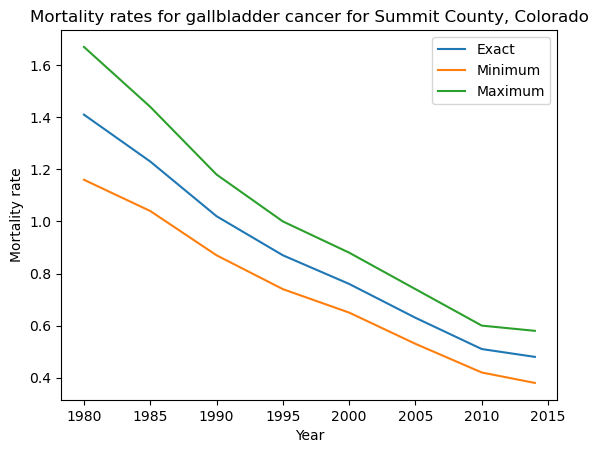

In [299]:
make_graph_national_stat(min_county_1980, 'Mortality rates for gallbladder cancer for Summit County, Colorado')

For Summit County, Colorado, the county with the lowest mortality rate, there has been a considerable decrease since 1980 along the same lines as the US in general but with a greater error bar. Also it's decreased by over half, which is considerable. 

##### Pancreatic cancer

In [301]:
sheet = "Pancreatic cancer"

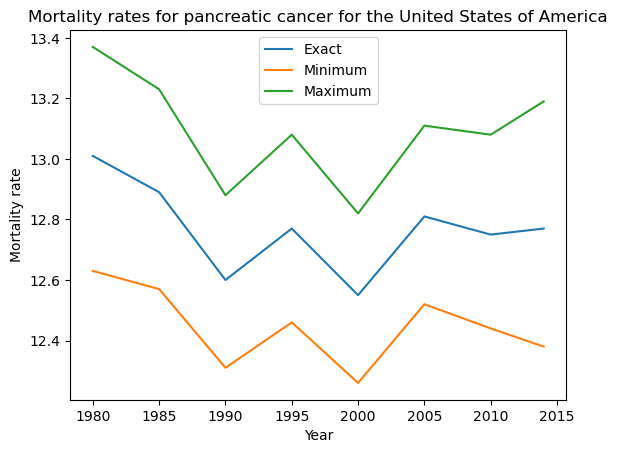

In [302]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for pancreatic cancer for the United States of America')

The mortality rate for the US in general has been stagnant, but with extreme fluctuations in five year intervals.

In [303]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

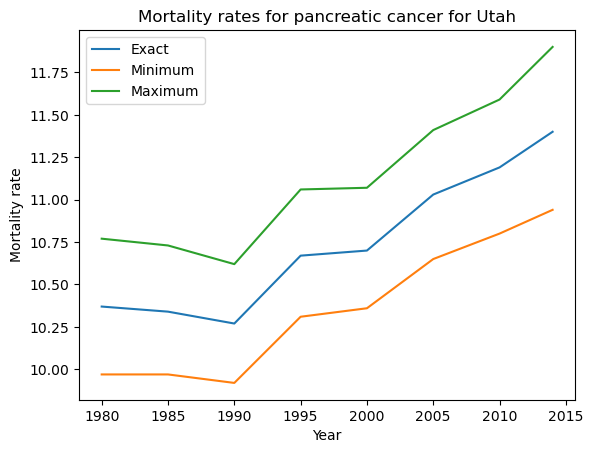

In [304]:
make_graph_national_stat(min_state_1980, 'Mortality rates for pancreatic cancer for Utah')

In the state with the least mortality rate, there has been a very very small increase since 1980. 

In [305]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

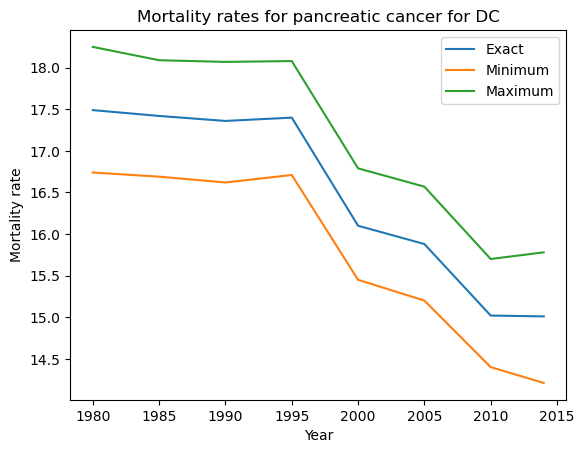

In [306]:
make_graph_national_stat(max_state_1980, 'Mortality rates for pancreatic cancer for DC')

There has been a decrease for DC, the state with the highest pancreatic cancer mortality rate, there's been a slight decrease since 1980.

For the counties:

In [307]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Sharkey County, Mississippi'

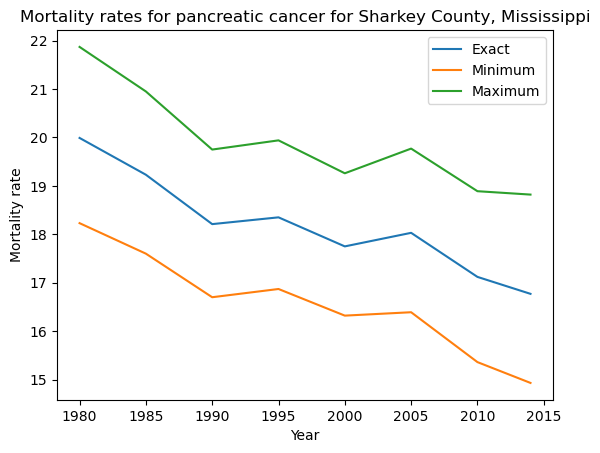

In [308]:
make_graph_national_stat(max_county_1980, 'Mortality rates for pancreatic cancer for Sharkey County, Mississippi')

For Sharkey County, Mississippi, the county with the highest mortality rate, there's been a tiny decrease since 1980, with a brief increase from 2000 to 2005. 

In [309]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

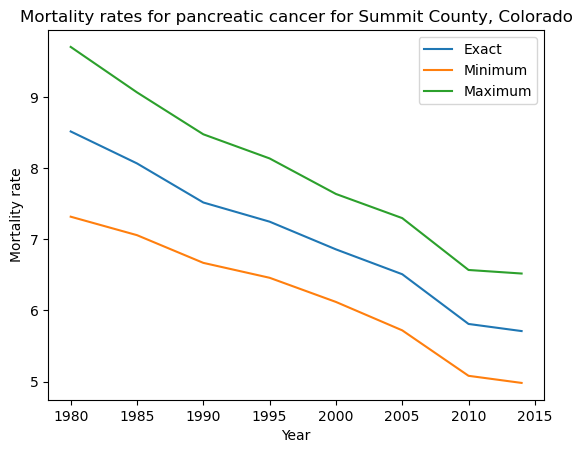

In [310]:
make_graph_national_stat(min_county_1980, 'Mortality rates for pancreatic cancer for Summit County, Colorado')

For Summit County, Colorado, the county with the lowest mortality rate from pancreatic cancer, there has also been a small decrease since 1980. 

##### Larynx cancer

In [326]:
sheet = "Larynx cancer"

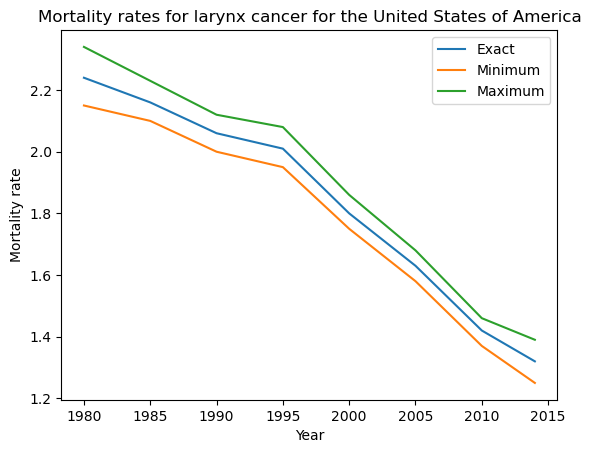

In [327]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for larynx cancer for the United States of America')

For the US in general, there has been a stark decrease, especially since 1995, in mortality rate. 

For the states:

In [328]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

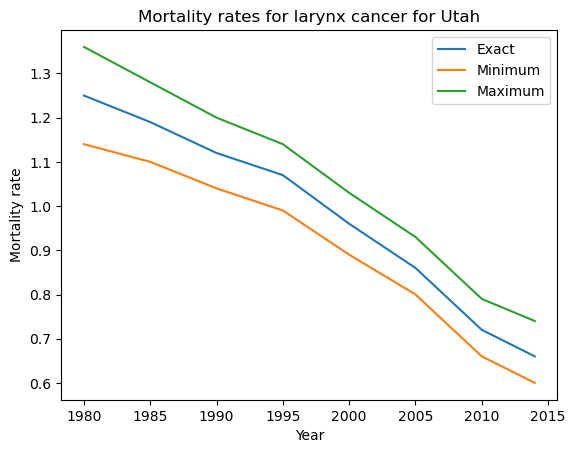

In [329]:
make_graph_national_stat(min_state_1980, 'Mortality rates for larynx cancer for Utah')

For Utah, the state with the minimal mortality rate, there's been a decline by half since 1980.

In [330]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

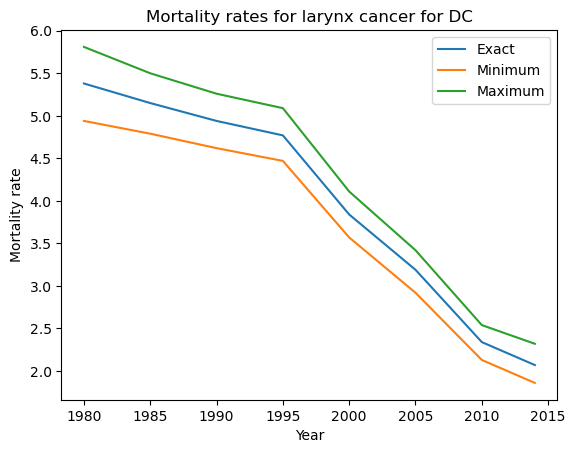

In [331]:
make_graph_national_stat(max_state_1980, 'Mortality rates for larynx cancer for DC')

For DC, the state with the highest mortality rate, there has been a lrge decrease since 1980, with most of this since 1995.

In [317]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'District of Columbia, District of Columbia'

The county with the highest mortality rate is DC, which has already been covered. 

In [318]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

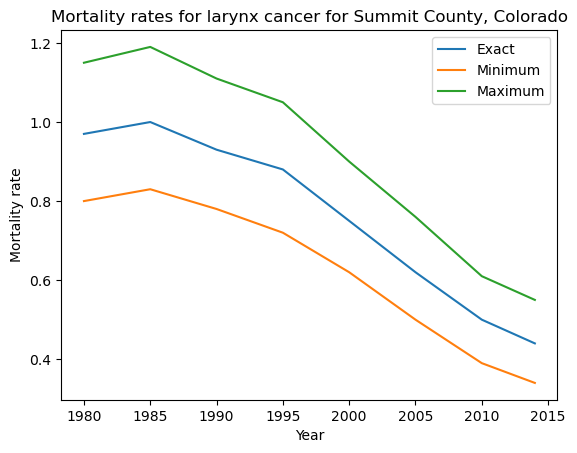

In [320]:
make_graph_national_stat(min_county_1980, 'Mortality rates for larynx cancer for Summit County, Colorado')

For Summit County, Colorado, the county with the lowest mortality rate, the mortality rate has halved, with most of this being from 1985 to 2014. 

##### Tracheal, bronchus, & lung

In [332]:
sheet = "Tracheal, bronchus, & lung "

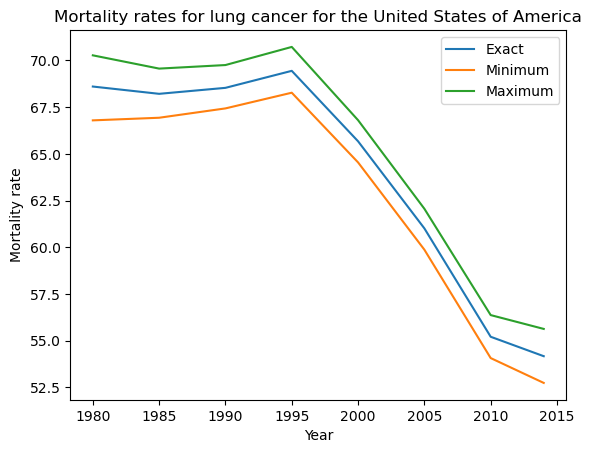

In [333]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for lung cancer for the United States of America')

For the US in general, mortality rate has in general decreased, with most of this decrease being from 1995 to 2010. 

In [334]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

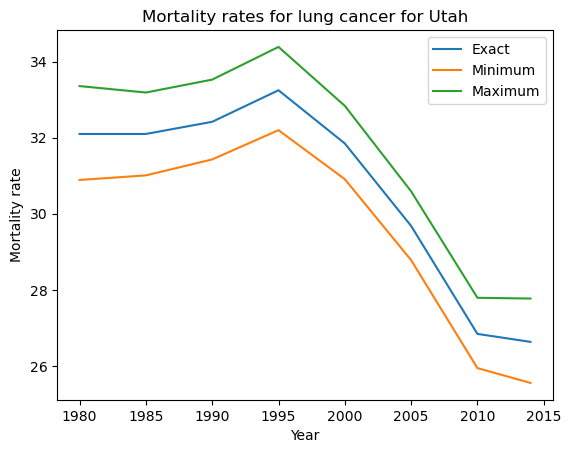

In [336]:
make_graph_national_stat(min_state_1980, 'Mortality rates for lung cancer for Utah')

In Utah, the state with the lowest mortality rates from lung cancer, there has been a decrease along similar lines as the US.

In [337]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

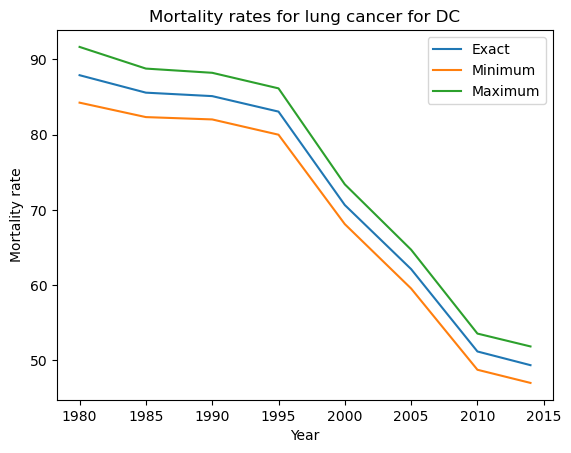

In [338]:
make_graph_national_stat(max_state_1980, 'Mortality rates for lung cancer for DC')

For DC, the state with the highest rates of mortality, there has been a decrease along the same lines as the US, except there's been a slight decrease instead of a slight increase between 1980 and 1995.

In [339]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Union County, Florida'

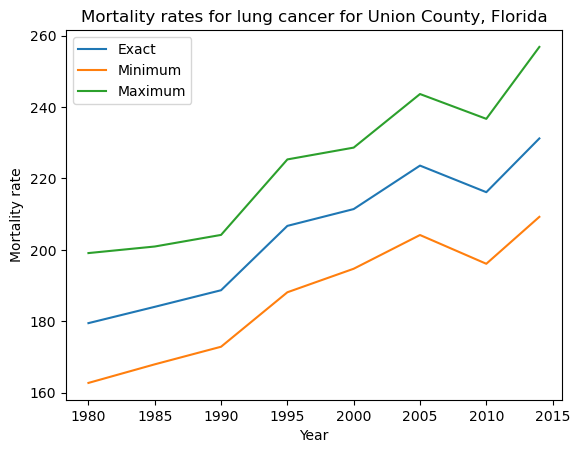

In [340]:
make_graph_national_stat(max_county_1980, 'Mortality rates for lung cancer for Union County, Florida')

For Union County, Florida, the county with the highest mortality rates, there has been a considerable increase of over one and a half times in lung cancer since 1980.

In [341]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Cache County, Utah'

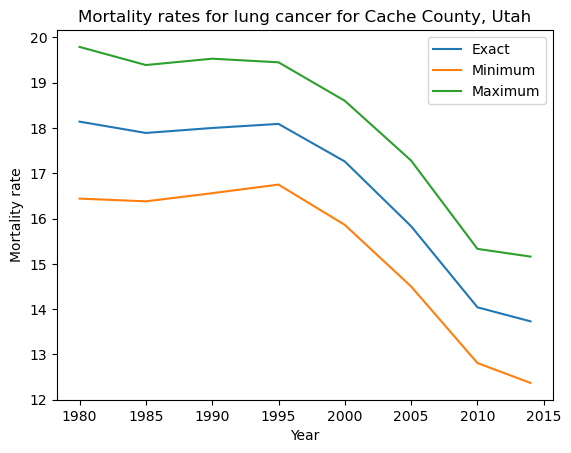

In [343]:
make_graph_national_stat(min_county_1980, 'Mortality rates for lung cancer for Cache County, Utah')

For Cache County, Utah, the county with the lowest rates of mortality, there has been a decrease of almost half since 1980. 

##### Malignant skin melanoma

In [344]:
sheet = "Malignant skin melanoma"

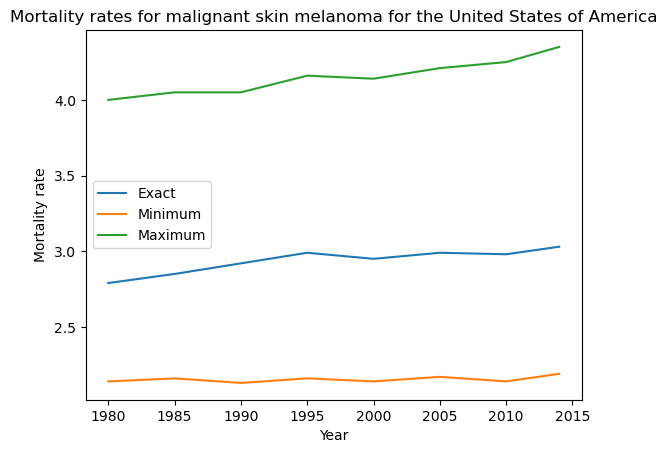

In [346]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for malignant skin melanoma for the United States of America')

Mortality rates in the US generally have been stagnant since 1980.

In [347]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

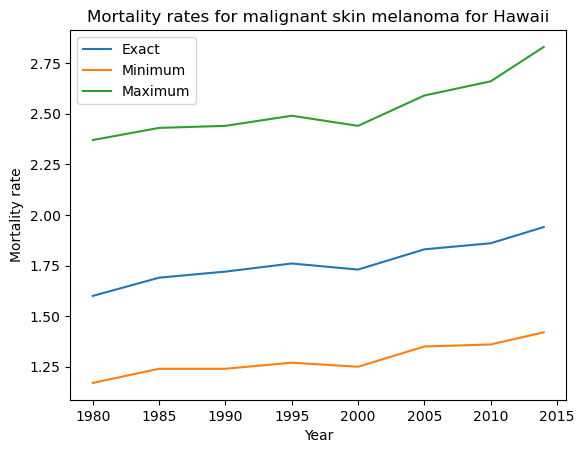

In [348]:
make_graph_national_stat(min_state_1980, 'Mortality rates for malignant skin melanoma for Hawaii')

Mortality rates for malignant skin melanoma in Hawaii, the state with the smallest mortality rates, have been stagnant as well. 

In [349]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Delaware'

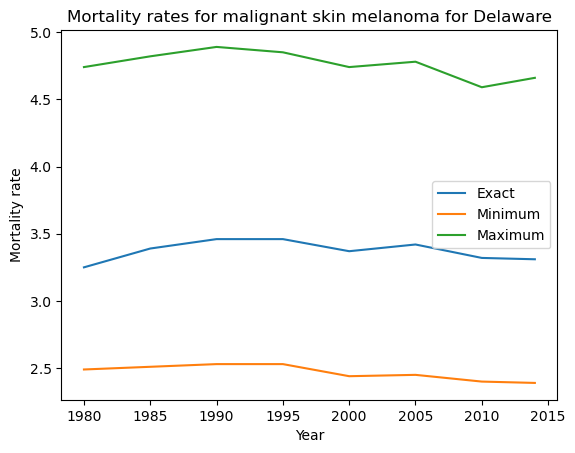

In [350]:
make_graph_national_stat(max_state_1980, 'Mortality rates for malignant skin melanoma for Delaware')

Likewise in Delaware, the state with the highest mortality rates, the rates have been stagnant since 1980.

In [351]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Nantucket County, Massachusetts'

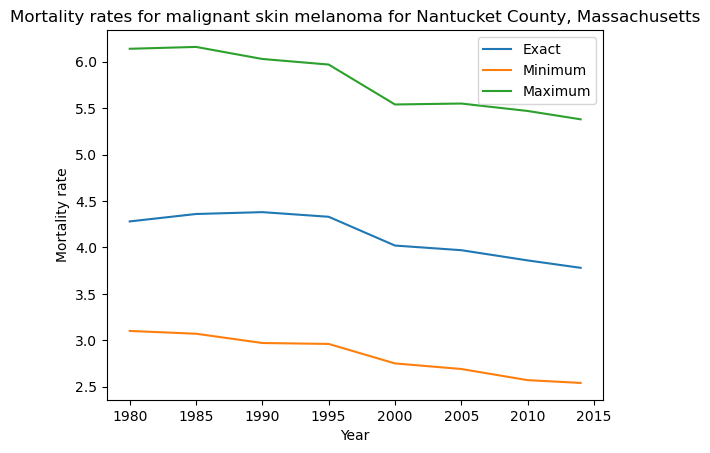

In [352]:
make_graph_national_stat(max_county_1980, 'Mortality rates for malignant skin melanoma for Nantucket County, Massachusetts')

Likewise in Nantucket County, Massachusetts, the state with the highest mortality rates, the mortality rate has been stagnant. 

In [353]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Menominee County, Wisconsin'

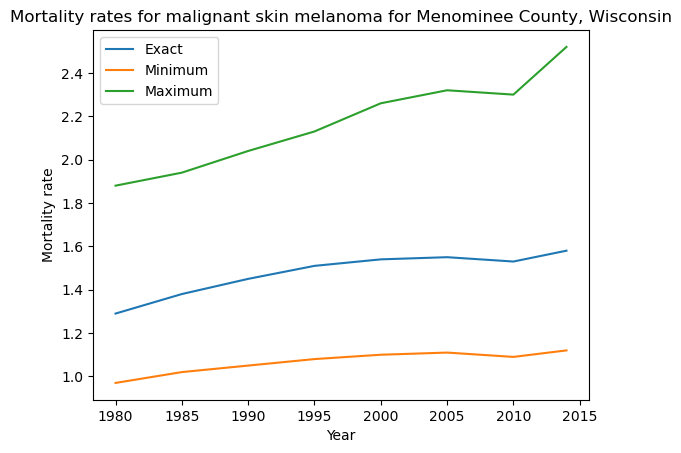

In [355]:
make_graph_national_stat(min_county_1980, 'Mortality rates for malignant skin melanoma for Menominee County, Wisconsin')

Likewise, in Menominee County, Wisconsin, malignant skin melanoma mortality rates have been stagnant since 1980.

##### Non-melanoma skin cancer

In [356]:
sheet = "Non-melanoma skin cancer"

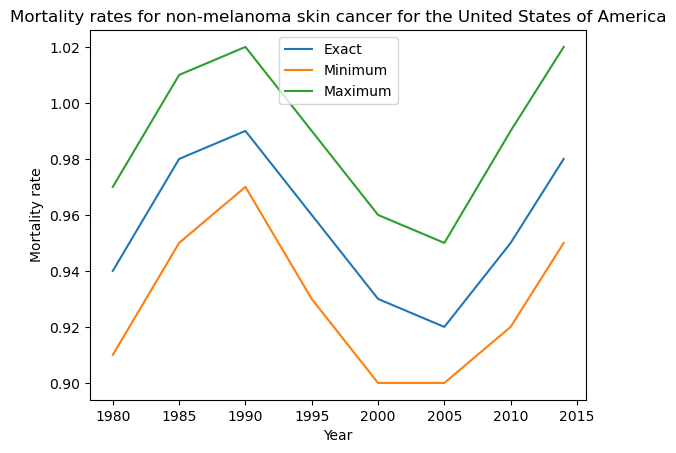

In [357]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for non-melanoma skin cancer for the United States of America')

In the US in general, the rates have been generally stagnant, with a small cyclical movement from 1980 to 2014. 

In [358]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Alaska'

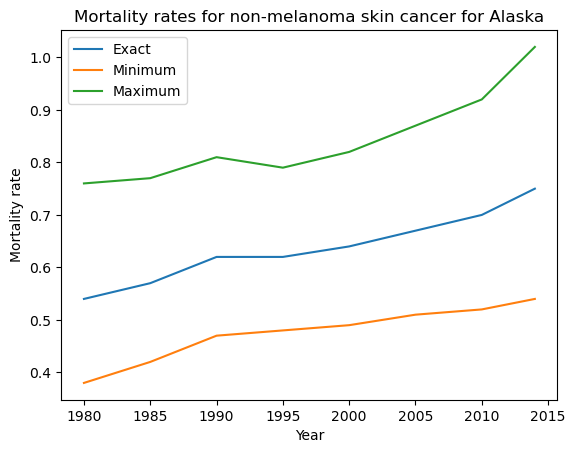

In [360]:
make_graph_national_stat(min_state_1980, 'Mortality rates for non-melanoma skin cancer for Alaska')

In Alaska, the state with the smallest non-melanoma skin cancer rates, the rate has been stagnant, with a possible increase well within the margin of error.

In [361]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

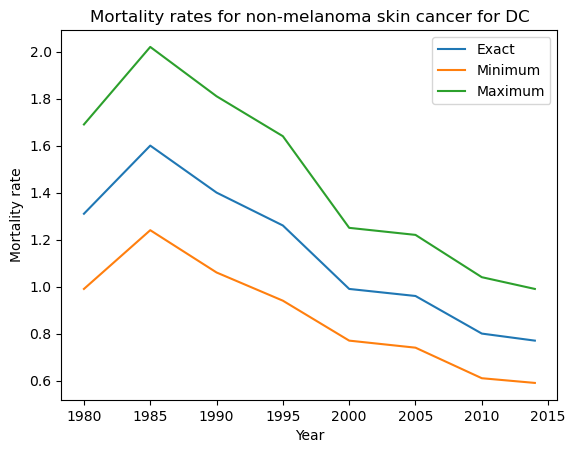

In [365]:
make_graph_national_stat(max_state_1980, 'Mortality rates for non-melanoma skin cancer for DC')

In DC, the state with the highest rates of lung cancer, there has been a general decrease in mortality rates since 1980, with in particular a decrease of half since 1985. 

In [363]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Union County, Florida'

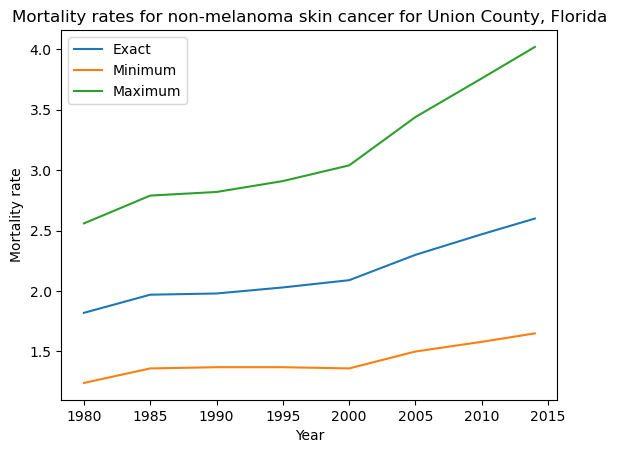

In [366]:
make_graph_national_stat(max_county_1980, 'Mortality rates for non-melanoma skin cancer for Union County, Florida')

In Union County, Florida, there has been a generally stagnant mortality rate, with a possible increase well within the margin of error since 2000. 

In [367]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Hoonah-Angoon Census Area, Alaska'

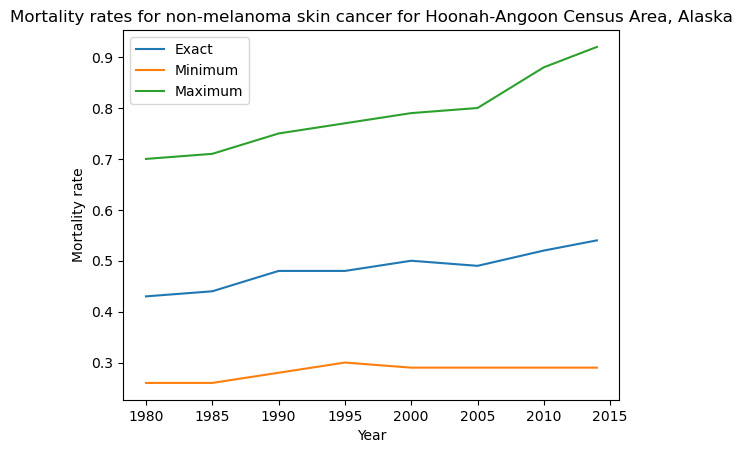

In [369]:
make_graph_national_stat(min_county_1980, 'Mortality rates for non-melanoma skin cancer for Hoonah-Angoon Census Area, Alaska')

In the county with the lowest mortality rate, Hoonah-Angoon Census Area, Alaska, there has likewise been a very small possible increase well within margin of error.

##### Breast cancer

In [370]:
sheet = "Breast cancer"

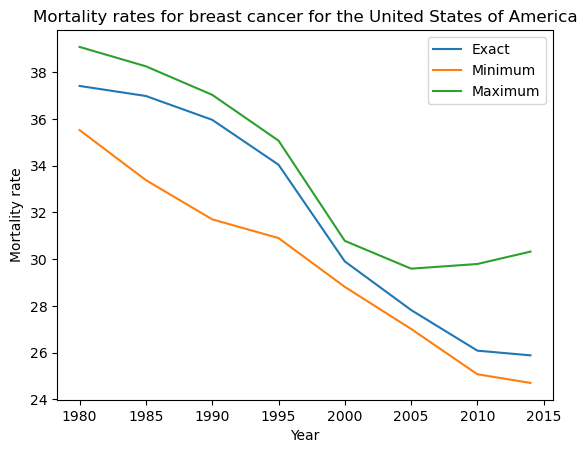

In [372]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for breast cancer for the United States of America')

In the US in general, mortality rates have decreased, with about a one-fourth decrease since 1980.

In [373]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

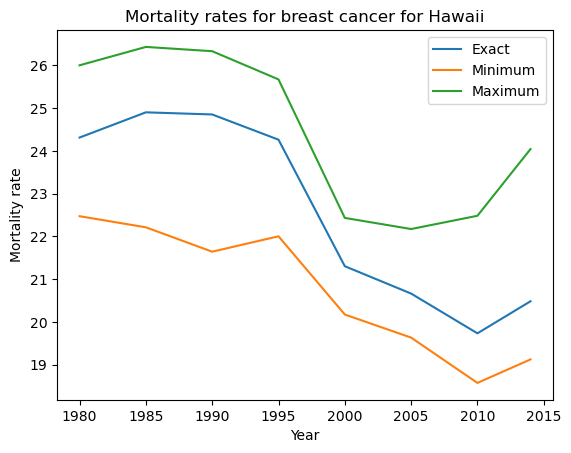

In [374]:
make_graph_national_stat(min_state_1980, 'Mortality rates for breast cancer for Hawaii')

In the state with the lowest mortality rate, Hawaii, there is a trend downwards but a modest one. 

In [375]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

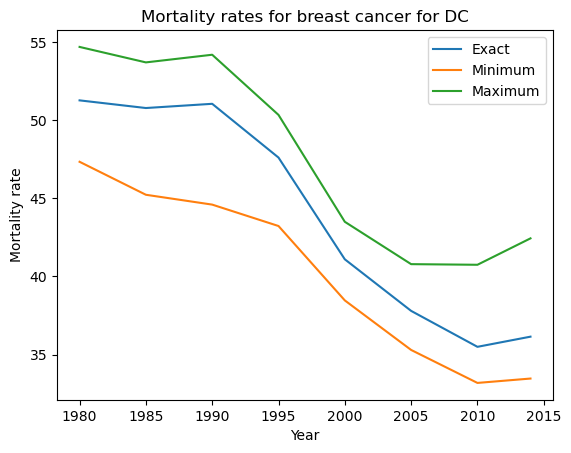

In [376]:
make_graph_national_stat(max_state_1980, 'Mortality rates for breast cancer for DC')

For the state with the highest mortality rate, DC, there has been a larger decrease since 1980. 

In [377]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Nantucket County, Massachusetts'

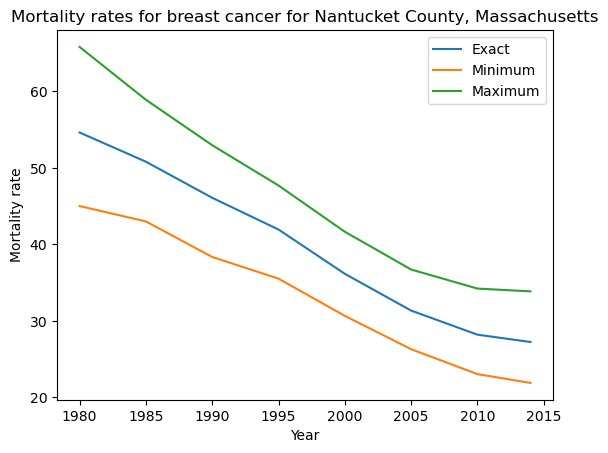

In [378]:
make_graph_national_stat(max_county_1980, 'Mortality rates for breast cancer for Nantucket County, Massachusetts')

For Nantucket County, Massachusetts, there has been a very large decrease in mortality rates since 1980.

In [379]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Starr County, Texas'

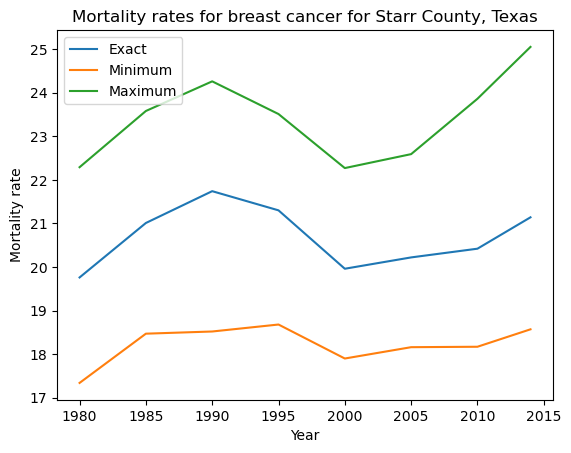

In [380]:
make_graph_national_stat(min_county_1980, 'Mortality rates for breast cancer for Starr County, Texas')

For the county with the smallest mortality rate, Starr County, Texas, there has been a stagnant mortality rate since 1980.

##### Cervical cancer

In [381]:
sheet = "Cervical cancer"

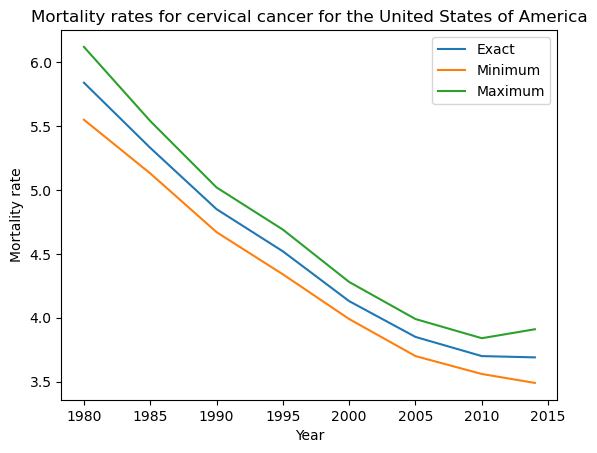

In [384]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for cervical cancer for the United States of America')

In the United States in general, since 1980, there has been a decrease of about one third since 1980, with the decrease reducing since 1990. 

In [383]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

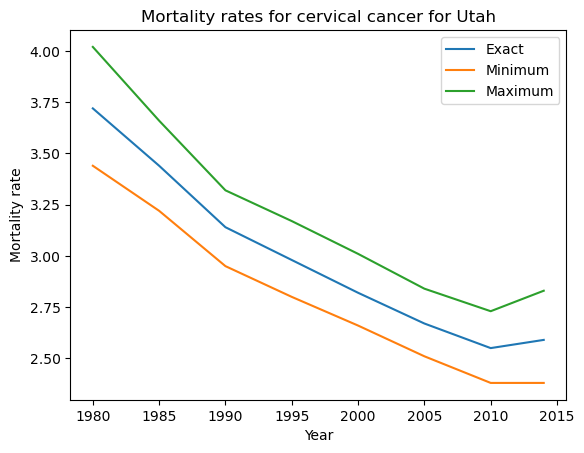

In [386]:
make_graph_national_stat(min_state_1980, 'Mortality rates for cervical cancer for Utah')

For Utah, the state with the lowest mortality rates, there is also a considerable decrease of about one third, but this decrease slowly shrinking until from 2010-2014 it is stagnant.

In [387]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

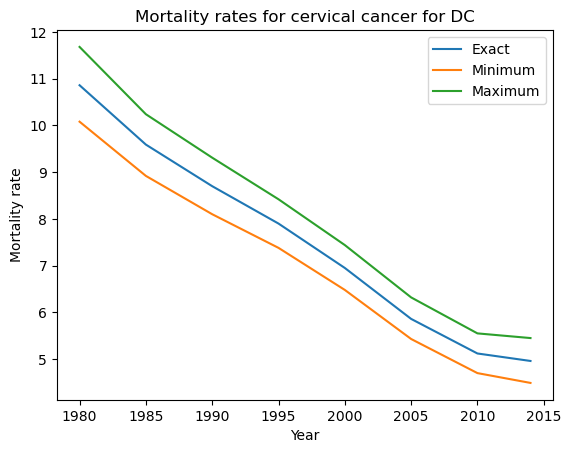

In [388]:
make_graph_national_stat(max_state_1980, 'Mortality rates for cervical cancer for DC')

For DC, the state with the highest mortality rate, there has been a decrease of about half since 1980. 

In [389]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Tunica County, Mississippi'

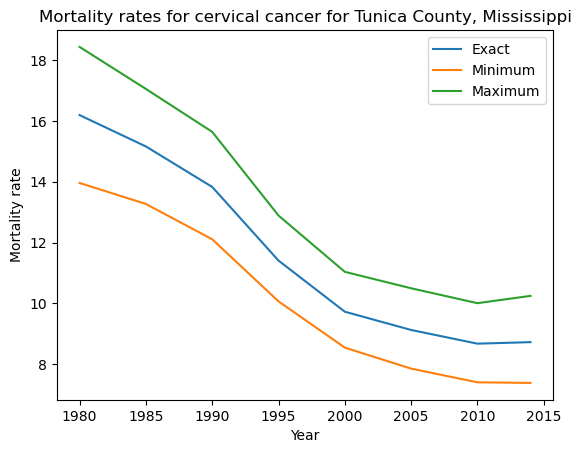

In [390]:
make_graph_national_stat(max_county_1980, 'Mortality rates for cervical cancer for Tunica County, Mississippi')

For Tunica County, Mississippi, the county with the highest mortality rates, there is a decrease of almost half since 1980, and with almost no change from 2000 to 2014.

In [391]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

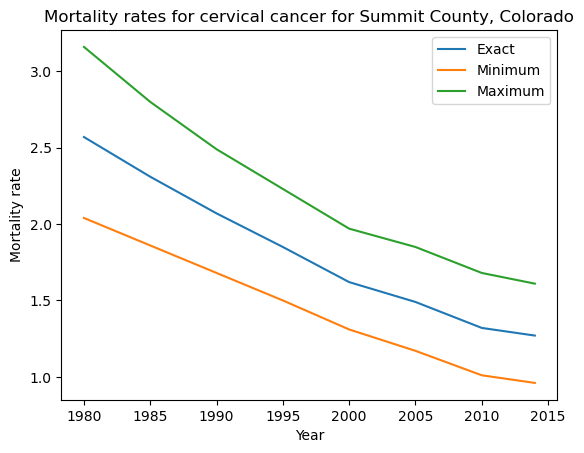

In [392]:
make_graph_national_stat(min_county_1980, 'Mortality rates for cervical cancer for Summit County, Colorado')

For Summit County, Colorado, the county with the lowest mortality rate, there is a decrease of about two fifths, but with a high enough error bar that it may be considerably smaller. 

##### Uterine cancer

In [393]:
sheet = "Uterine cancer"

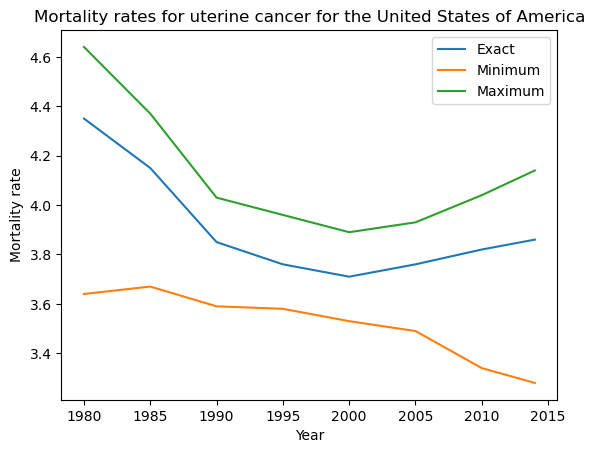

In [394]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for uterine cancer for the United States of America')

For the US in general, the mortality rate is generally stagnant, with a possible decrease that lies well within the margin of error. 

In [395]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Alaska'

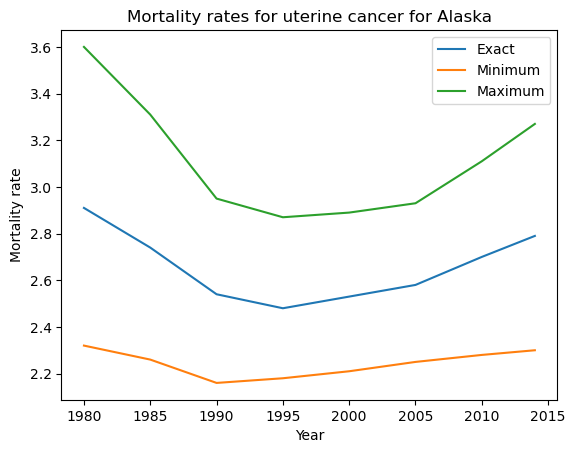

In [396]:
make_graph_national_stat(min_state_1980, 'Mortality rates for uterine cancer for Alaska')

For Alaska, the state with the least mortality rate, there is also virtually no change, but with a possible decrease that lies well within the margin of error. 

In [397]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

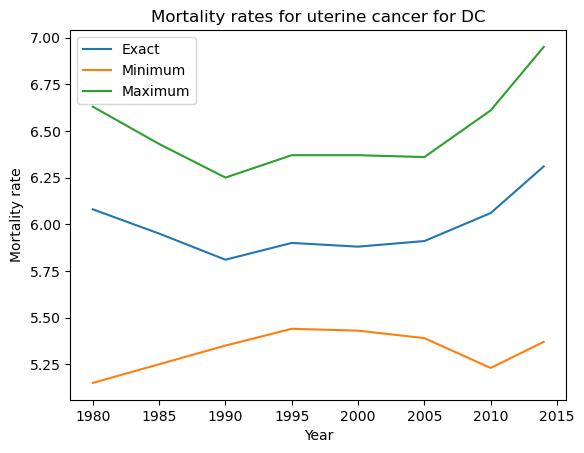

In [398]:
make_graph_national_stat(max_state_1980, 'Mortality rates for uterine cancer for DC')

For DC, the state with the highest rate of mortality, there is also virtually no change, with a possible increase lying well within the margin of error.

In [399]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Sharkey County, Mississippi'

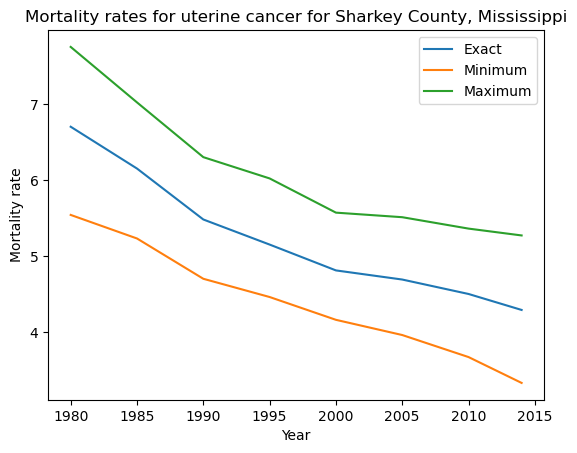

In [400]:
make_graph_national_stat(max_county_1980, 'Mortality rates for uterine cancer for Sharkey County, Mississippi')

For the county with the highest mortality rate, Sharkey County, Mississippi, there has been a considerable decrease since 1980, with most of this decrease being from 1980 to 1990, and a total decrease of about one third. 

In [401]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Haines Borough, Alaska'

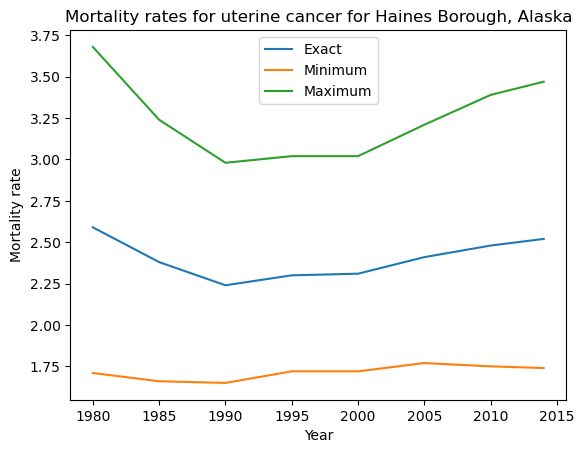

In [402]:
make_graph_national_stat(min_county_1980, 'Mortality rates for uterine cancer for Haines Borough, Alaska')

For Haines Borough, Alaska, the county with the least mortality rate there has been virtually no change from 1980 to 2014. 

##### Ovarian cancer

In [403]:
sheet = "Ovarian cancer"

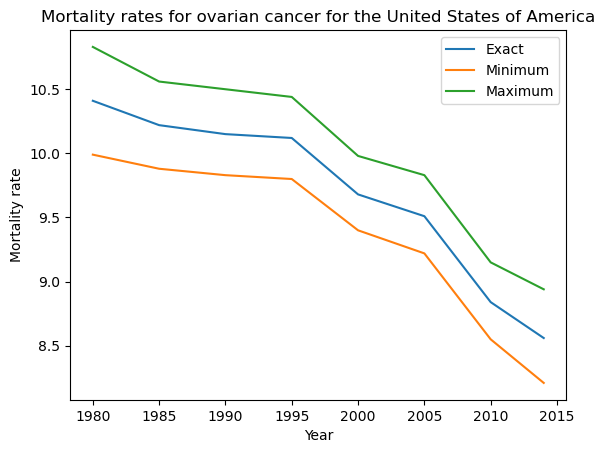

In [404]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for ovarian cancer for the United States of America')

For the US in general, the mortality rate has decreased, but fairly modestly since 1980. 

In [405]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

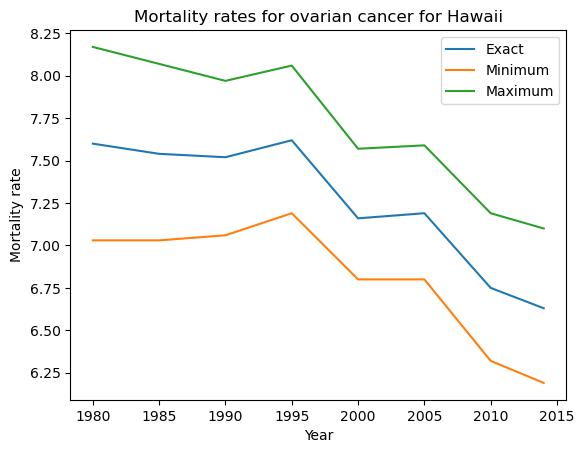

In [406]:
make_graph_national_stat(min_state_1980, 'Mortality rates for ovarian cancer for Hawaii')

In Hawaii, the state with the lowest mortality rate, there has been a very small decrease since 1980, with several peaks from 1990-1995 and 2000-2005. 

In [407]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'New Jersey'

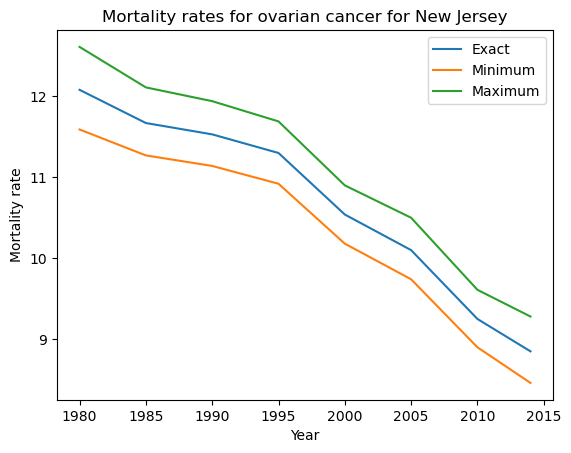

In [410]:
make_graph_national_stat(max_state_1980, 'Mortality rates for ovarian cancer for New Jersey')

In New Jersey, the state with the highest mortality rate, there has been a one fourth decrease since 1980. 

In [409]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Sullivan County, New York'

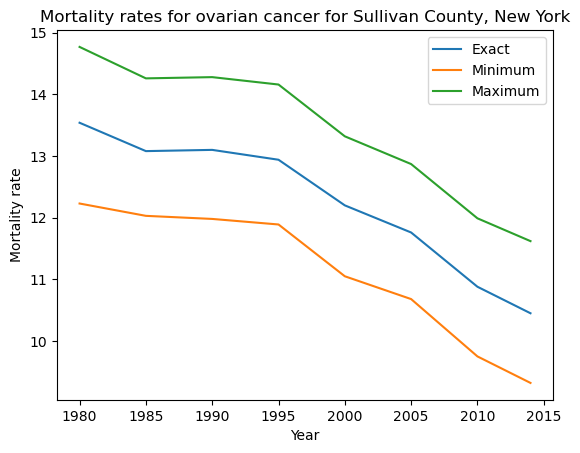

In [411]:
make_graph_national_stat(max_county_1980, 'Mortality rates for ovarian cancer for Sullivan County, New York')

For Sullivan County, New York, the county with the highest mortality rate, there has been a very slight decrease since 1980.

In [412]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Starr County, Texas'

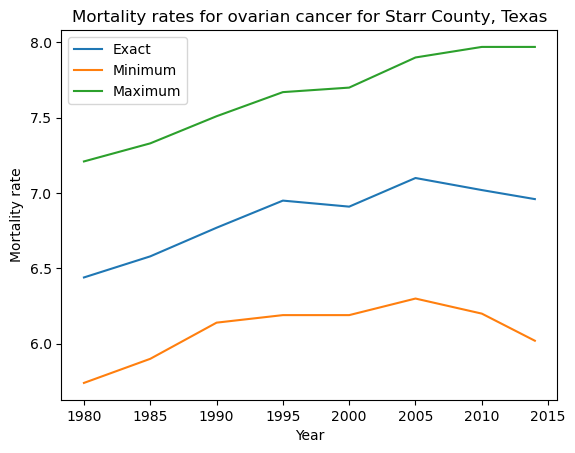

In [413]:
make_graph_national_stat(min_county_1980, 'Mortality rates for ovarian cancer for Starr County, Texas')

For the county with the lowest mortality rate, Starr County, Texas, there has been virtually no change since 1980, with a possible increase well within a margin of error.

##### Prostate cancer

In [414]:
sheet = "Prostate cancer"

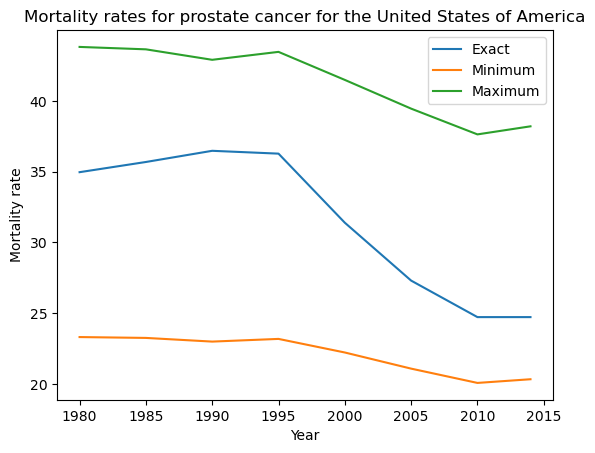

In [415]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for prostate cancer for the United States of America')

In the US in general, the mortality rate is stagnant, and there's a possible increase that lies well within the margin of error.

In [416]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

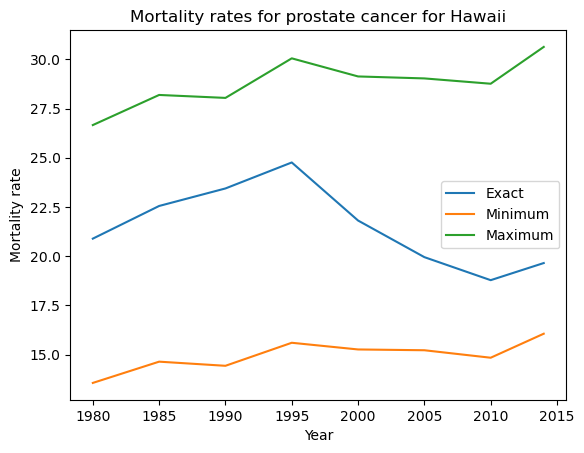

In [417]:
make_graph_national_stat(min_state_1980, 'Mortality rates for prostate cancer for Hawaii')

In Hawaii, the state with the lowest mortality rate, the mortality rate is stagnant, with a very small decrease that lies well within the margin of error.

In [418]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

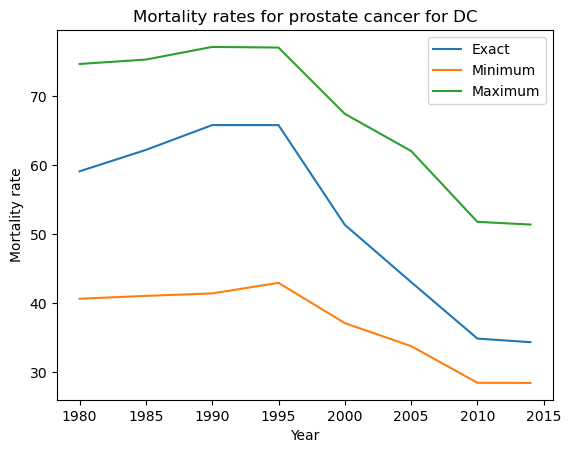

In [419]:
make_graph_national_stat(max_state_1980, 'Mortality rates for prostate cancer for DC')

For DC, the state with the highest mortality rate, the mortality rate is stagnant, with a possible decrease well into margin of error.

In [420]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Sharkey County, Mississippi'

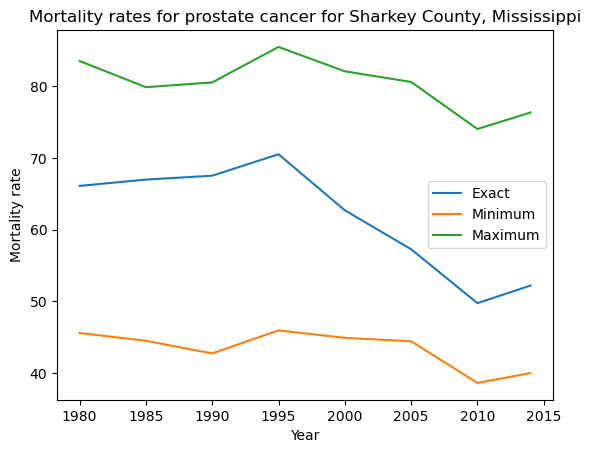

In [421]:
make_graph_national_stat(max_county_1980, 'Mortality rates for prostate cancer for Sharkey County, Mississippi')

For Sharkey County, Mississippi, the county with the highest mortality rate, the mortality rate has been stagnant, with a possible decrease since 1980 well within the margin of error. 

In [422]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Kalawao County, Hawaii'

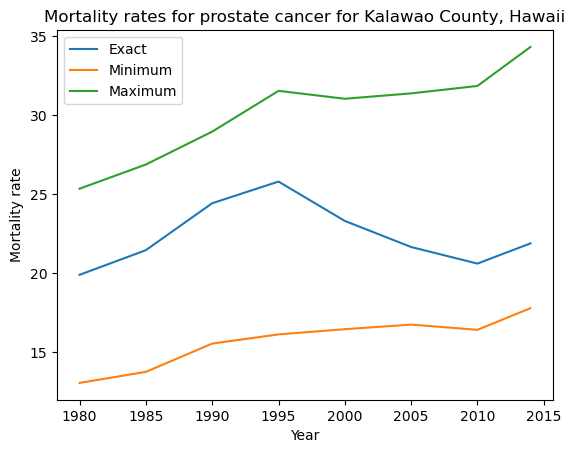

In [423]:
make_graph_national_stat(min_county_1980, 'Mortality rates for prostate cancer for Kalawao County, Hawaii')

For Kalawao County, Hawaii, the county with the lowest mortality rate, there has been virtually no change since 1980, with a possible increase well within the margin of error. 

##### Testicular cancer

In [424]:
sheet = "Testicular cancer"

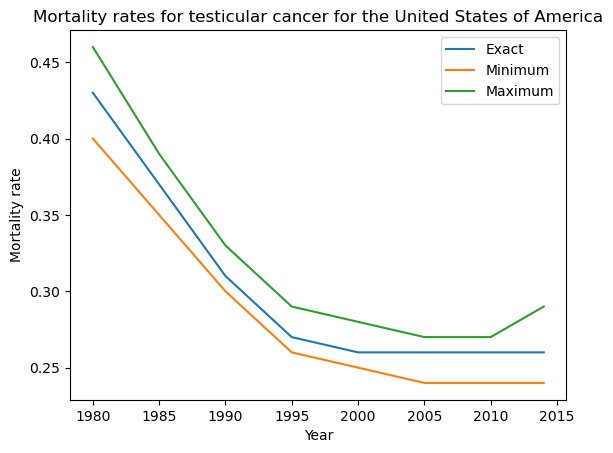

In [425]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for testicular cancer for the United States of America')

In the US in general, there has been a large decrease of almost half, with virtually no change whatsoever from 1995 to 2014.

In [426]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Alaska'

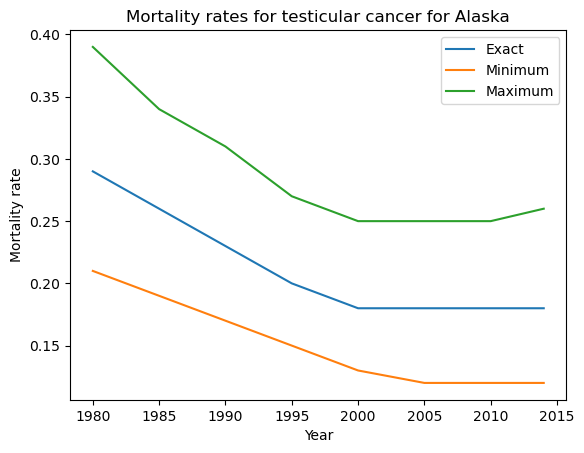

In [427]:
make_graph_national_stat(min_state_1980, 'Mortality rates for testicular cancer for Alaska')

In Alaska, the state with the lowest mortality rate, there has been no change whatsoever, with a possible decrease well within the margin of error.

In [428]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Rhode Island'

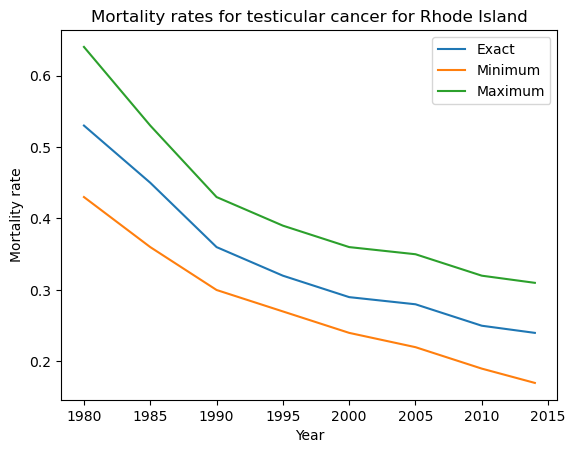

In [430]:
make_graph_national_stat(max_state_1980, 'Mortality rates for testicular cancer for Rhode Island')

In Rhode Island, the state with the highest mortality rate, there has been a general decrease since 1980, with a decrease of over half since 1980.

In [431]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Ogemaw County, Michigan'

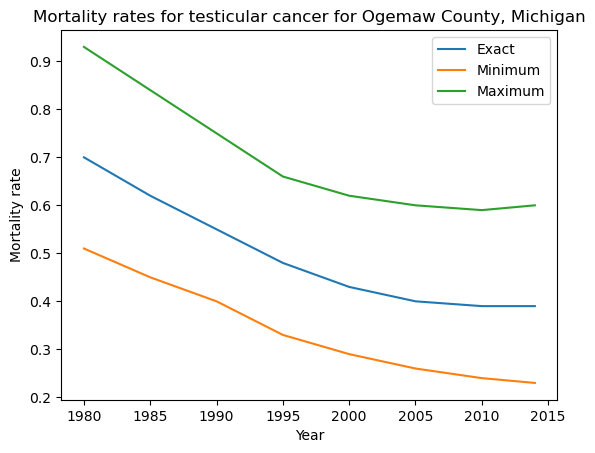

In [432]:
make_graph_national_stat(max_county_1980, 'Mortality rates for testicular cancer for Ogemaw County, Michigan')

For the county with the highest mortality rate, Ogemaw County, Michigan, the mortality rate is stagnant, with a possible decrease lying well within the margin of error.

In [433]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Madison County, Mississippi'

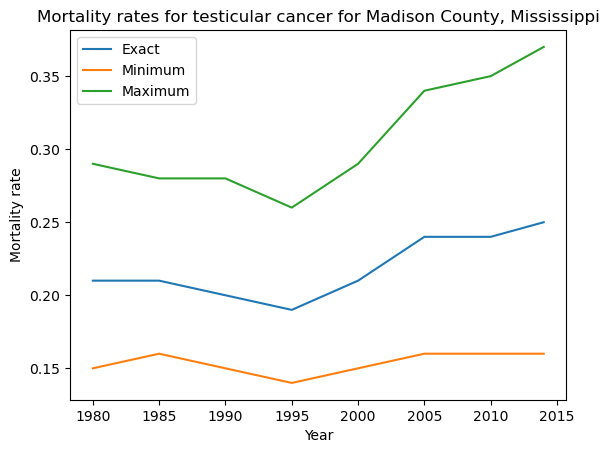

In [434]:
make_graph_national_stat(min_county_1980, 'Mortality rates for testicular cancer for Madison County, Mississippi')

For Madison County, Mississippi, the county with the lowest mortality rate, the mortality rate lies well within the margin of error, with a possible increase since 1980.

##### Kidney cancer

In [435]:
sheet = "Kidney cancer"

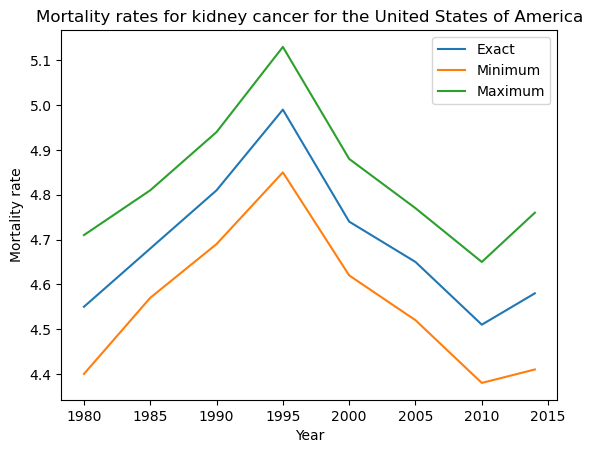

In [437]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for kidney cancer for the United States of America')

In the US in general, there has been virtually no change in mortality rate from 1980 to 2014, but there's been a peak about 1995 in the middle.

In [438]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

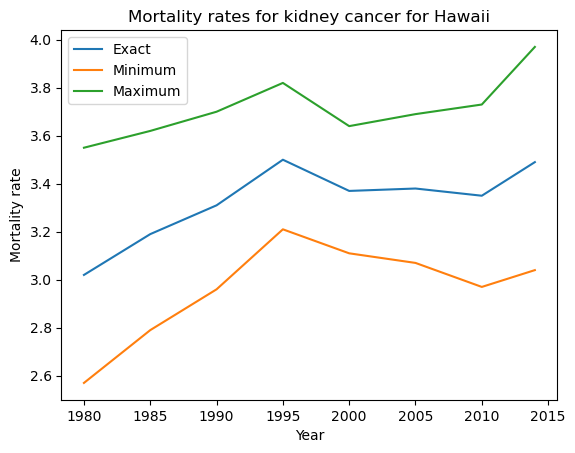

In [439]:
make_graph_national_stat(min_state_1980, 'Mortality rates for kidney cancer for Hawaii')

In Hawaii, the state with the lowest mortality rate, there has been virtually no change in mortality rate from 1980 to 2015, with a possible increase well into the margin of error.

In [440]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Alaska'

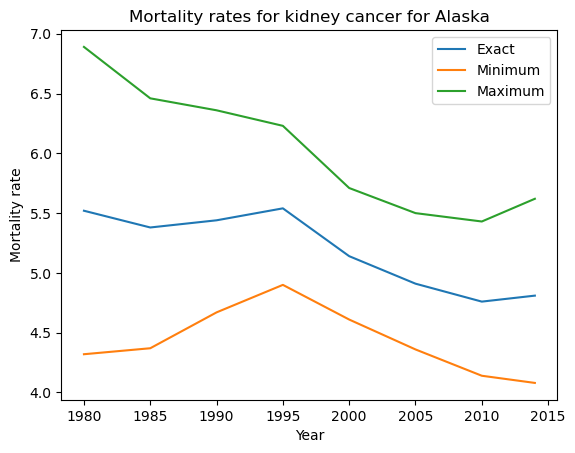

In [441]:
make_graph_national_stat(max_state_1980, 'Mortality rates for kidney cancer for Alaska')

In Alaska, the state with the highest mortality rate, there has been virtually no change in mortality rate from 1980 to 2015, with a possible decrease well inside the margin of error.

In [442]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Menominee County, Wisconsin'

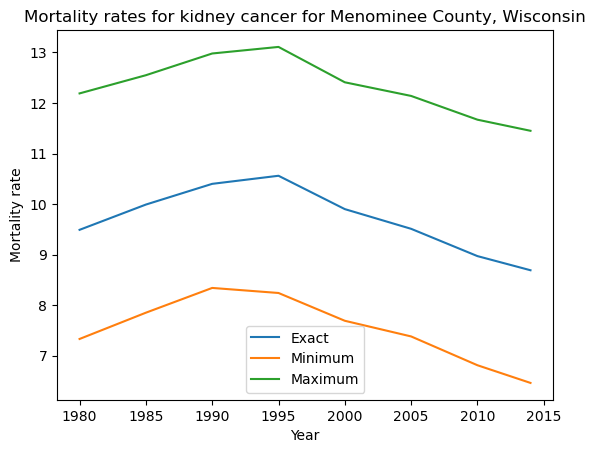

In [443]:
make_graph_national_stat(max_county_1980, 'Mortality rates for kidney cancer for Menominee County, Wisconsin')

In Menominee County, Wisconsin, the county with the highest mortality rate, there has been virtually no change, with a possible decrease well within the margin of error.

In [444]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Honolulu County, Hawaii'

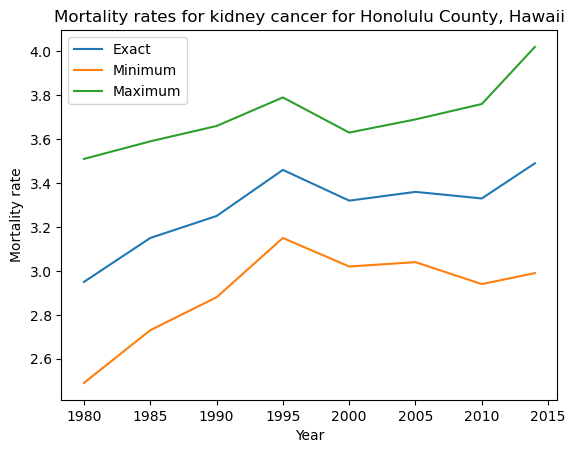

In [446]:
make_graph_national_stat(min_county_1980, 'Mortality rates for kidney cancer for Honolulu County, Hawaii')

In Honolulu County, Hawaii, the county with the lowest mortality rate, there has been virtually no change, with a possible increase somewhat within the margin of error.

##### Bladder cancer

In [447]:
sheet = "Bladder cancer"

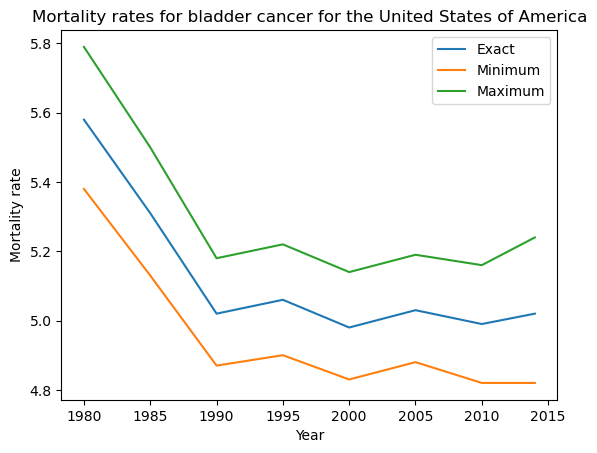

In [448]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for bladder cancer for the United States of America')

In the US in general, there has been a decrease of about one sixth, with all of this change being from 1980 to 1990 and none from 1990 to 2014.

In [449]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

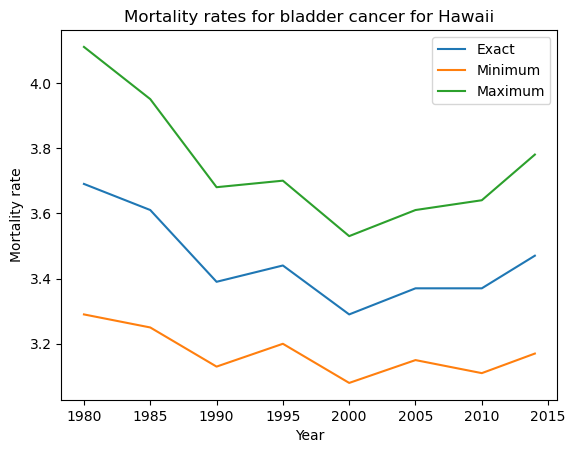

In [450]:
make_graph_national_stat(min_state_1980, 'Mortality rates for bladder cancer for Hawaii')

In Hawaii, the state with the lowest mortality rate, there has been virtually no change since 1980, with a possible decrease well within the margin of error.

In [451]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'New Jersey'

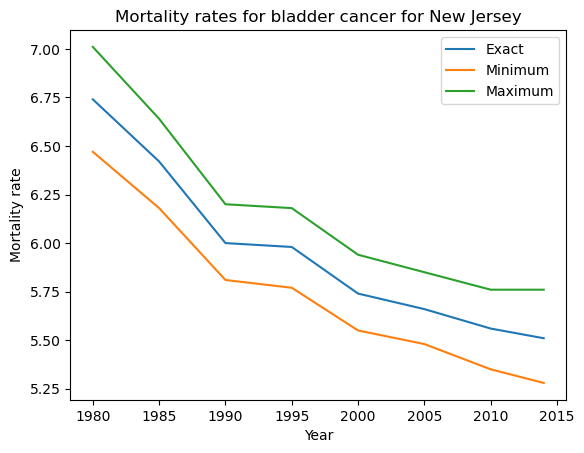

In [452]:
make_graph_national_stat(max_state_1980, 'Mortality rates for bladder cancer for New Jersey')

In New Jersey, the state with the highest mortality rate, there has been a general decrease since 1980, with a decrease of about one fifth. 

In [453]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Hamilton County, New York'

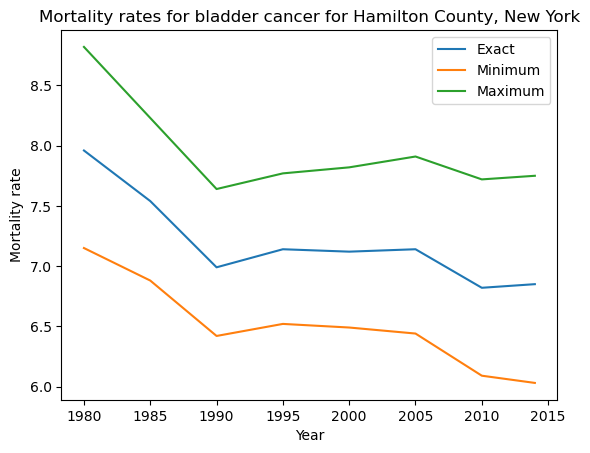

In [454]:
make_graph_national_stat(max_county_1980, 'Mortality rates for bladder cancer for Hamilton County, New York')

In Hamilton County, New York, the county with the highest mortality rate, there has been a very slight decrease which is borderline within the margin of error. 

In [455]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Billings County, North Dakota'

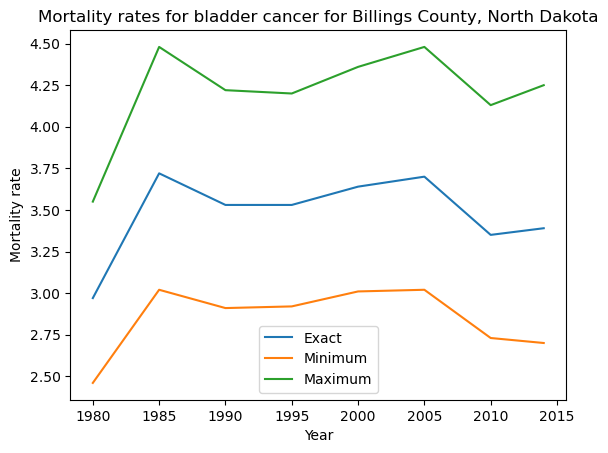

In [456]:
make_graph_national_stat(min_county_1980, 'Mortality rates for bladder cancer for Billings County, North Dakota')

In Billings County, North Dakota, the county with the lowest mortality rate, there has been a very slight increase which is borderline within the margin of error. 

##### Brain & nervous system cancer

In [ ]:
sheet = "Prostate cancer"

In [ ]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for ovarian cancer for the United States of America')

In [ ]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

In [ ]:
make_graph_national_stat(max_county_1980, 'Mortality rates for lung cancer for Utah')

In [ ]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

In [ ]:
make_graph_national_stat(max_county_1980, 'Mortality rates for lung cancer for Utah')

In [ ]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

In [ ]:
make_graph_national_stat(max_county_1980, 'Mortality rates for lung cancer for Utah')

In [ ]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

In [ ]:
make_graph_national_stat(max_county_1980, 'Mortality rates for lung cancer for Utah')

##### Thyroid cancer

In [457]:
sheet = "Thyroid cancer"

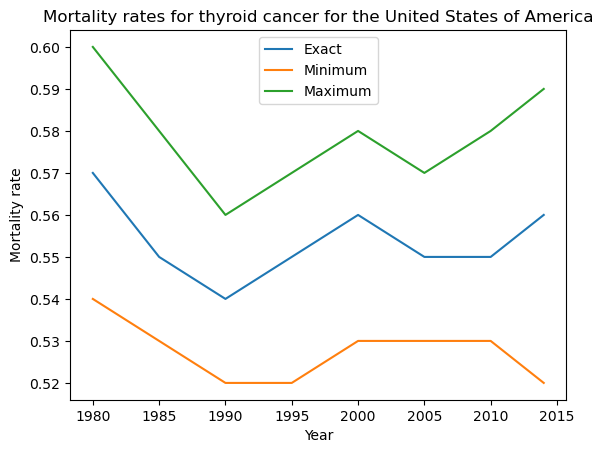

In [458]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for thyroid cancer for the United States of America')

For the US in general, the mortality rate has been generally stagnant, with a very slight decrease since 1980 well within a margin of error.

In [459]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Utah'

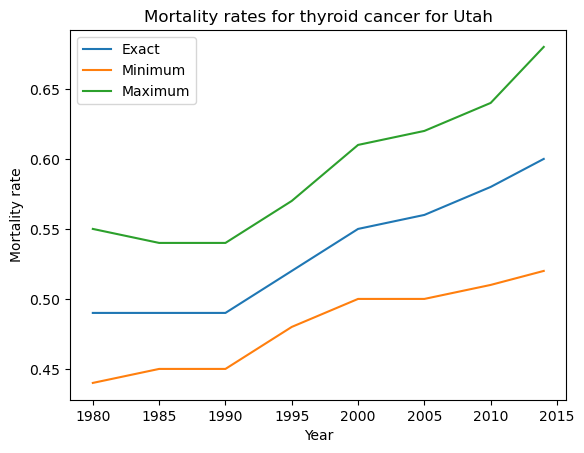

In [460]:
make_graph_national_stat(min_state_1980, 'Mortality rates for thyroid cancer for Utah')

In Utah, the state with the lowest mortality rate, there has been a very slight increase only slightly outside the margin of error. 

In [461]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'New York'

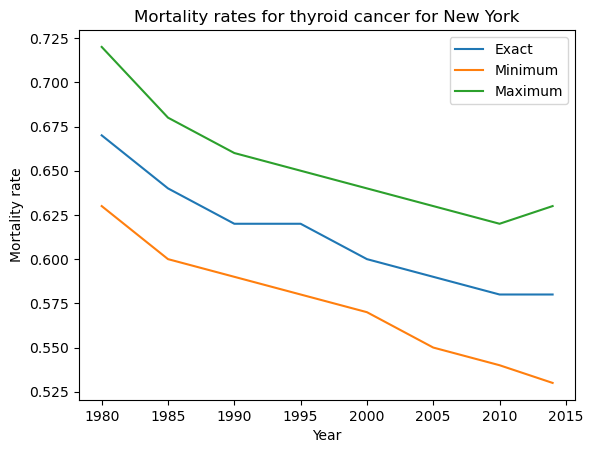

In [462]:
make_graph_national_stat(max_state_1980, 'Mortality rates for thyroid cancer for New York')

For New York, the state with the highest mortality rate, there has also been a very slight decrease in terms of mortality rate. 

In [463]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Oglala Lakota County, South Dakota'

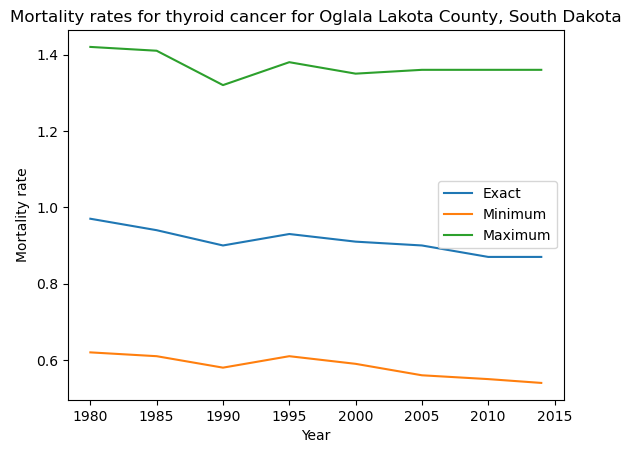

In [464]:
make_graph_national_stat(max_county_1980, 'Mortality rates for thyroid cancer for Oglala Lakota County, South Dakota')

For Oglala Lakota County, South Dakota, the county with the highest mortality rate, there is virtually no change whatsoever.

In [465]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

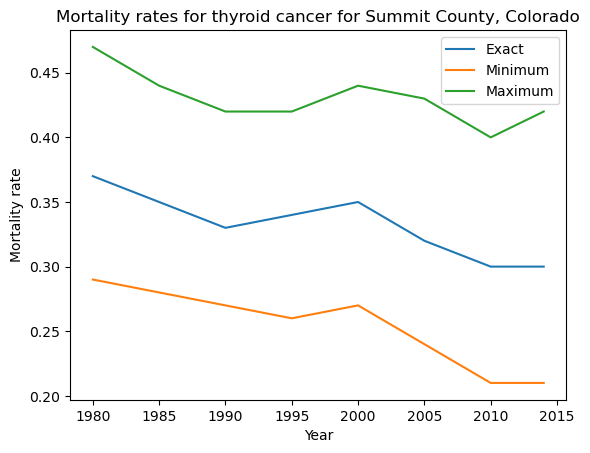

In [466]:
make_graph_national_stat(min_county_1980, 'Mortality rates for thyroid cancer for Summit County, Colorado')

In Summit County, Colorado, the county with the lowest mortality rate, there has been litle change, with a decrease well within margin of error.

##### Mesothelioma

In [467]:
sheet = "Mesothelioma"

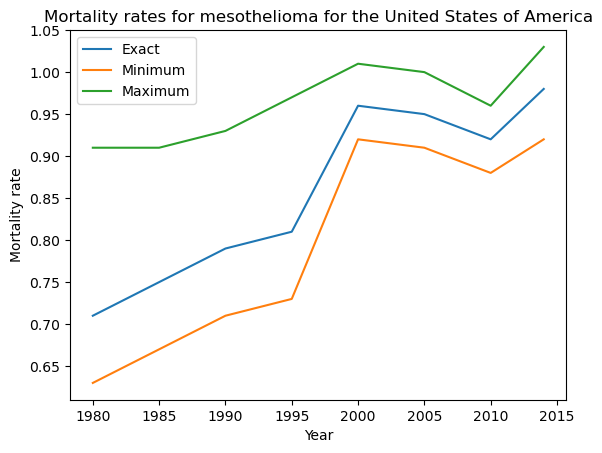

In [468]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for mesothelioma for the United States of America')

In the United States in general, there has been an increase of about one fourth since 1980, but with a large upper bar margin however.

In [469]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Arkansas'

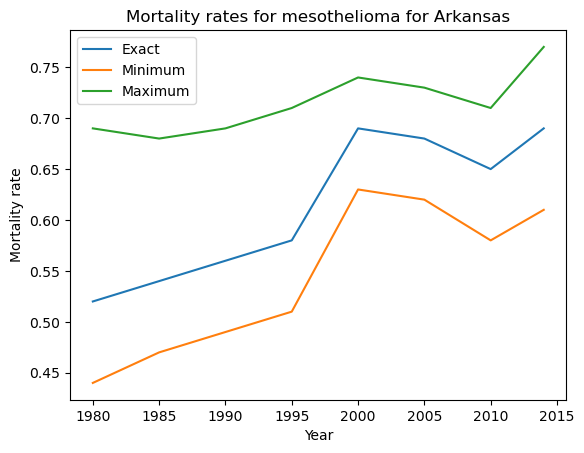

In [470]:
make_graph_national_stat(min_state_1980, 'Mortality rates for mesothelioma for Arkansas')

The mortality rate curve for Arkansas, the state with the lowest mortality rate, is pretty similar to the US, but with a smaller increase since 1980. 

In [471]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Washington'

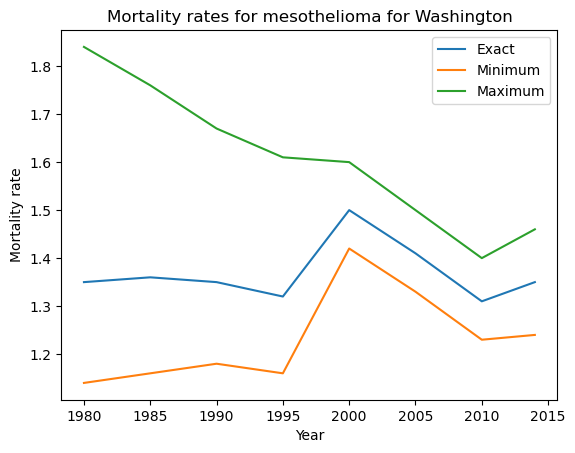

In [472]:
make_graph_national_stat(max_state_1980, 'Mortality rates for mesothelioma for Washington')

Washington, the state with the highest mortality rate, has had no net change from 1980 to 2014, but with a spike around 2000. 

In [473]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Kitsap County, Washington'

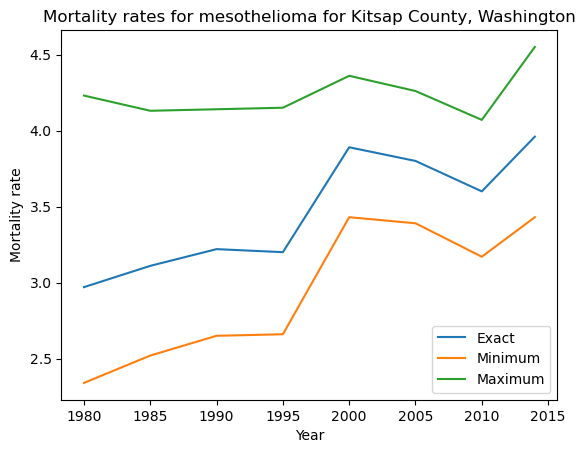

In [474]:
make_graph_national_stat(max_county_1980, 'Mortality rates for mesothelioma for Kitsap County, Washington')

The mortality rate in Kitsap County, Washington, the county with the highest mortality rate, has had a slight increase of one third since 1980 but with a high bar of margin of error. 

In [475]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Tunica County, Mississippi'

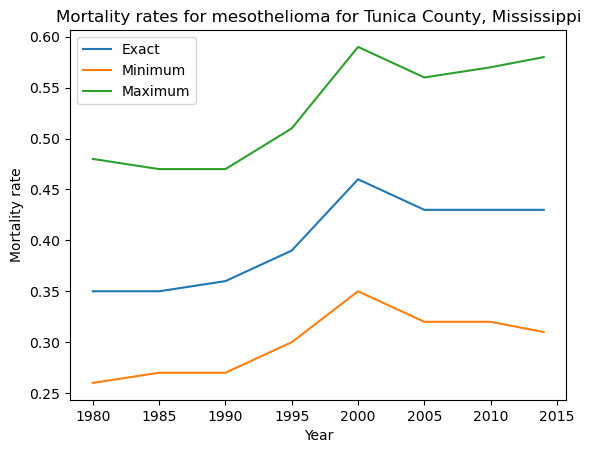

In [477]:
make_graph_national_stat(min_county_1980, 'Mortality rates for mesothelioma for Tunica County, Mississippi')

The mortality rate in Tunica County, Mississippi, the county with the lowest mortality rate, has had virtually no change, with a possible increase well within the margin of error.

##### Hodgkin lymphoma

In [478]:
sheet = "Hodgkin lymphoma"

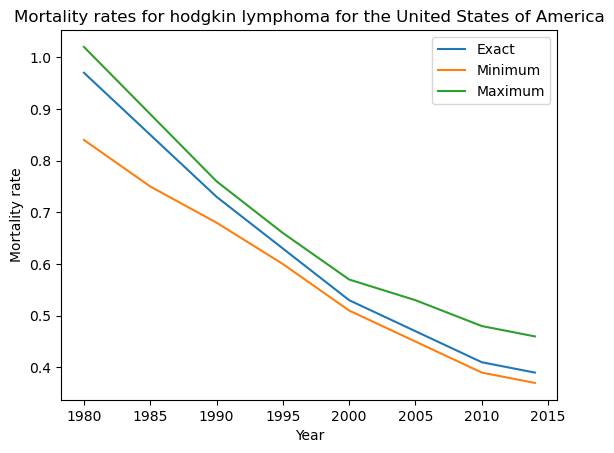

In [479]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for hodgkin lymphoma for the United States of America')

For the US in general, mortality rates have halved since 1980, with the degree of the rate decreasing over time.

In [480]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

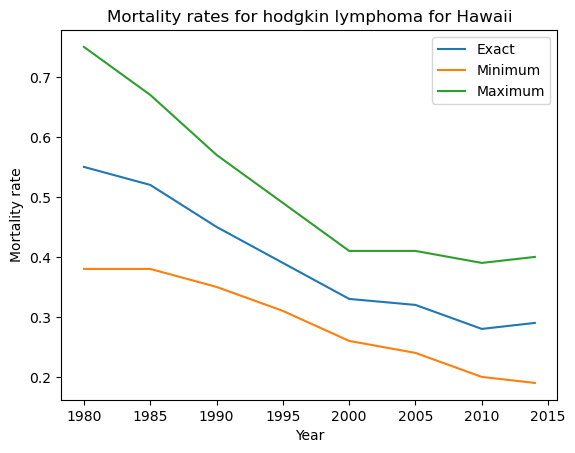

In [481]:
make_graph_national_stat(min_state_1980, 'Mortality rates for hodgkin lymphoma for Hawaii')

For Hawaii, the state with the lowest mortality rate, there has been a slight decrease since 1980, with most of this decrease being between 1985 and 2000.

In [482]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'New York'

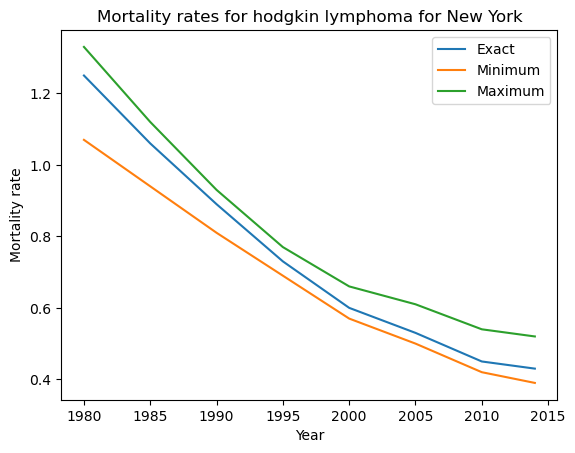

In [483]:
make_graph_national_stat(max_state_1980, 'Mortality rates for hodgkin lymphoma for New York')

In New York, the state with the highest mortality rate, there has been a decrease along the same lines as the US in general, but of a total of two thirds or so. 

In [484]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Bronx County, New York'

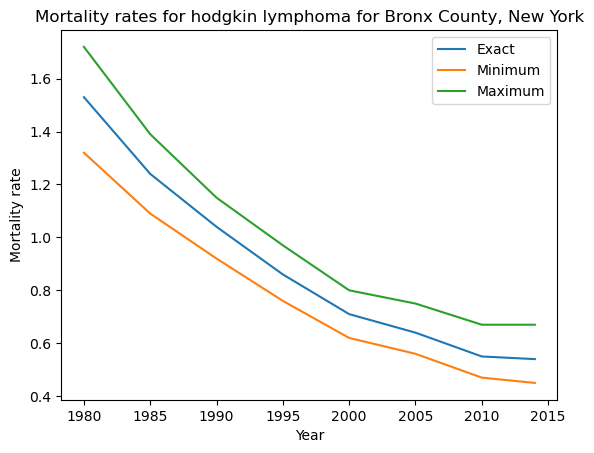

In [485]:
make_graph_national_stat(max_county_1980, 'Mortality rates for hodgkin lymphoma for Bronx County, New York')

In Bronx County, New York, the county with the highest mortality rate, there has been a decrease along the same lines as New York in general, but slightly larger proportionately speaking.

In [486]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Bethel Census Area, Alaska'

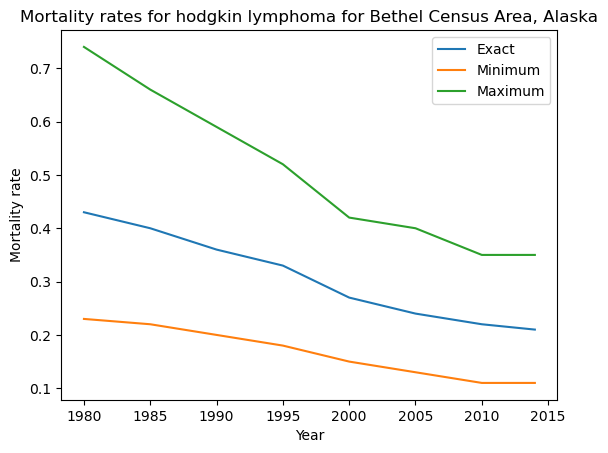

In [487]:
make_graph_national_stat(min_county_1980, 'Mortality rates for hodgkin lymphoma for Bethel Census Area, Alaska')

For Bethel Census Area, Alaska, the county with the smallest mortality rate, there has veeb a very slight decrease but well within the margin of error.

##### Non-Hodgkin lymphoma

In [488]:
sheet = "Non-Hodgkin lymphoma"

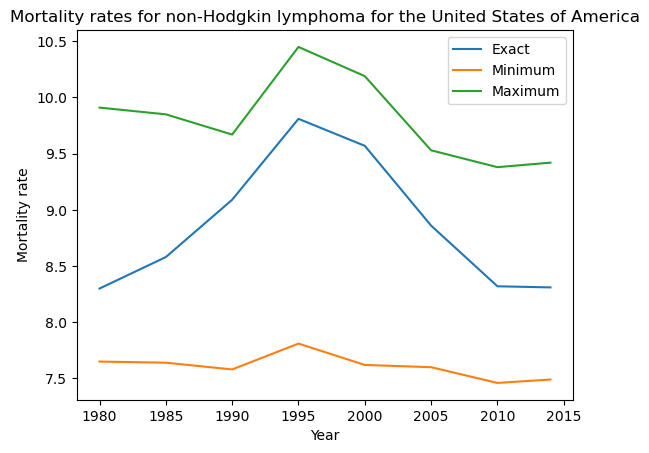

In [490]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for non-Hodgkin lymphoma for the United States of America')

In the US in general, there has been little change, but there is a possible peak around 1995-2000 within the margin of error.

In [491]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'South Carolina'

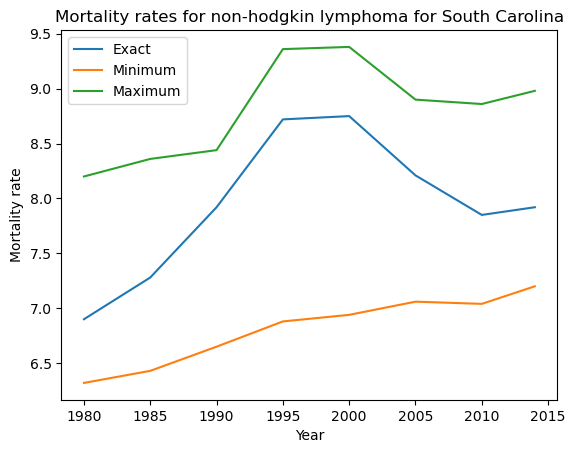

In [492]:
make_graph_national_stat(min_state_1980, 'Mortality rates for non-hodgkin lymphoma for South Carolina')

In South Carolina, the state with the least mortality rate, there has been a very slight increase well within the margin of error, and there is also a spike within the data between 1995 and 2000 but well within the margin of error.

In [493]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Rhode Island'

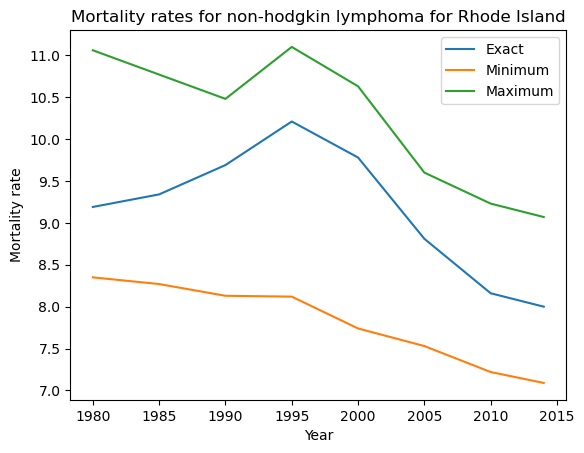

In [494]:
make_graph_national_stat(max_state_1980, 'Mortality rates for non-hodgkin lymphoma for Rhode Island')

For Rhode Island, the state with the highest mortality rate, there has been a very slight decrease well within the margin of error, and there is also a spike within the data between 1995 and 2000 but well within the margin of error.

In [495]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Buffalo County, South Dakota'

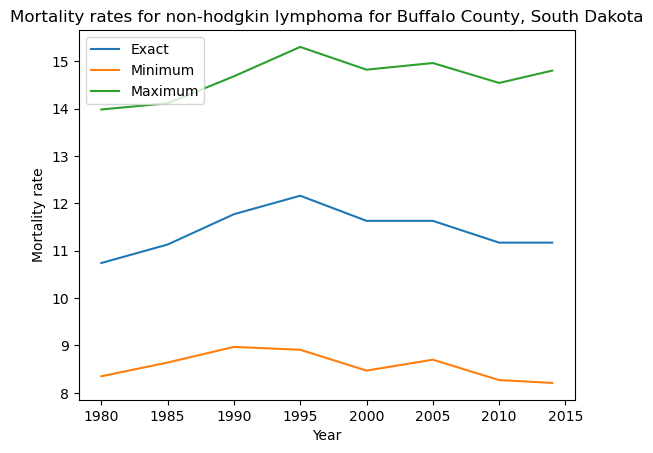

In [496]:
make_graph_national_stat(max_county_1980, 'Mortality rates for non-hodgkin lymphoma for Buffalo County, South Dakota')

For Buffalo County, South Dakota, which is the county with the highest mortality ratem there has been minimal change over time.

In [497]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

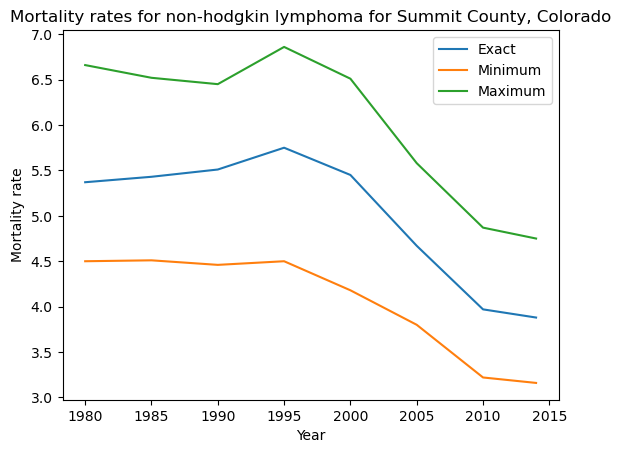

In [499]:
make_graph_national_stat(min_county_1980, 'Mortality rates for non-hodgkin lymphoma for Summit County, Colorado')

In Summit County, Colorado, the county with the least mortality rate, there has been a decrease which, while large, lies well within the margin of error. 

##### Multiple myeloma

In [501]:
sheet = "Multiple myeloma"

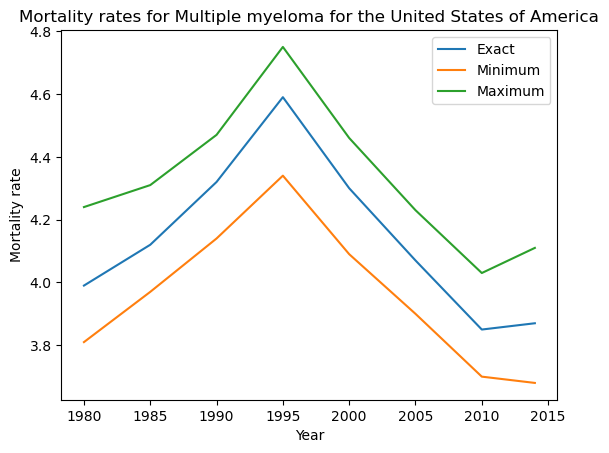

In [502]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for Multiple myeloma for the United States of America')

In the US generally, there has been a small net decrease well within the margin of error, but there has also been a peak within the data at around 1995. 

In [503]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

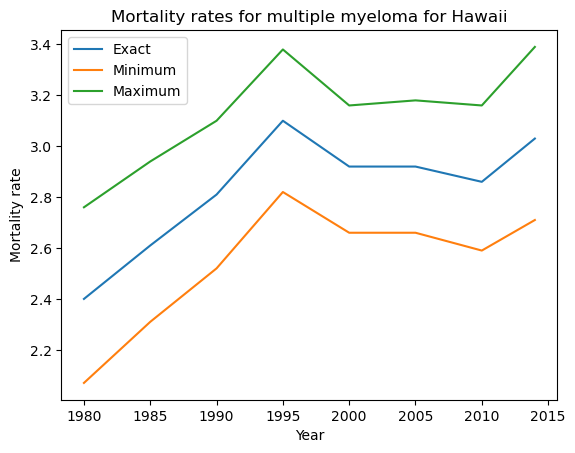

In [504]:
make_graph_national_stat(min_state_1980, 'Mortality rates for multiple myeloma for Hawaii')

In Hawaii, the state with the least mortality rate, there has been an increase of one-fourth, but the margin of error is so large that this difference can be almost entirely accounted for inside it. 

In [505]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

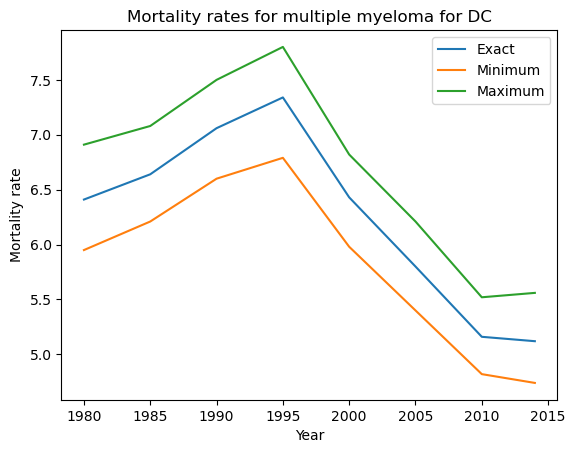

In [506]:
make_graph_national_stat(max_state_1980, 'Mortality rates for multiple myeloma for DC')

In DC the state with the highest mortality rate, there has been a decrease of about one quarter, with a small peak within the margin of error at around 1995.

In [507]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Charles City County, Virginia'

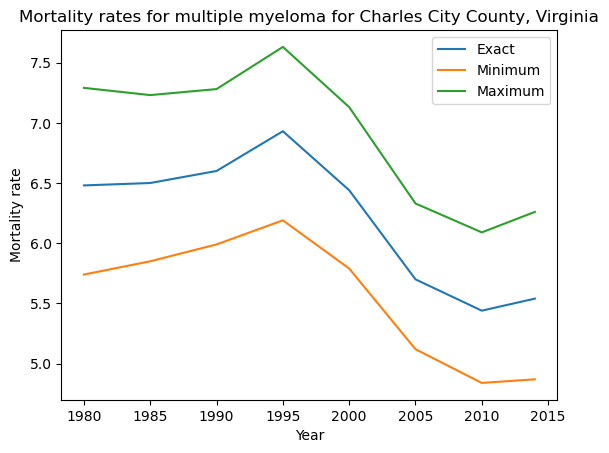

In [509]:
make_graph_national_stat(max_county_1980, 'Mortality rates for multiple myeloma for Charles City County, Virginia')

In Charles City County, Virginia, the county with the highest level of mortality rate, there has been a decrease of a considerable amount, but with this decrease well within the margin of error. 

In [510]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Kalawao County, Hawaii'

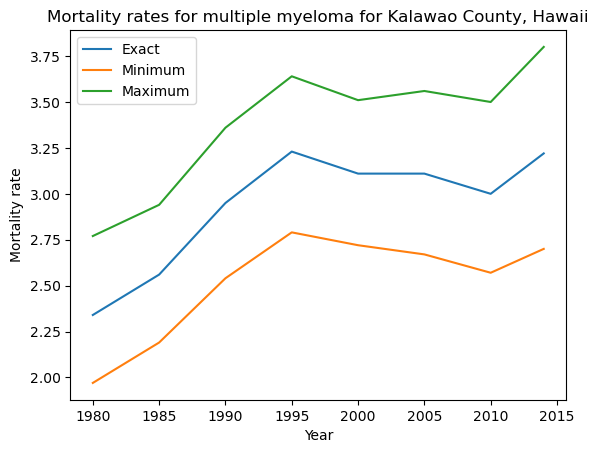

In [512]:
make_graph_national_stat(min_county_1980, 'Mortality rates for multiple myeloma for Kalawao County, Hawaii')

In Kalawao County, Hawaii, the county with the lowest mortality rate, there has been an increase of about one third from 1980 to 2014, but again with quite large error bars. 

##### Leukemia

In [513]:
sheet = "Leukemia"

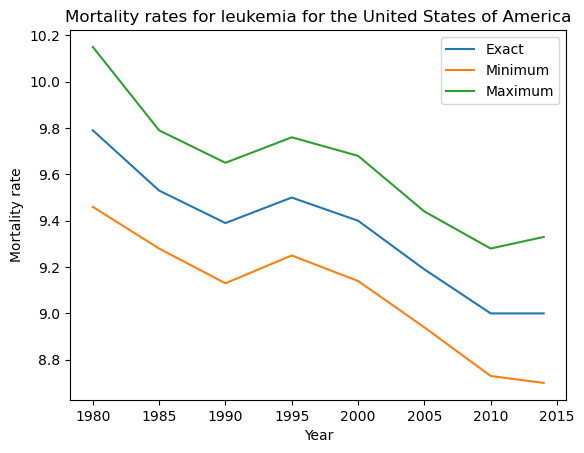

In [514]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for leukemia for the United States of America')

There has been a slight decrease in the US generally from 1980 to 2014, with a spike around 1995. 

In [515]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

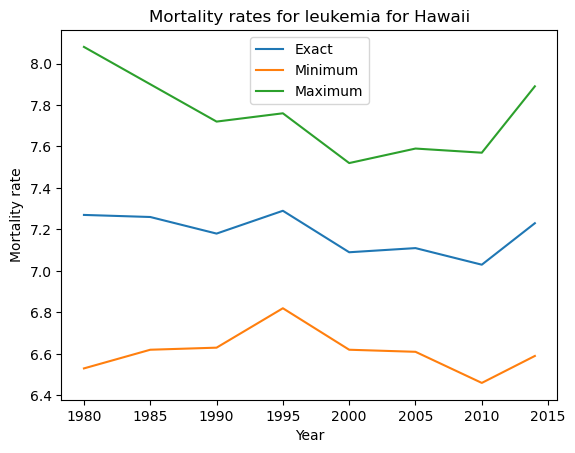

In [516]:
make_graph_national_stat(min_state_1980, 'Mortality rates for leukemia for Hawaii')

In Hawaii, the state with the lowest mortality rate for leukemia, the rate has been pretty much stagnant. 

In [517]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Arkansas'

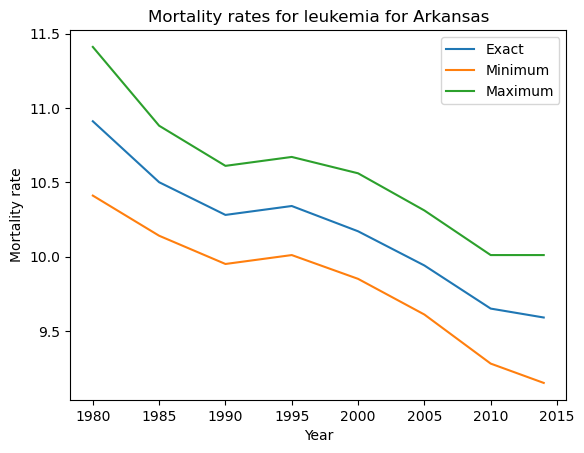

In [518]:
make_graph_national_stat(max_state_1980, 'Mortality rates for leukemia for Arkansas')

This shows that in Arkansas, the state with the highest mortality rate, there has been a modest decrease since 1980.

In [519]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Buffalo County, South Dakota'

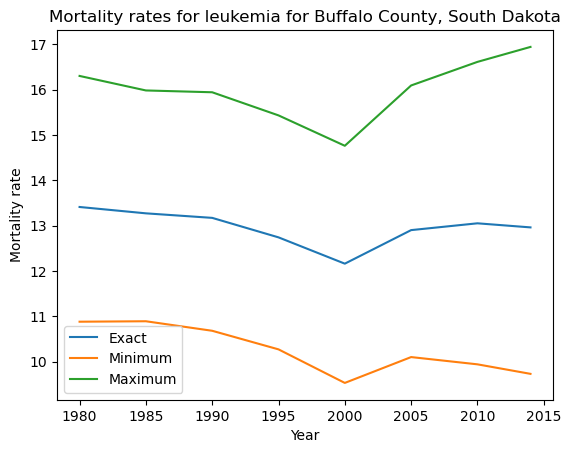

In [520]:
make_graph_national_stat(max_county_1980, 'Mortality rates for leukemia for Buffalo County, South Dakota')

For Buffalo County, South Dakota, the county with the highest mortality there has been no change whatsoever, with a dip in 2000 entirely within the margin of error.

In [521]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

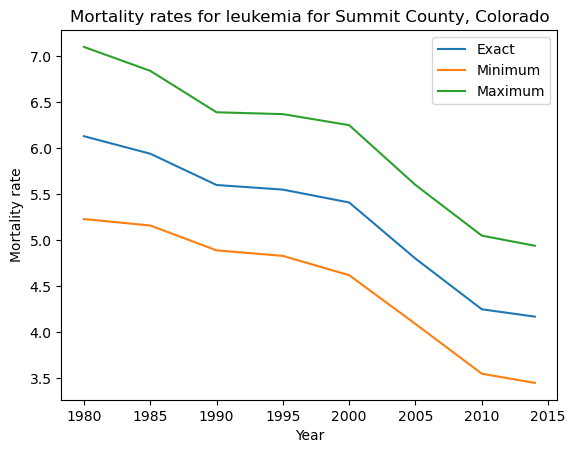

In [522]:
make_graph_national_stat(min_county_1980, 'Mortality rates for leukemia for Summit County, Colorado')

In Summit County, Colorado, the county with the lowest mortality rate, there has been a sizeable decrease from 1980 to 2014. 

##### Acute lymphoid leukemia

In [523]:
sheet = "Acute lymphoid leukemia"

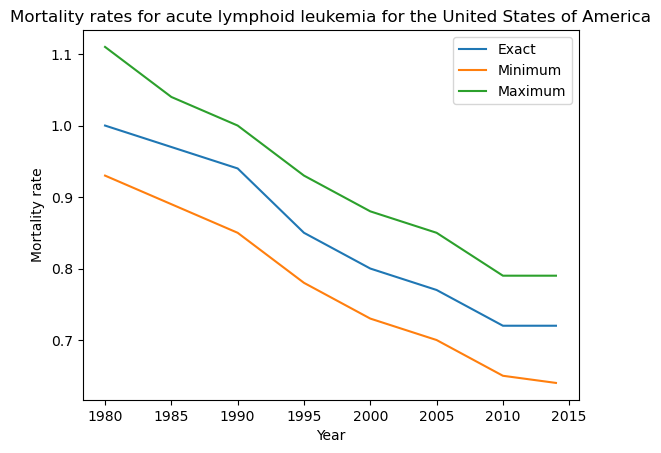

In [524]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for acute lymphoid leukemia for the United States of America')

For the US in general, there is a pretty large and steady decrease in mortality rate from 1980 onwards.

In [525]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Alaska'

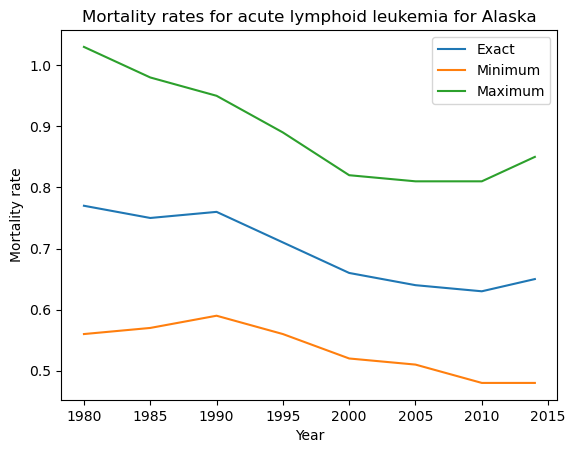

In [526]:
make_graph_national_stat(min_state_1980, 'Mortality rates for acute lymphoid leukemia for Alaska')

In Alaska, the state with the smallest mortality rate, there is virtually no change, with a possible small decrease well within the margin of error.

In [527]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'New Mexico'

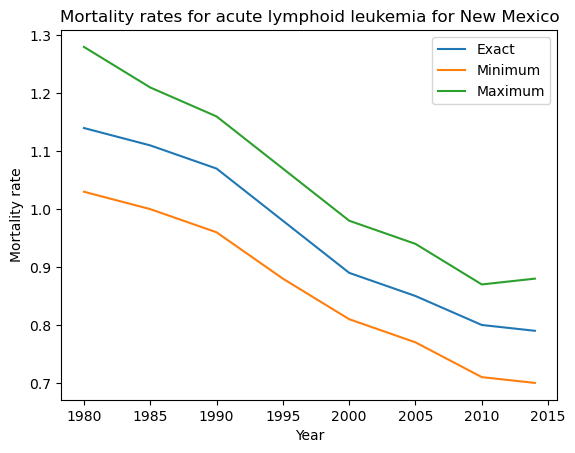

In [528]:
make_graph_national_stat(max_state_1980, 'Mortality rates for acute lymphoid leukemia for New Mexico')

In New Mexico, the state with the highest level of mortality rate, the mortality rate decreased from a third since 1980.

In [529]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Oglala Lakota County, South Dakota'

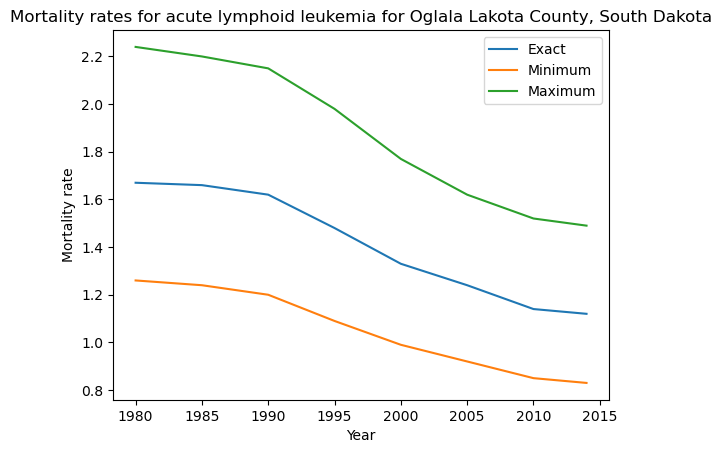

In [530]:
make_graph_national_stat(max_county_1980, 'Mortality rates for acute lymphoid leukemia for Oglala Lakota County, South Dakota')

The county with the highest level of mortality, Oglala Lakota County, South Dakota, has had a small decrease since 1980 and this small decrease is well within the margin of error.

In [531]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

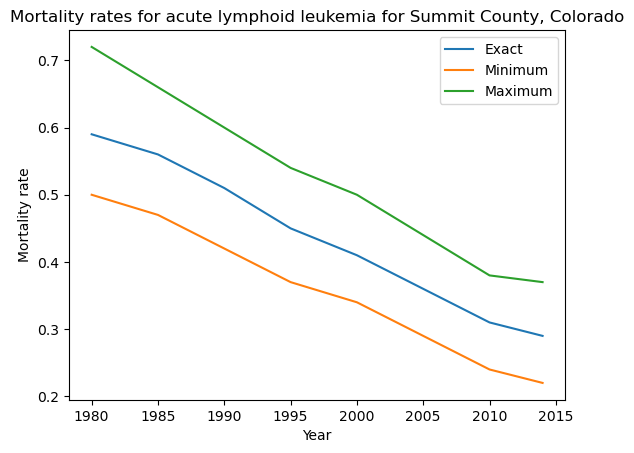

In [532]:
make_graph_national_stat(min_county_1980, 'Mortality rates for acute lymphoid leukemia for Summit County, Colorado')

The county with the lowest level of mortality, Summit County Colorado, has seen a steady decrease from 1980, and it has decreased by almost one half.

##### Chronic lymphoid leukemia

In [533]:
sheet = "Chronic lymphoid leukemia"

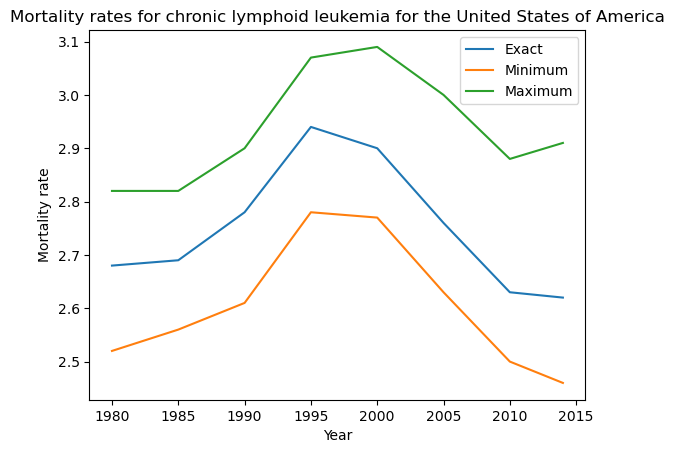

In [534]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for chronic lymphoid leukemia for the United States of America')

In the US generally, there has been almost no net change whatsoever between 1980 and 2015, but there has been a peak from 1995-2000.

In [535]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

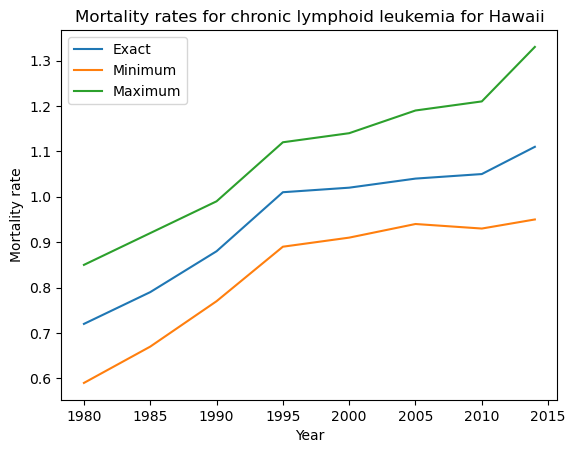

In [536]:
make_graph_national_stat(min_state_1980, 'Mortality rates for chronic lymphoid leukemia for Hawaii')

In Hawaii, the state with the least mortality levels, there has been an increase of one fourth since 1980. 

In [537]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'North Dakota'

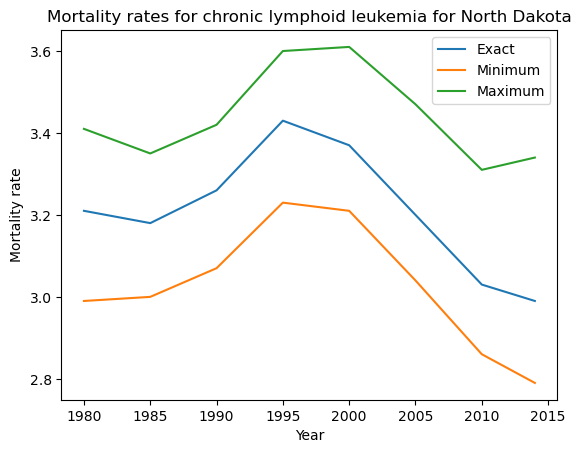

In [538]:
make_graph_national_stat(max_state_1980, 'Mortality rates for chronic lymphoid leukemia for North Dakota')

For North Dakota, the state with the highest mortality levels, there has been a very slight net decrease since 1980, but it lies within the error bar, and there is a peak around 1995-2000 which is also within the error bar.

In [539]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'McIntosh County, North Dakota'

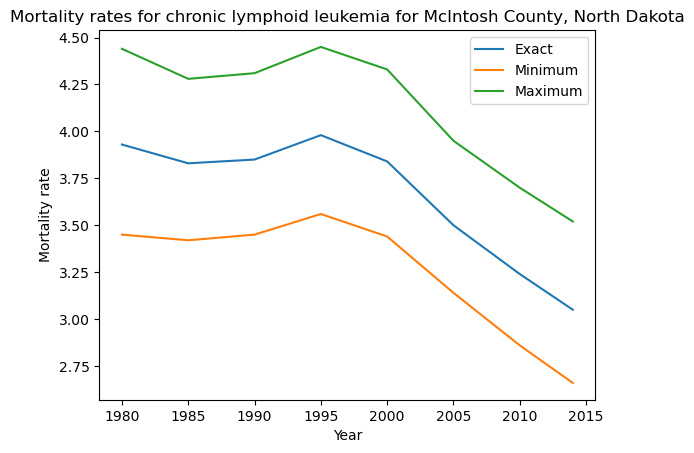

In [540]:
make_graph_national_stat(max_county_1980, 'Mortality rates for chronic lymphoid leukemia for McIntosh County, North Dakota')

For McIntosh County, North Dakota, the mortality curve looks very similar to North Dakota in general, except that there is a stronger decline. 

In [541]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Honolulu County, Hawaii'

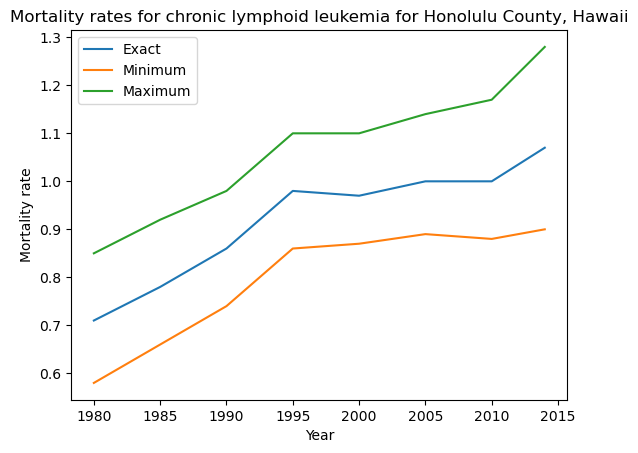

In [542]:
make_graph_national_stat(min_county_1980, 'Mortality rates for chronic lymphoid leukemia for Honolulu County, Hawaii')

For Honolulu County, Hawaii, the county with the lowest rate of mortality in the US, there has been an increase of almost one third. There has also been no change whatsoever between 1995 to 2010. 

##### Acute myeloid leukemia

In [543]:
sheet = "Acute myeloid leukemia"

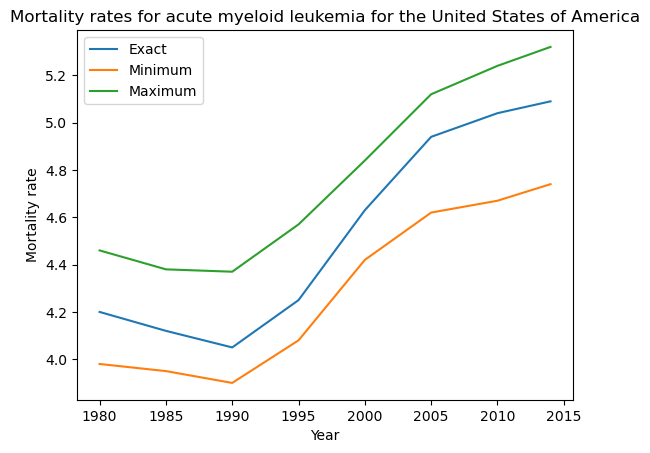

In [544]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for acute myeloid leukemia for the United States of America')

In the US generally, there has been a rise of about one fourth from 1980 to 2014 in mortality rate. Additionally, there is a decline from 1980 to 1990, but this decline is within the margin of error. 

In [545]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Alaska'

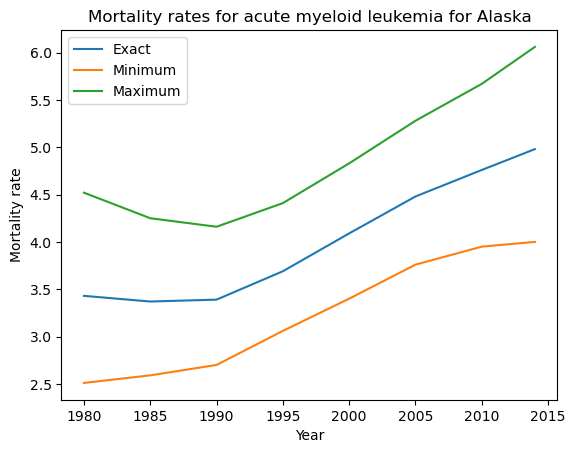

In [546]:
make_graph_national_stat(min_state_1980, 'Mortality rates for acute myeloid leukemia for Alaska')

Alaska, the state with the lowest mortality level, shows a rise of almost one and a half times. However, the margin of error is as such that this rise is almost entirely accounted for inside it. 

In [547]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'Pennsylvania'

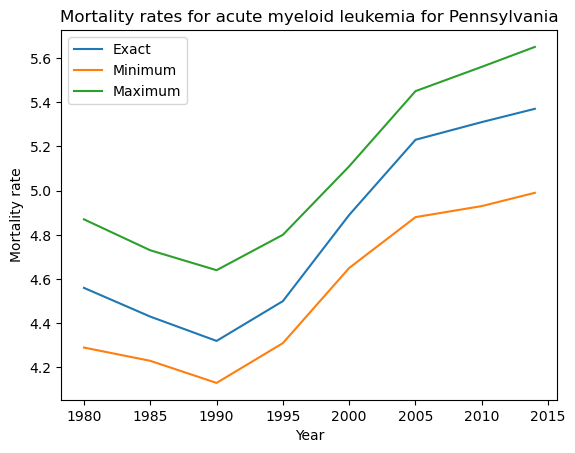

In [549]:
make_graph_national_stat(max_state_1980, 'Mortality rates for acute myeloid leukemia for Pennsylvania')

Pennsylvania, the state with the highest mortality level, has increased by a modest margin, with a trough at around 1990 along the way. 

In [550]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Buffalo County, South Dakota'

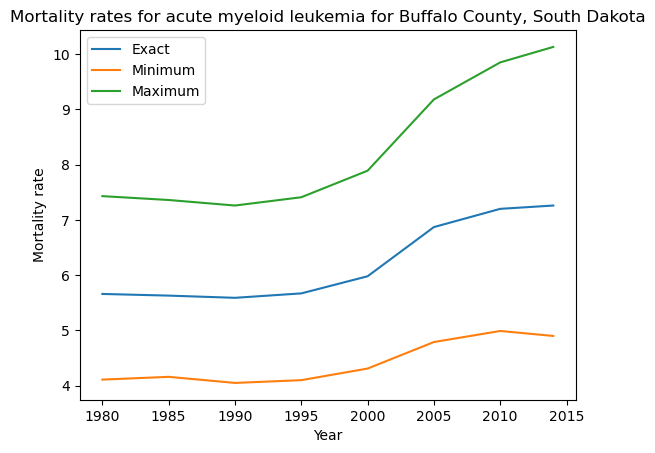

In [551]:
make_graph_national_stat(max_county_1980, 'Mortality rates for acute myeloid leukemia for Buffalo County, South Dakota')

In Buffalo County, South Dakota, the county with the highest mortality rate, there has been a small increase well inside the margin of error.

In [552]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

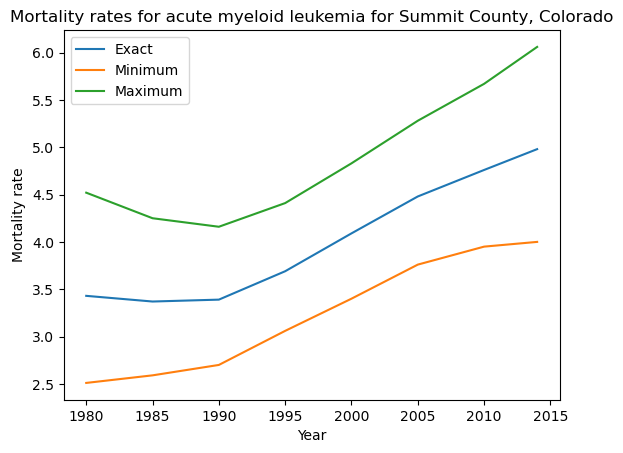

In [553]:
make_graph_national_stat(min_state_1980, 'Mortality rates for acute myeloid leukemia for Summit County, Colorado')

In Summit County, Colorado, there is a sizeable increase from 1980 to 2014, but the error bars are large enough that a line with a negative slope can be installed inside it. 

##### Chronic myeloid leukemia

In [554]:
sheet = "Chronic myeloid leukemia"

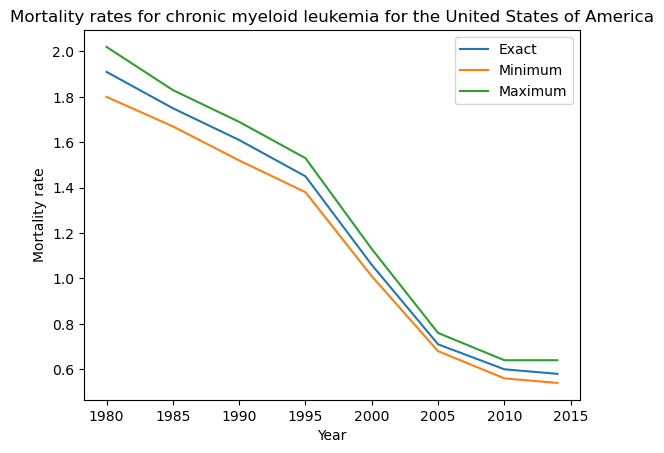

In [556]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for chronic myeloid leukemia for the United States of America')

In the US generally, the mortality rate decreases by over two-thirds from 1980 to 2014. 

In [557]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Florida'

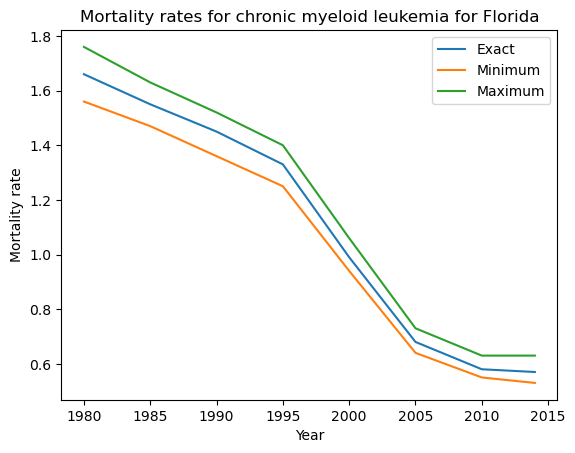

In [558]:
make_graph_national_stat(min_state_1980, 'Mortality rates for chronic myeloid leukemia for Florida')

The mortality rate for Florida, the state with the lowest mortality level, is very similar to the US except with a smaller starting point.

In [559]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

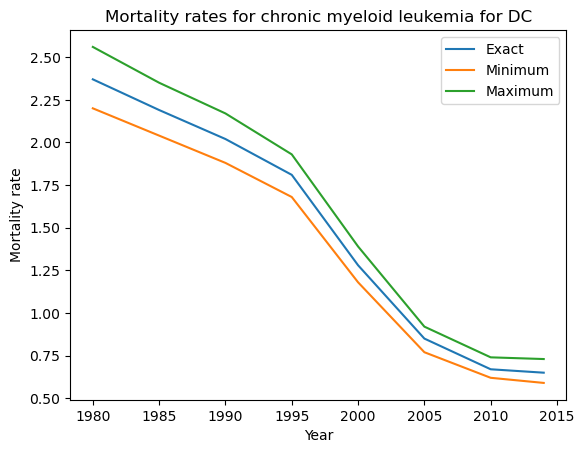

In [560]:
make_graph_national_stat(max_state_1980, 'Mortality rates for chronic myeloid leukemia for DC')

The mortality curve for DC, the state with the highest mortality level, is also very similar to the US generally. However, the curve has a higher starting point. 

In [561]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Sharkey County, Mississippi'

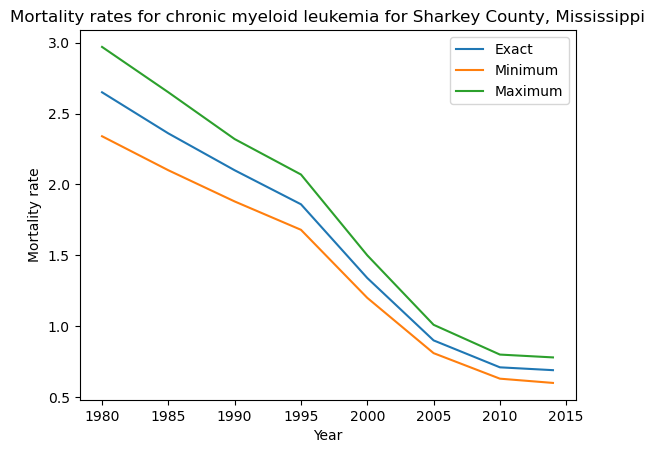

In [562]:
make_graph_national_stat(max_county_1980, 'Mortality rates for chronic myeloid leukemia for Sharkey County, Mississippi')

The mortality rate for Sharkey County, Mississippi, the county with the highest mortality level, crashes very hard in a curve again very similar to the US overall, and indeed it looks almost exactly like it but only with some scaling and increases in the error bars. 

In [563]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

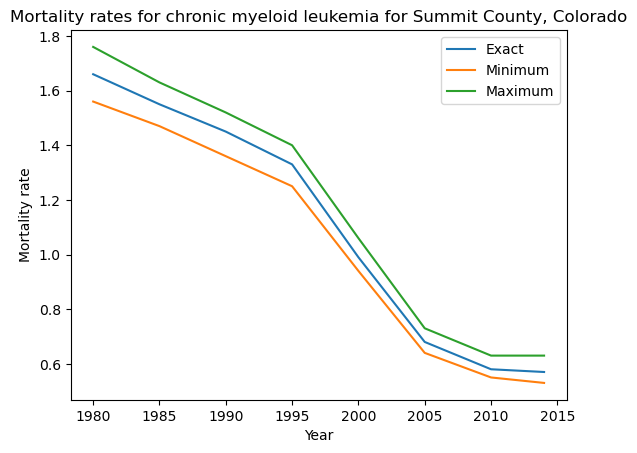

In [564]:
make_graph_national_stat(min_state_1980, 'Mortality rates for chronic myeloid leukemia for Summit County, Colorado')

The mortality rate for Summit County, Colorado, the county with the lowest mortality level, crashes very hard in a curve again very similar to the US overall, and indeed it looks almost exactly like it but only with some scaling downwards. 

##### Other neoplasms

In [565]:
sheet = "Other neoplasms"

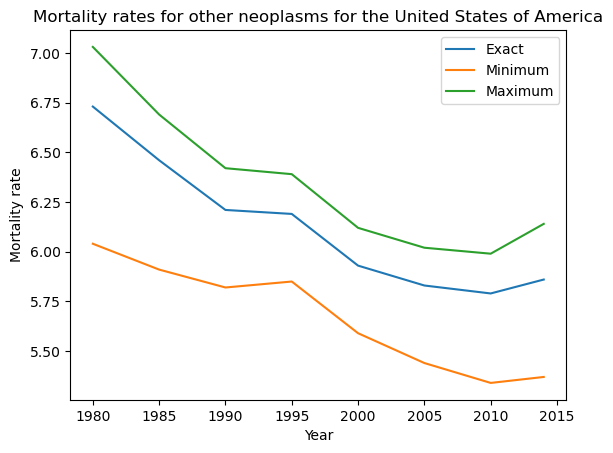

In [566]:
make_graph_national_stat(national_dfs[sheet].loc[national_dfs[sheet]['is_us']], 'Mortality rates for other neoplasms for the United States of America')

For the US generally, there is a modest decrease but with very large error bars that could make the decrease even more modest. 

In [567]:
is_state = national_dfs[sheet].loc[national_dfs[sheet]['is_state']]

min_state_1980 = is_state.loc[is_state['1980_exact'].idxmin()]

min_state_1980['Location']

'Hawaii'

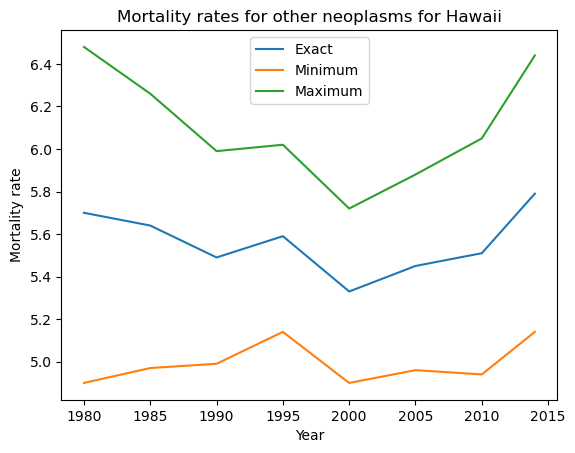

In [568]:
make_graph_national_stat(min_state_1980, 'Mortality rates for other neoplasms for Hawaii')

Hawaii, the state with the least mortality level, has had virtually no net change, with a peak in 1995 and very large error bars. 

In [569]:
max_state_1980 = is_state.loc[is_state['1980_exact'].idxmax()]

max_state_1980['Location']

'District of Columbia'

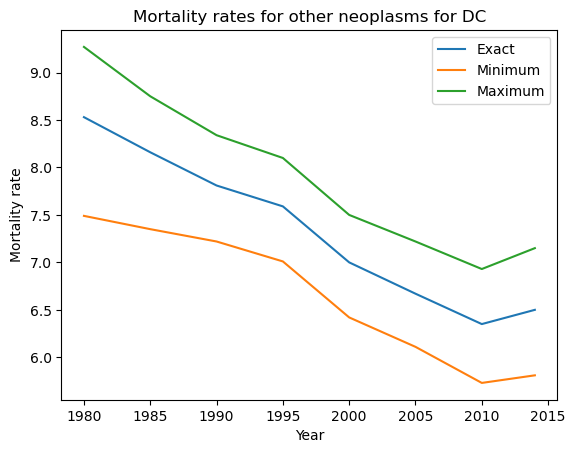

In [570]:
make_graph_national_stat(max_state_1980, 'Mortality rates for other neoplasms for DC')

DC, the state with the highest mortality level, has decreased by one fourth from 1980 to 2014. 

In [571]:
is_county = national_dfs[sheet].loc[national_dfs[sheet]['is_county']]

max_county_1980 = is_county.loc[is_county['1980_exact'].idxmax()]

max_county_1980['Location']

'Baltimore City, Maryland'

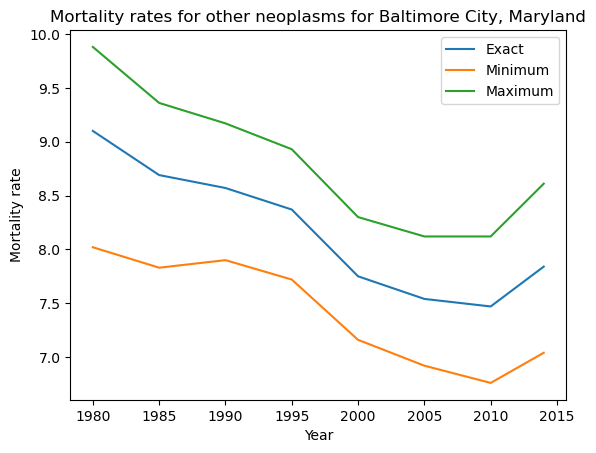

In [572]:
make_graph_national_stat(max_county_1980, 'Mortality rates for other neoplasms for Baltimore City, Maryland')

The mortality rate for Baltimore City, Maryland, the county with the highest mortality level, has decreased steadily, but there has been an upward trend from 2010 to 2014. Additionally, it also has very large error bars. 

In [573]:
min_county_1980 = is_county.loc[is_county['1980_exact'].idxmin()]

min_county_1980['Location']

'Summit County, Colorado'

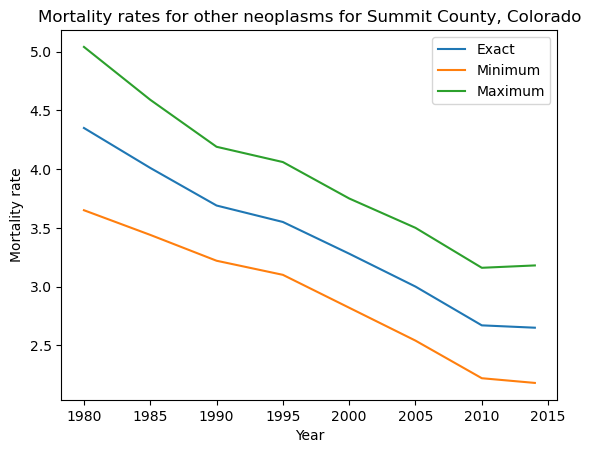

In [574]:
make_graph_national_stat(min_county_1980, 'Mortality rates for other neoplasms for Summit County, Colorado')

The mortality rate in Summit County, Colorado, the county with the lowest mortality rate, has decreased considerably since 1980, albeit again with large error bars. 

##### Summary

This is a large data set, which requires a lot of EDA. To summarize some notable findings:
* Summit County, Colorado consistently appears as a county with the lowest mortality rate
* Oglala Lakota County, South Dakota consistently appears as a county with the highest mortality rate
* Utah consistently appears as a state with the lowest mortality rate
* The District of Columbia consistently appears as a state with the highest mortality rate, some improvement in more recent years notwithstanding

### Base model